# Imports

In [1]:
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

import keras_tuner as kt

import scipy.stats as st

import shap

2024-02-18 11:35:50.236858: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 11:35:50.242249: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-18 11:35:50.353516: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 11:35:50.353572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 11:35:50.355465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# nice plots
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}\usepackage{amssymb}\usepackage{parskip}",
    "axes.labelsize": 22,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "axes.titlesize": 24,
    "font.family": "serif",
    "figure.dpi": 300,
    "figure.figsize": [8, 6]
    })

In [3]:
sc_data_dataframe = pd.read_csv("train.csv")

# Data Inspection

In [54]:
sc_data_dataframe.info()
sc_data_dataframe.head()
sc_data_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...      21263.000000   21263.000000   
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

Correlation:

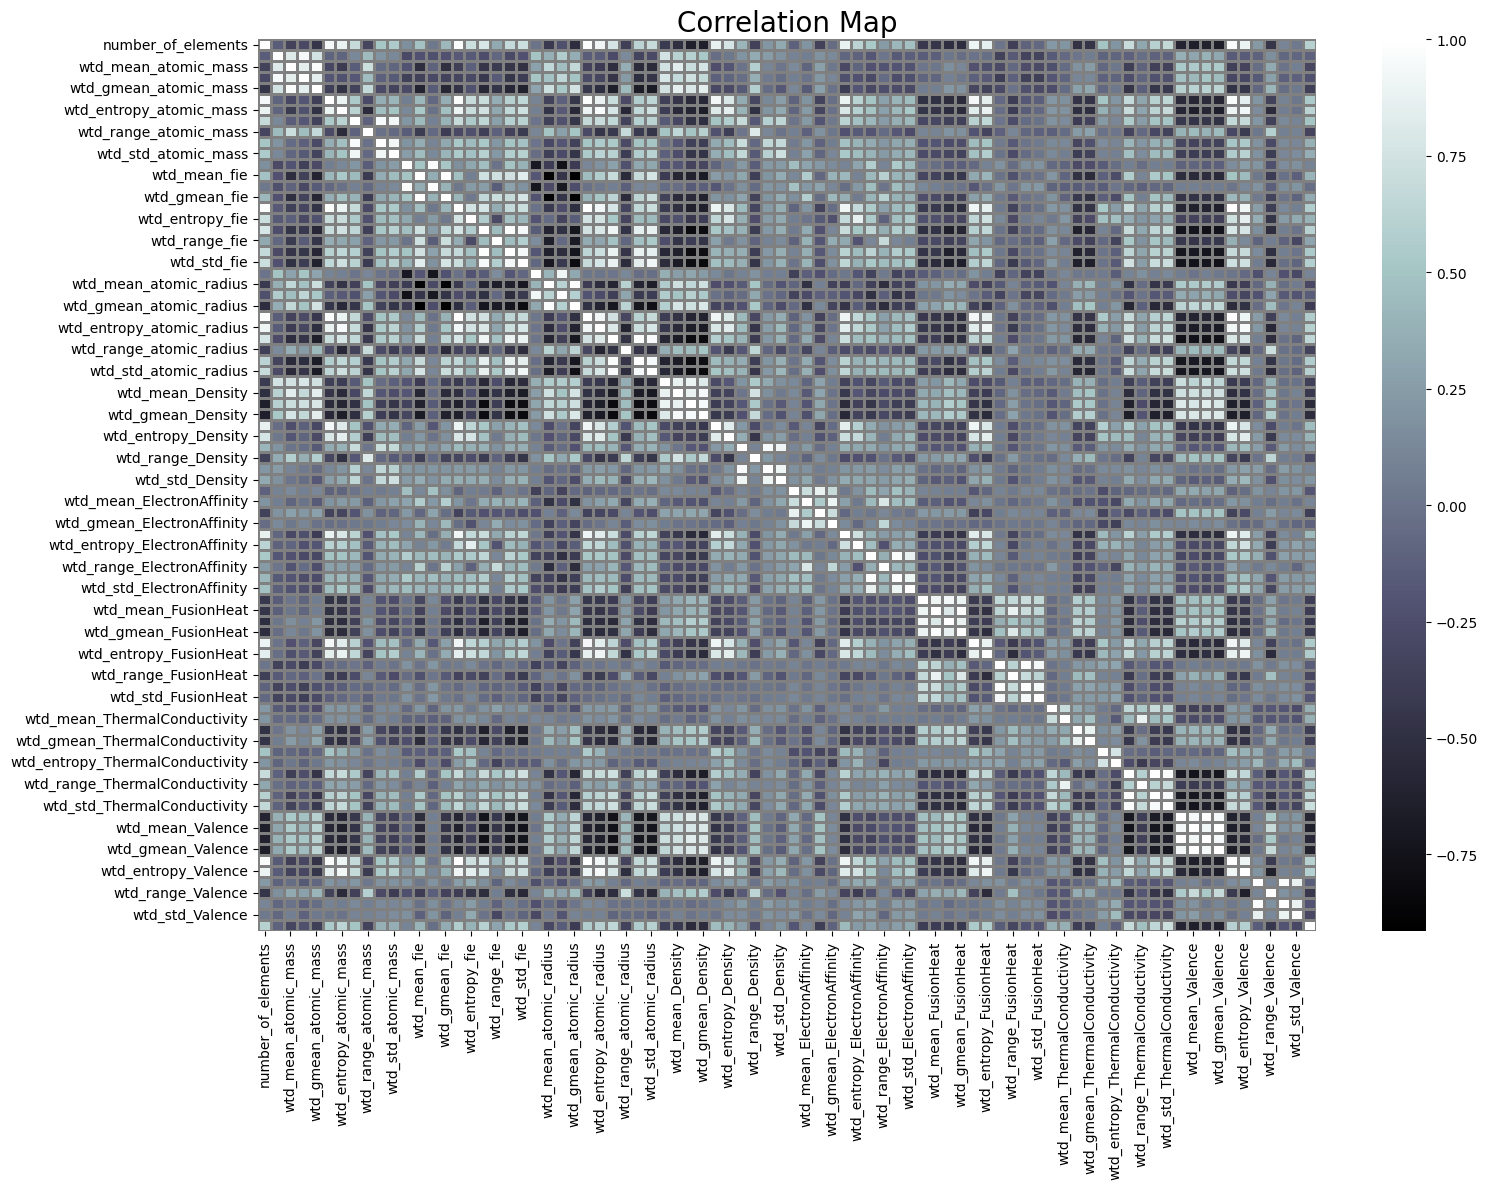

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=sc_data_dataframe.corr(),cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()

# Feature Selection

In [4]:
features = sc_data_dataframe.columns.tolist()
print(features)

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

In [5]:
selected_features = ["number_of_elements",
                     "mean_atomic_mass",
                     "std_atomic_mass",
                     "mean_fie",
                     "std_fie",
                     "mean_atomic_radius",
                     "std_atomic_radius",
                     "mean_Density",
                     "std_Density",
                     "mean_ElectronAffinity",
                     "std_ElectronAffinity",
                     "mean_FusionHeat",
                     "std_FusionHeat",
                     "mean_ThermalConductivity",
                     "std_ThermalConductivity",
                     "mean_Valence",
                     "std_Valence"
                     ]

selected_sl_data_dataframe = sc_data_dataframe[selected_features]
all_features_dataframe = sc_data_dataframe.drop("critical_temp", axis=1)
target_dataframe = sc_data_dataframe["critical_temp"]

In [14]:
# this might be useful
units = ["",
         "u",
         "u",
         "s",
         "s",
         "pm",
         "pm",
         "kg m$^{-3}$",
         "kg m$^{-3}$",
         "kJ mol$^{-1}$",
         "kJ mol$^{-1}$",
         "kJ mol$^{-1}$",
         "kJ mol$^{-1}$",
         "W m$^{-1}$ K$^{-1}$",
         "W m$^{-1}$ K$^{-1}$",
         "",
         ""
         ]

selected_features_abbr =["number_of_elements",
                        "mean_atomic_mass",
                        "std_atomic_mass",
                        "mean_fie",
                        "std_fie",
                        "mean_ar",
                        "std_ar",
                        "mean_Density",
                        "std_Density",
                        "mean_EA",
                        "std_EA",
                        "mean_FH",
                        "std_FH",
                        "mean_TC",
                        "std_TC",
                        "mean_Valence",
                        "std_Valence"
                        ]

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


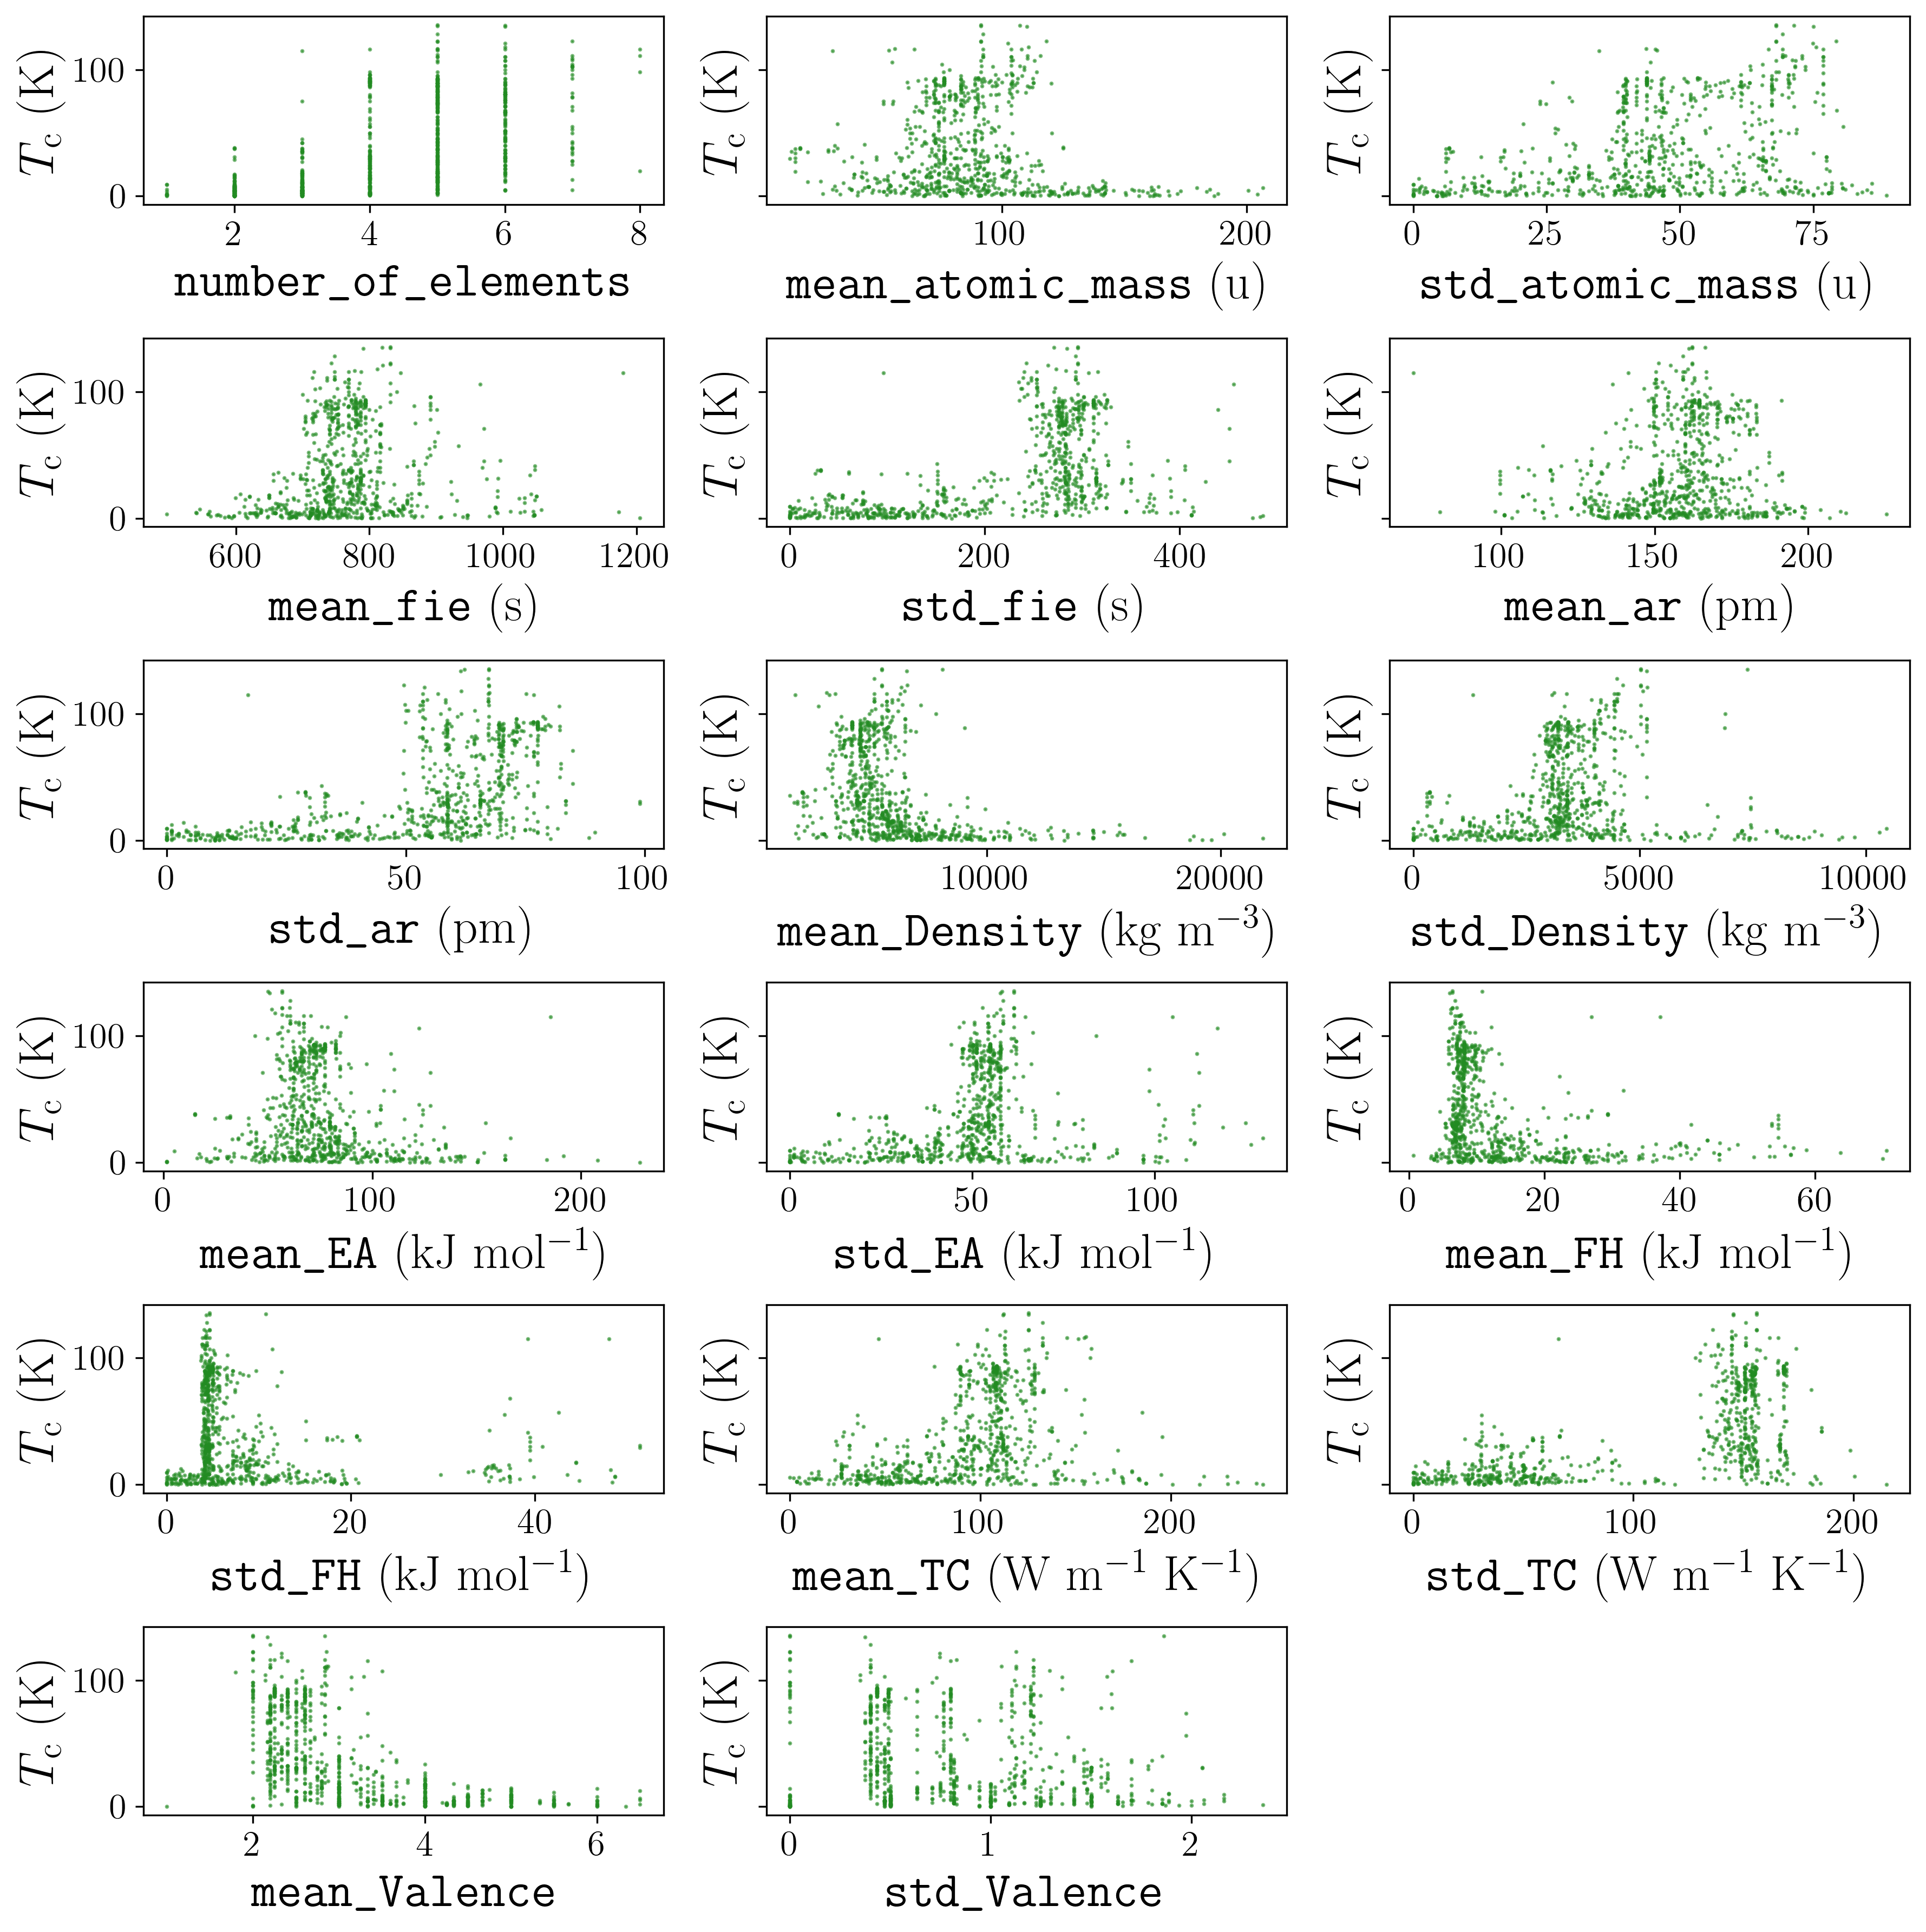

In [15]:


fig, axes = plt.subplots(6, 3, sharey=True,)

sample_all = sc_data_dataframe.sample(n=800)

for i, feature in enumerate(selected_features):
    selection = [feature, "critical_temp"]
    sample = sample_all[selection]
    
    X = sample[feature].to_numpy()
    Y = sample["critical_temp"].to_numpy()

    ax = axes[i // 3][i % 3]

    ax.scatter(X, Y, s=0.7, color="forestgreen", alpha=0.6)
    if units[i] != "":
        ax.set_xlabel(f"\\texttt{{{selected_features_abbr[i]}}} (" + units[i] + ")")
    else:
        ax.set_xlabel(f"\\texttt{{{selected_features_abbr[i]}}}")
    ax.set_ylabel("$T_\\text{c}$ (K)")

fig.delaxes(axes[5][2])

fig.set_figheight(12)
fig.set_figwidth(12)
fig.tight_layout()
fig.savefig("./plots/features.png")
fig.savefig("./nice_plots/features.pdf")
fig.show()


# Pairplot

KeyboardInterrupt: 

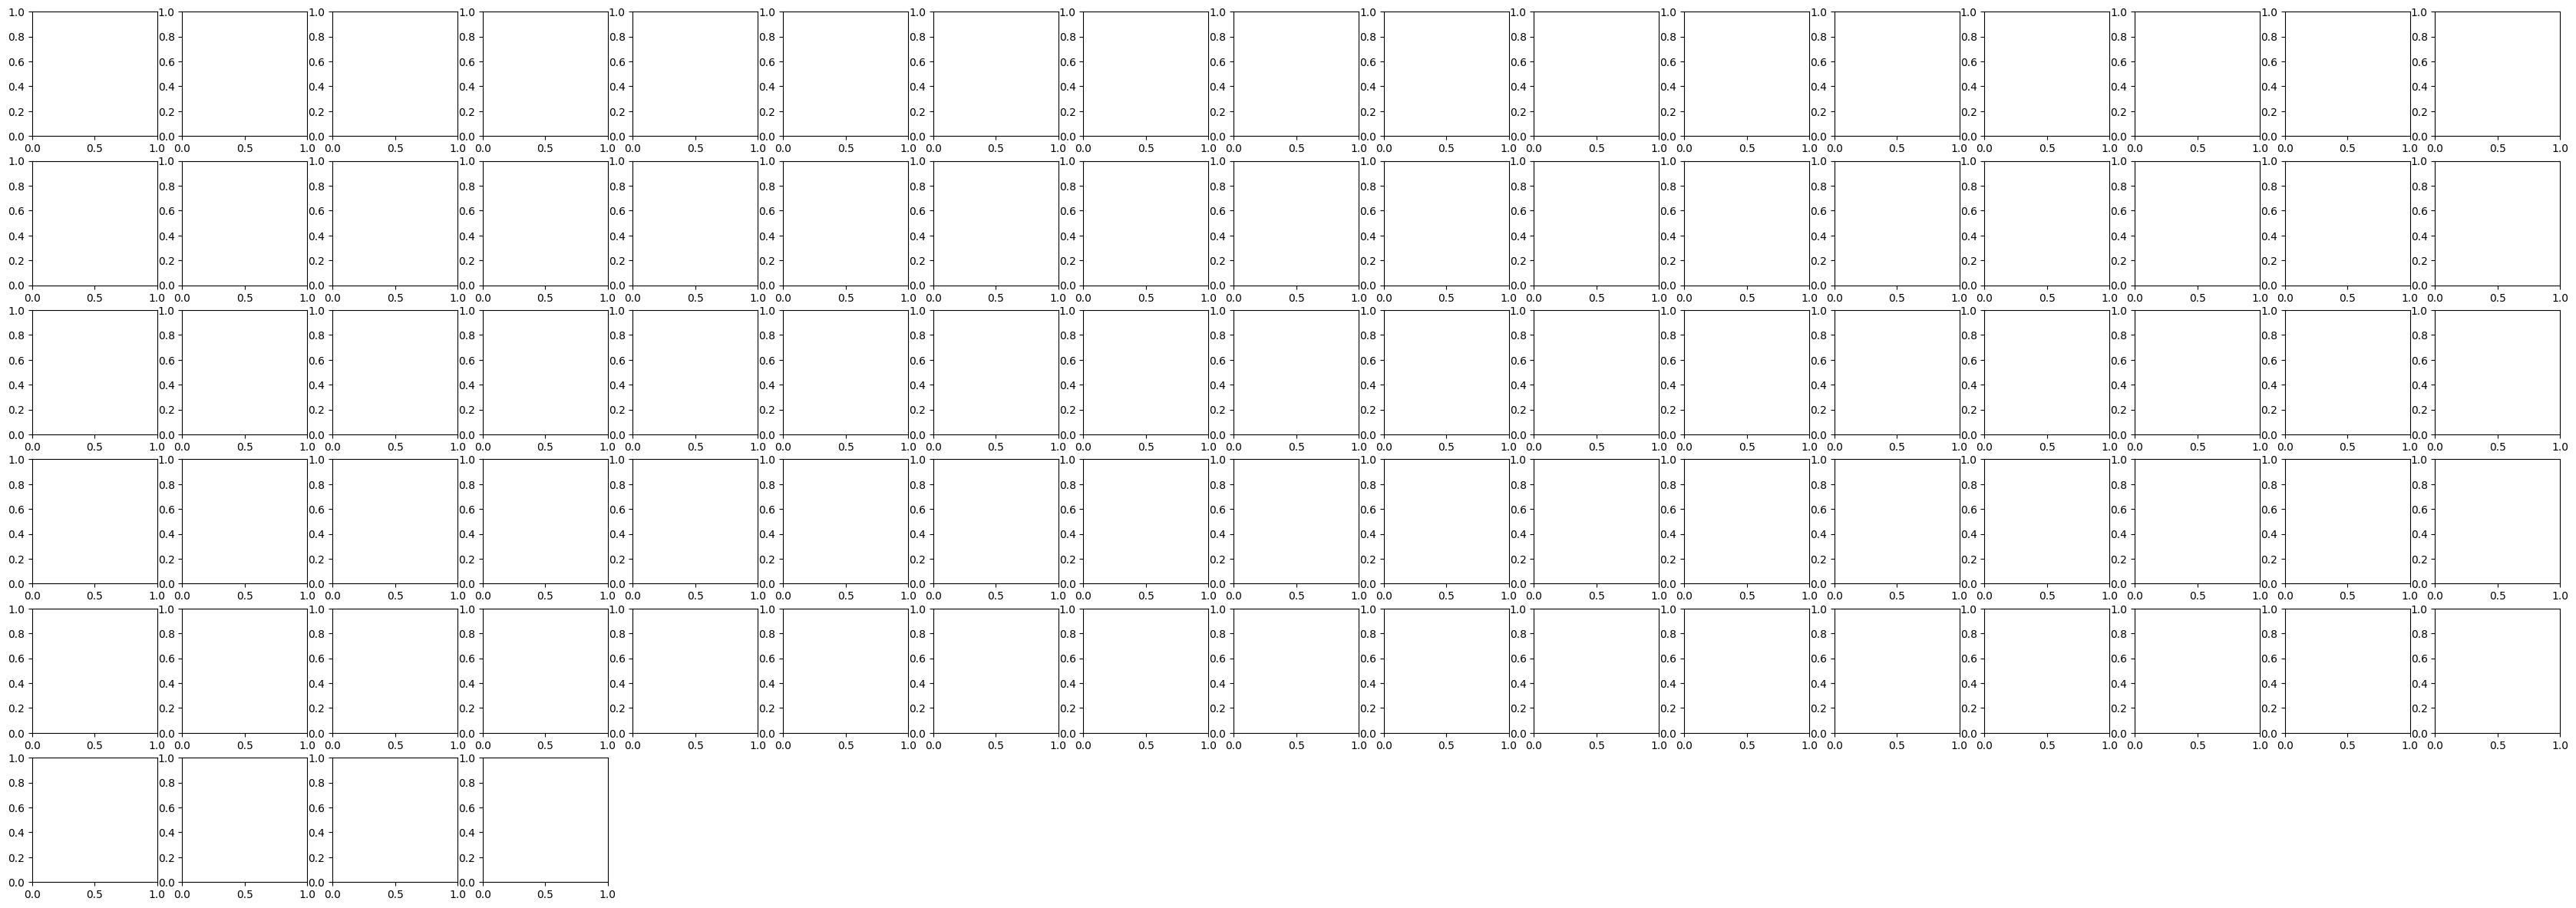

In [8]:
# pairplot
sample_all = sc_data_dataframe.sample(n=500)
selection = selected_features + ["critical_temp"]
sample_features = sample_all[selection]

sns.pairplot(sample_features, hue="critical_temp")

# Train-Test split

In [16]:
# split train and test data
x_train, x_test, y_train, y_test = \
    train_test_split(selected_sl_data_dataframe.to_numpy(), target_dataframe.to_numpy(), test_size=0.3)

#scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Plotting routines

In [17]:
def plot_grid_search_heatmap(validation_error, num_epochs, neurons, etas, fname=""):
    sns.heatmap(validation_error, annot=True, fmt=".2f")
    plt.xticks(np.linspace(0.5, len(neurons)+0.5, len(neurons)+1), labels=[str(x) for x in neurons])
    plt.xlabel("Number of neurons per layer")
    plt.yticks(np.linspace(0.5, len(etas)+0.5, len(etas)+1), labels=[str(x) for x in etas])
    plt.ylabel("Learning rate")
    plt.title(f"Mean validation error after {num_epochs} epochs")
    if fname != "":
        plt.savefig("./plots/" + fname + ".png")
        plt.savefig("./nice_plots/" + fname + ".pdf")

def plot_history(history, fname=""):
    # Extracting training and validation loss and accuracy from history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plotting training and validation loss
    #plt.figure(figsize=(12, 4))

    plt.plot(np.sqrt(train_loss), label='Training $\\Delta T$')
    plt.plot(np.sqrt(val_loss), label='Validation $\\Delta T$')
    plt.title('Training and Validation $\\Delta T$')
    plt.xlabel('Epochs')
    plt.ylabel('$\\Delta T$')
    plt.ylim(10, 30)
    plt.legend()
    if fname != "":
        plt.savefig("./plots/" + fname + ".png")
        plt.savefig("./nice_plots/" + fname + ".pdf")

def plot_prediction(y_true, y_pred, f, r2, val, log, perc=0, perc_val=None, fname="", viewmin = 0, viewmax = 140):
    a = viewmax - f
    b = viewmax + f
    xx = np.linspace(0, viewmax, 100)
    y1 = np.linspace(-f, a, 100)
    y2 = np.linspace(f, b, 100)

    plt.cla()
    plt.scatter(y_true, y_pred, s=0.3, label="Model data")
    plt.plot(xx, xx, color="red", label="Target line")
    plt.plot(xx, y1, color="green", label=f"Mean deviation from target line $\\Delta T = {np.round(f, 1)}$ K")
    plt.plot(xx, y2, color="green")

    if perc != 0 and perc_val != None:
        a = viewmax - perc_val
        b = viewmax + perc_val
        xx = np.linspace(0, viewmax, 100)
        y1 = np.linspace(-perc_val, a, 100)
        y2 = np.linspace(perc_val, b, 100)
        plt.plot(xx, y1, color="orange", label=f"{perc}th percentile")
        plt.plot(xx, y2, color="orange")

    if log:
        plt.yscale("log")
        plt.xscale("log")
        plt.ylim(1e-1, 140)
        plt.xlim(1e-1, 140)
    else:
        plt.ylim(viewmin, viewmax)
        plt.xlim(0, viewmax)
    plt.xlabel("True critical temperature $T_c$ (K)")
    plt.ylabel("Predicted critical temperature $\\tilde T_c$ (K)")    
    if val:
        plt.title(f"Test set: $R^2 = {np.round(r2,2)}$")
    else:
        plt.title(f"Training set: $R^2 = {np.round(r2,2)}$")
    plt.legend()    
    if fname != "":
        plt.savefig("./plots/" + fname + ".png")
        plt.savefig("./nice_plots/" + fname + ".pdf")
    plt.show()


def plot_residuals(err, perc, fname=""):
    perc_pos = np.percentile(err, perc)
    mean = np.mean(err)

    plt.axvline(perc_pos, color="red", label=f"{perc}th percentile")
    plt.axvline(mean, color="green", label=f"Mean residual")
    plt.hist(err, bins=80, label="Residuals", alpha=0.85)
    plt.xlim(0, 80)
    plt.legend()
    plt.xlabel("Model prediction residuals (K)")
    if fname != "":
        plt.savefig("./plots/" + fname + ".png")
        plt.savefig("./nice_plots/" + fname + ".pdf")
    plt.show()


# Grid search

In [ ]:
# try a simple nn
etas = [1e-5, 1e-4, 1e-3, 1e-2]
layers = [1, 2, 3, 4, 5]
neurons = [10, 40, 80, 200]
validaton_delta_t = np.empty((len(etas),len(neurons)))
best_delta_t = 1e100
epochs = 20

for i, eta in enumerate(etas):
    for j, neuron in enumerate(neurons):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(neuron, activation=tf.nn.relu, input_shape=(17,)))
        model.add(tf.keras.layers.Dense(neuron, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(neuron, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(1,))

        opt = tf.keras.optimizers.SGD(learning_rate=eta)
        model.compile(loss='mean_squared_error',
                    optimizer=opt,
                    )

        # Define a ModelCheckpoint callback
        checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

        #print("eta:", eta, f"size: {lays} x {neuron}")
        history = model.fit(x_train_scaled, y_train,epochs=epochs, verbose=1, callbacks=[checkpoint], validation_split=0.2)

        delta_t = np.sqrt(model.evaluate(x_test_scaled, y_test))
        print(delta_t)
        validaton_delta_t[i, j] = delta_t
        if delta_t < best_delta_t:
            best_delta_t = delta_t
            best_model = load_model('best_model.h5')
            best_history = history
        print(neuron, eta)

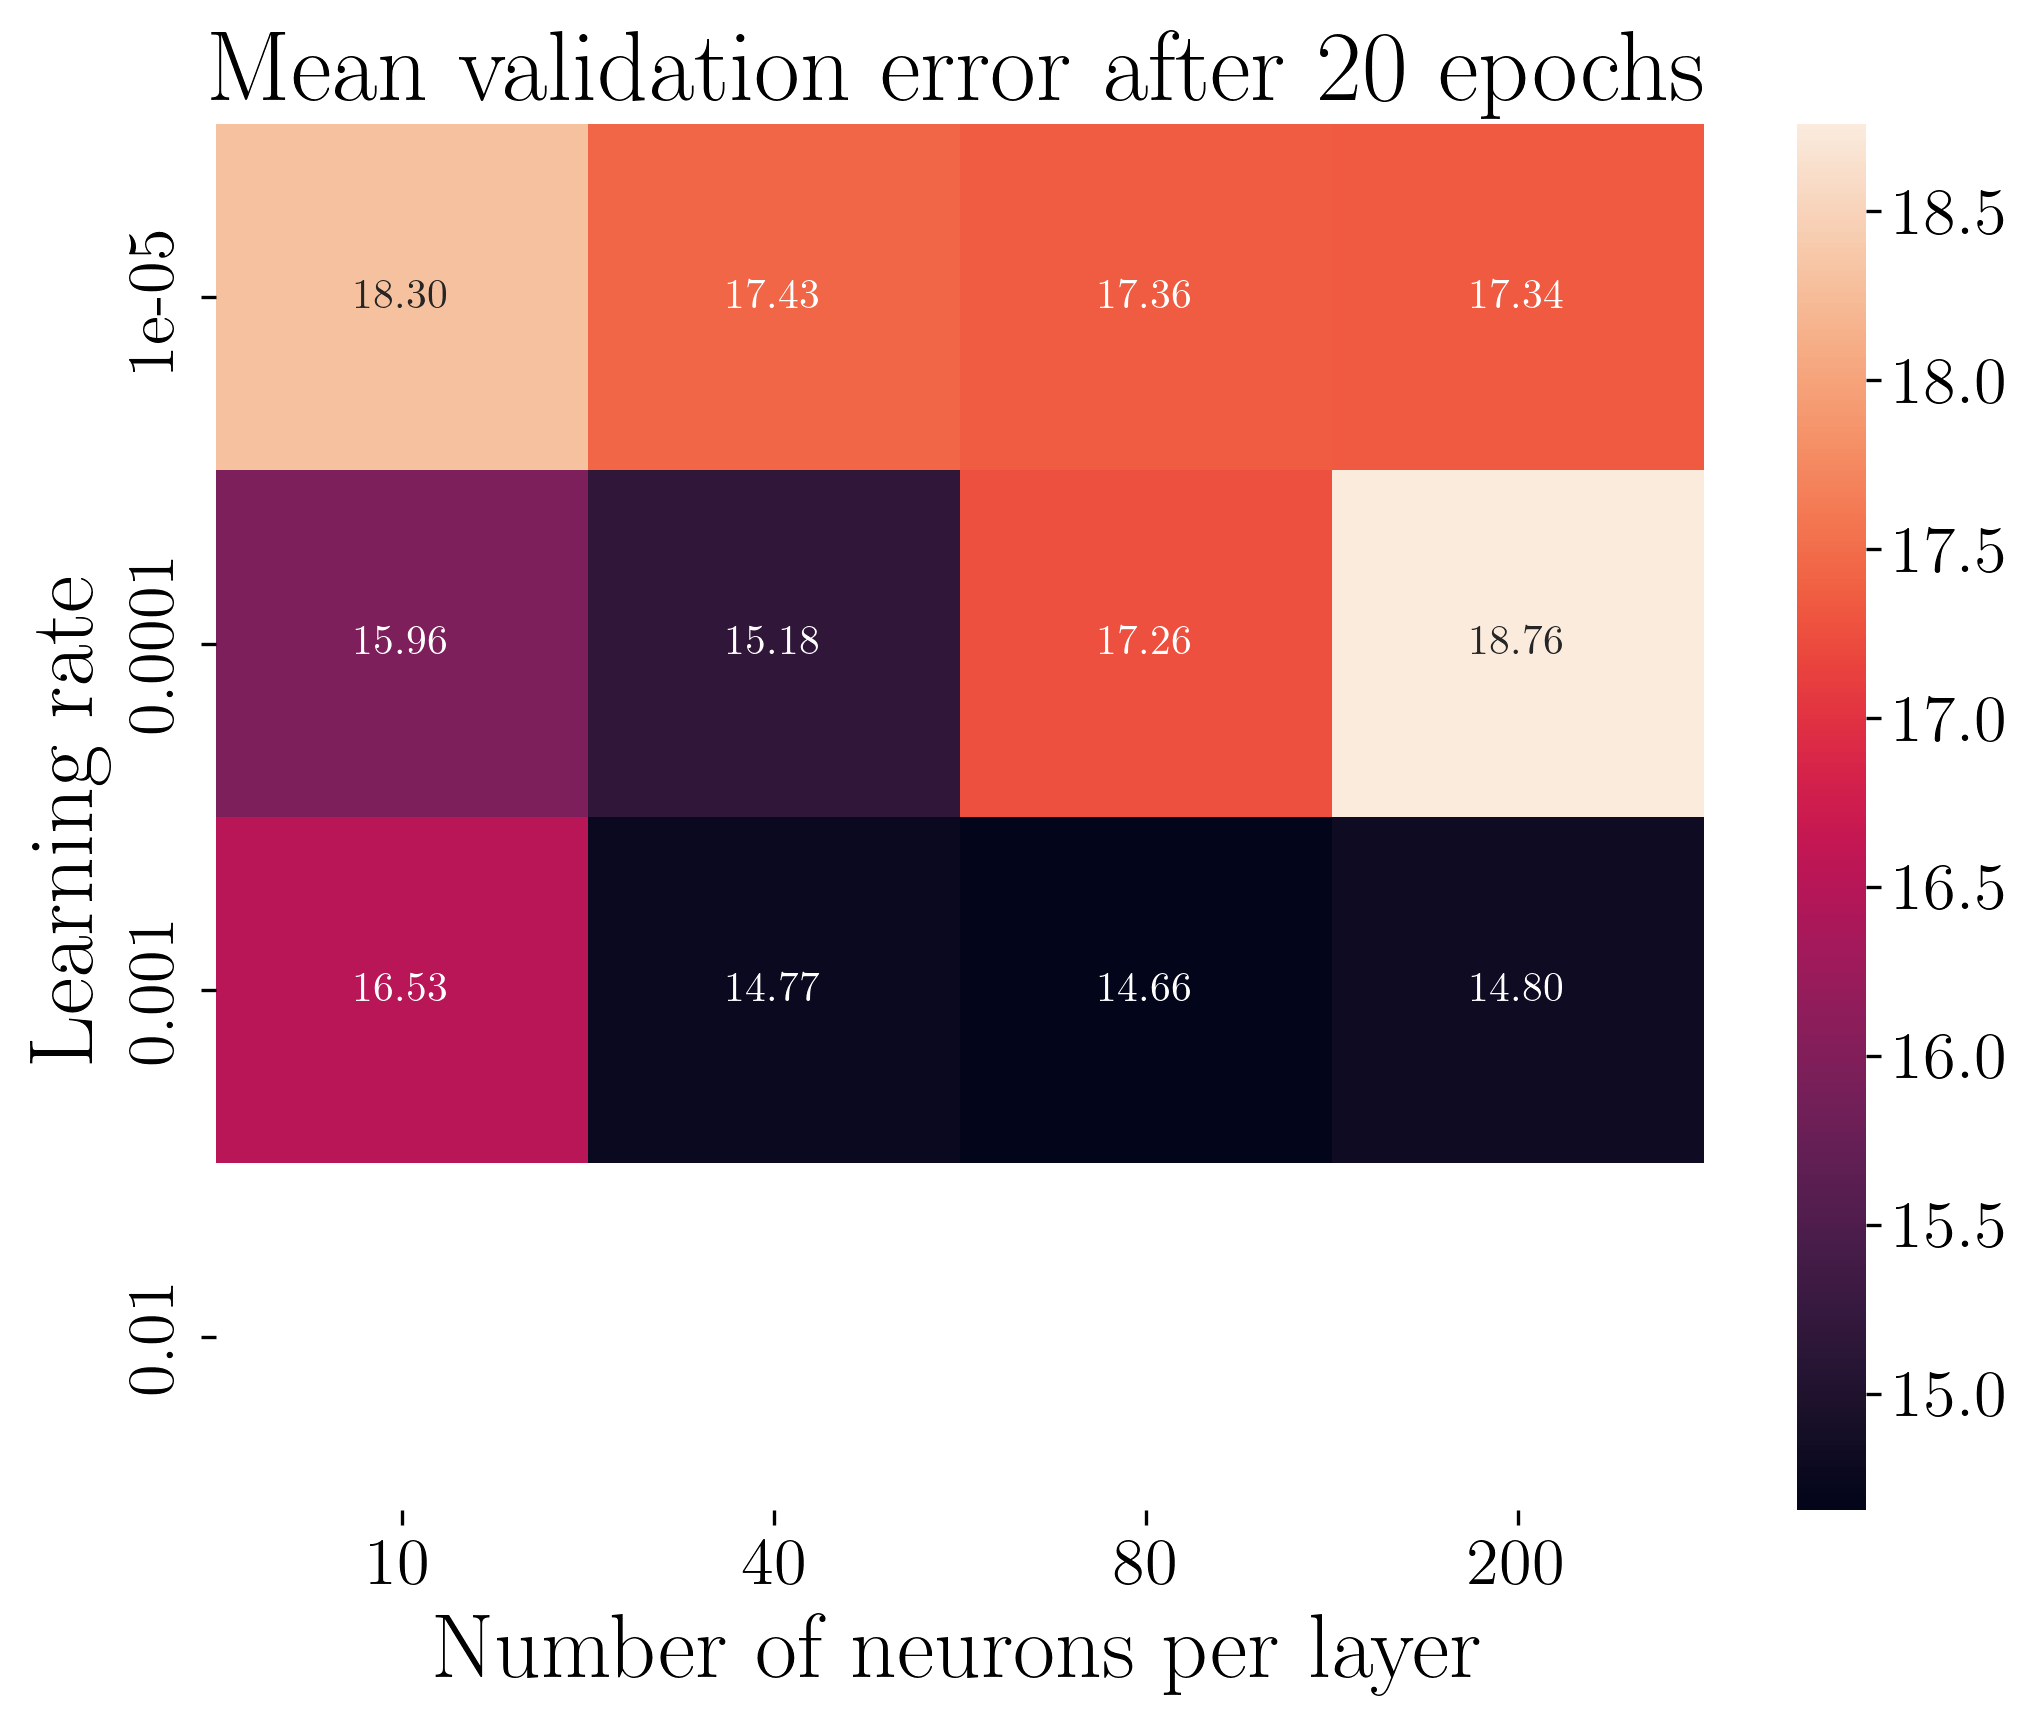

In [200]:
plot_grid_search_heatmap(validaton_delta_t, epochs, neurons, etas, "heatmap_3_layers")

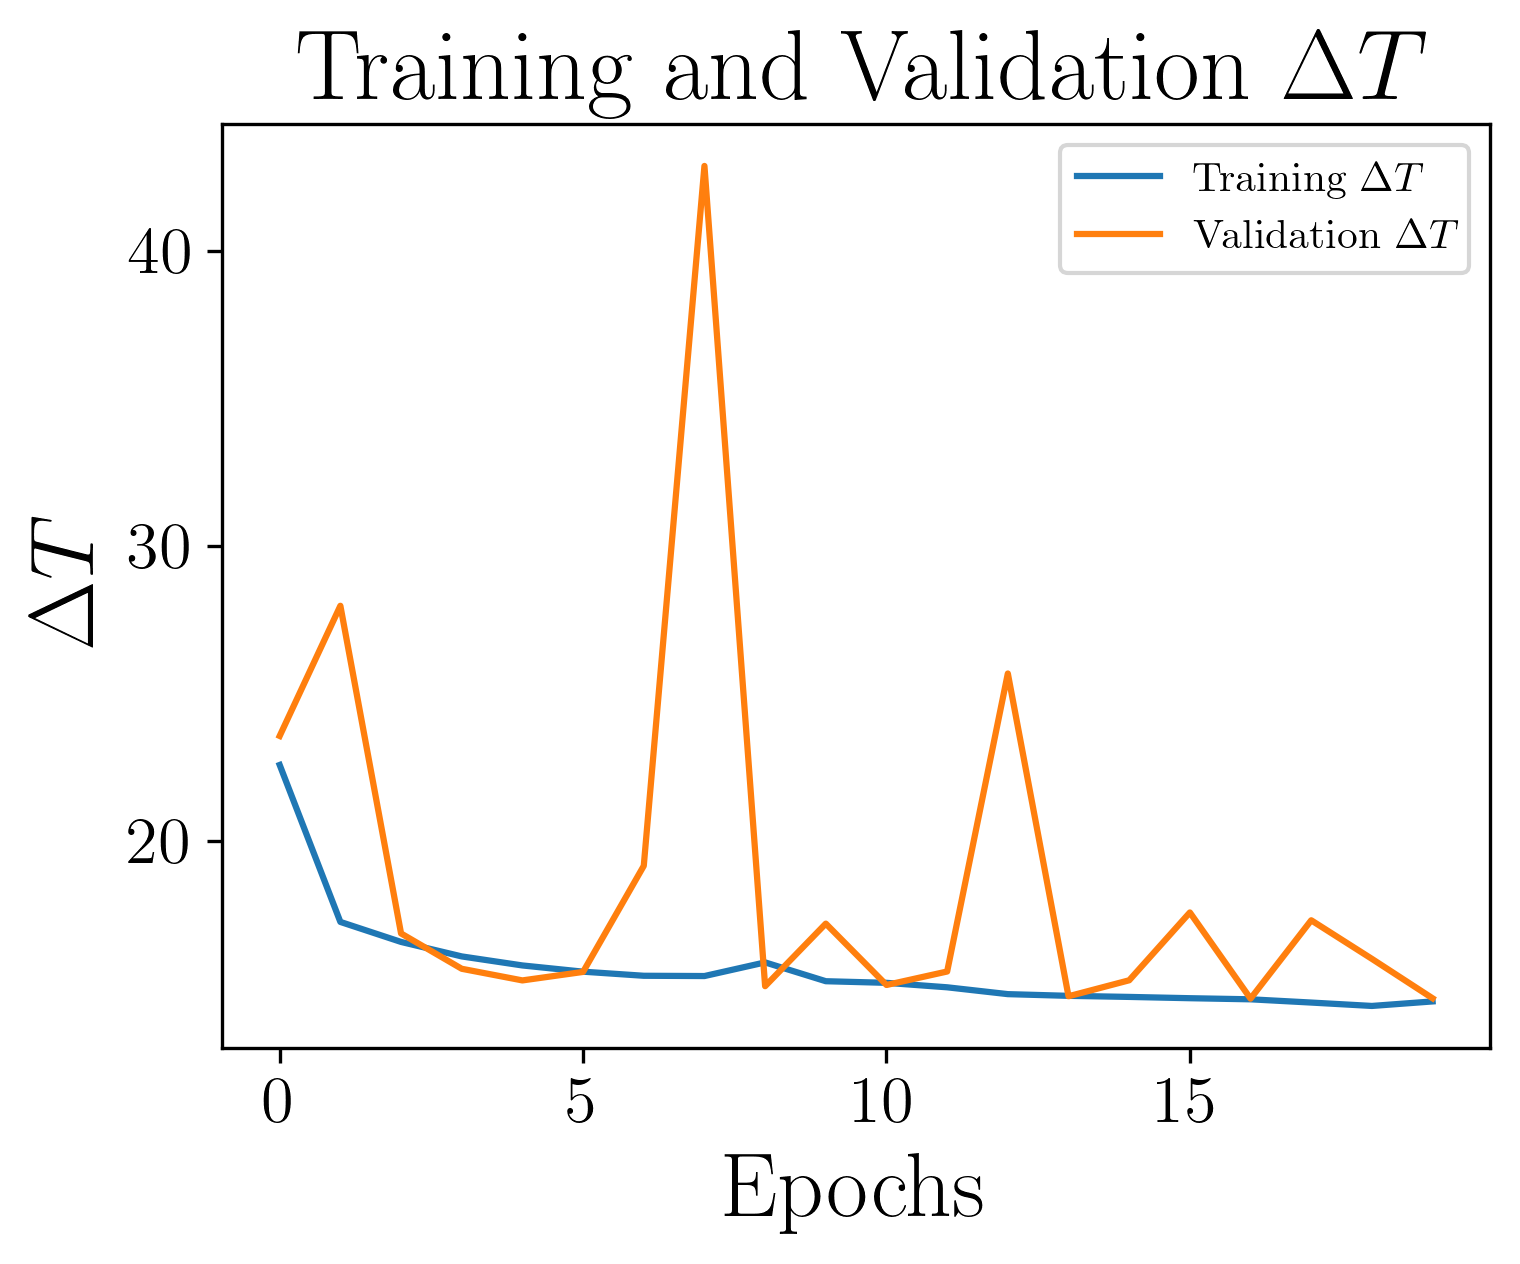

In [201]:
plot_history(best_history, "best_gridsearch_history")

In [202]:
new_history = best_model.fit(x_train_scaled, y_train,epochs=1000, verbose=1, callbacks=[checkpoint], validation_data=(x_test_scaled, y_test))

Epoch 1/1000
464/466 [============================>.] - ETA: 0s - loss: 208.8940
Epoch 1: val_loss improved from inf to 212.70523, saving model to best_model.h5
466/466 [==============================] - 5s 9ms/step - loss: 208.9993 - val_loss: 212.7052
Epoch 2/1000
 20/466 [>.............................] - ETA: 2s - loss: 183.1376

/home/max/miniconda3/envs/ML1/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


459/466 [============================>.] - ETA: 0s - loss: 209.6778
Epoch 2: val_loss did not improve from 212.70523
466/466 [==============================] - 4s 8ms/step - loss: 209.6671 - val_loss: 226.8620
Epoch 3/1000
465/466 [============================>.] - ETA: 0s - loss: 210.1752
Epoch 3: val_loss improved from 212.70523 to 205.24567, saving model to best_model.h5
466/466 [==============================] - 4s 8ms/step - loss: 210.1225 - val_loss: 205.2457
Epoch 4/1000
460/466 [============================>.] - ETA: 0s - loss: 209.8298
Epoch 4: val_loss did not improve from 205.24567
466/466 [==============================] - 3s 7ms/step - loss: 209.7616 - val_loss: 214.9122
Epoch 5/1000
458/466 [============================>.] - ETA: 0s - loss: 201.5219
Epoch 5: val_loss did not improve from 205.24567
466/466 [==============================] - 3s 7ms/step - loss: 201.5493 - val_loss: 286.9147
Epoch 6/1000
460/466 [============================>.] - ETA: 0s - loss: 205.1452
Epo

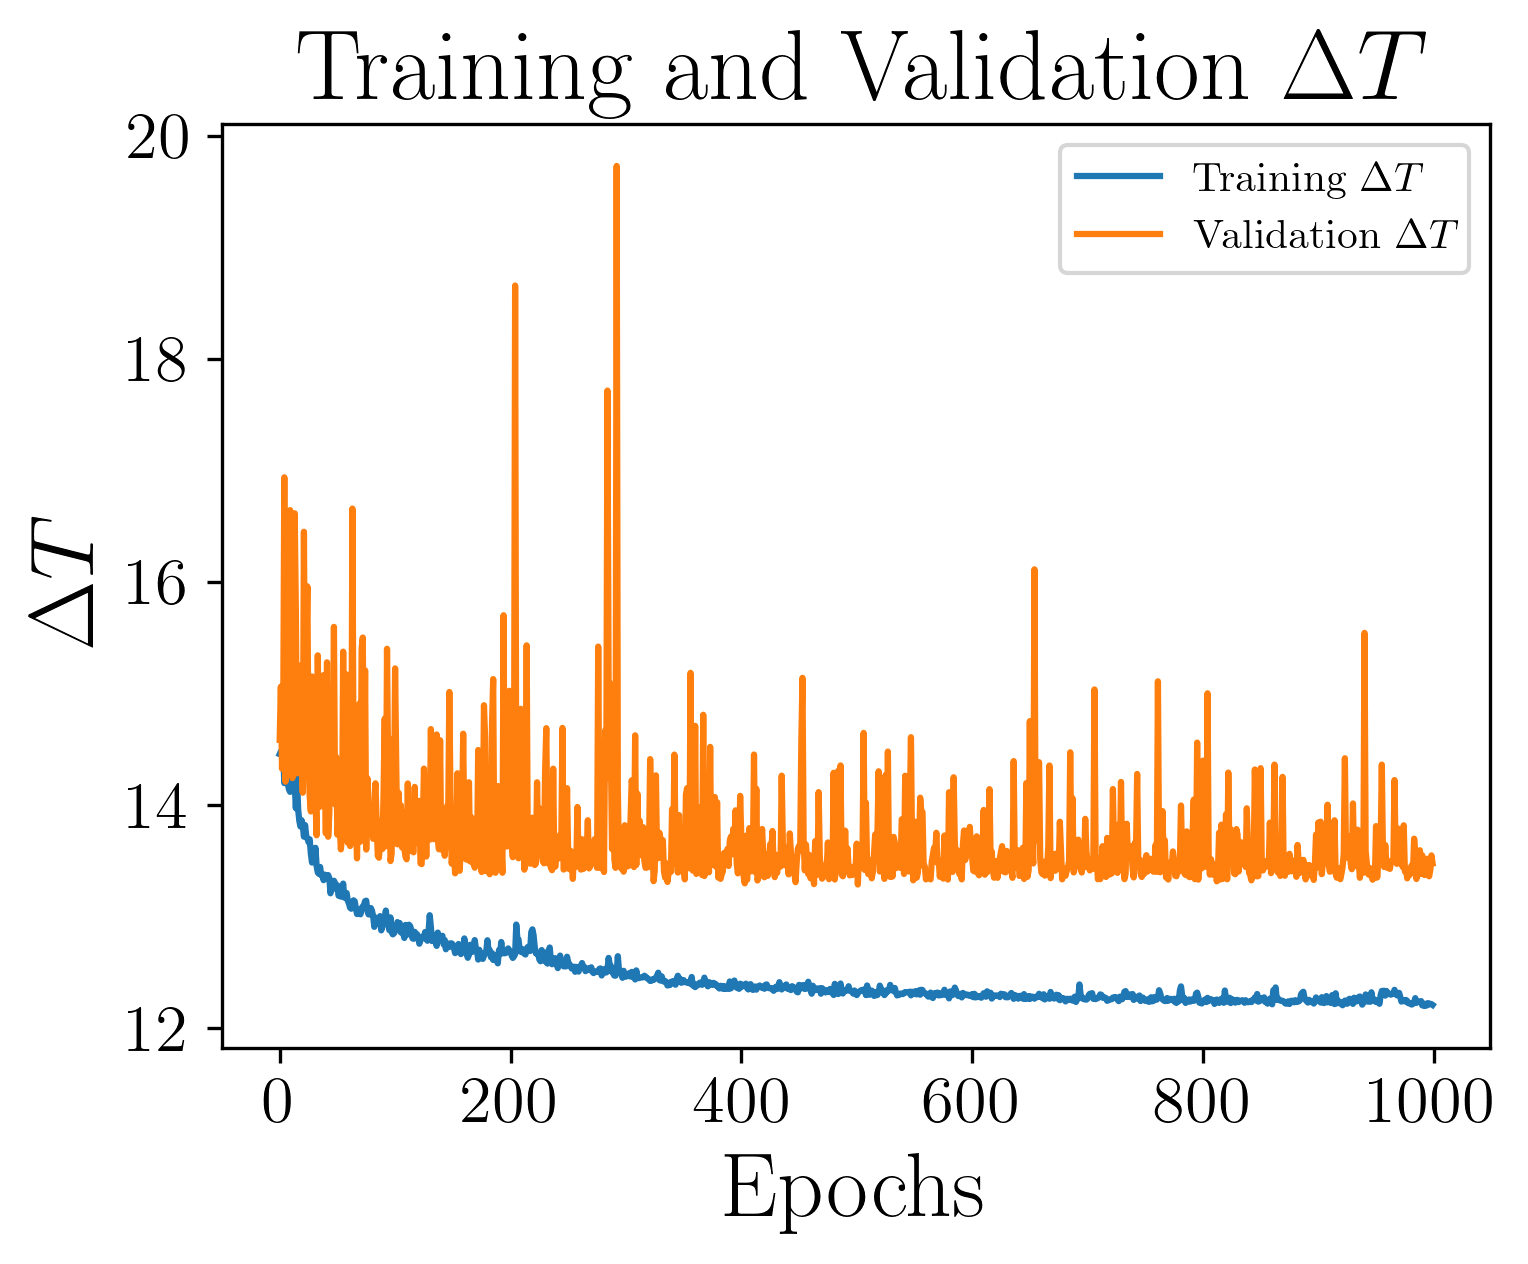

In [203]:
plot_history(new_history, "best_gridsearch_further_history")

200/200 [==============================] - 1s 4ms/step - loss: 176.5681
13.28789355896468


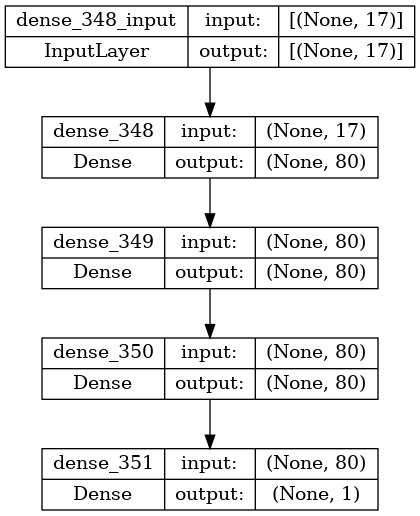

In [204]:
best_model = load_model('best_model.h5')
meanerr = np.sqrt(best_model.evaluate(x_test_scaled, y_test))
print(meanerr)
tf.keras.utils.plot_model(best_model, show_shapes=True,)

# Plot performance

200/200 [==============================] - 1s 3ms/step
0.8497966943692146


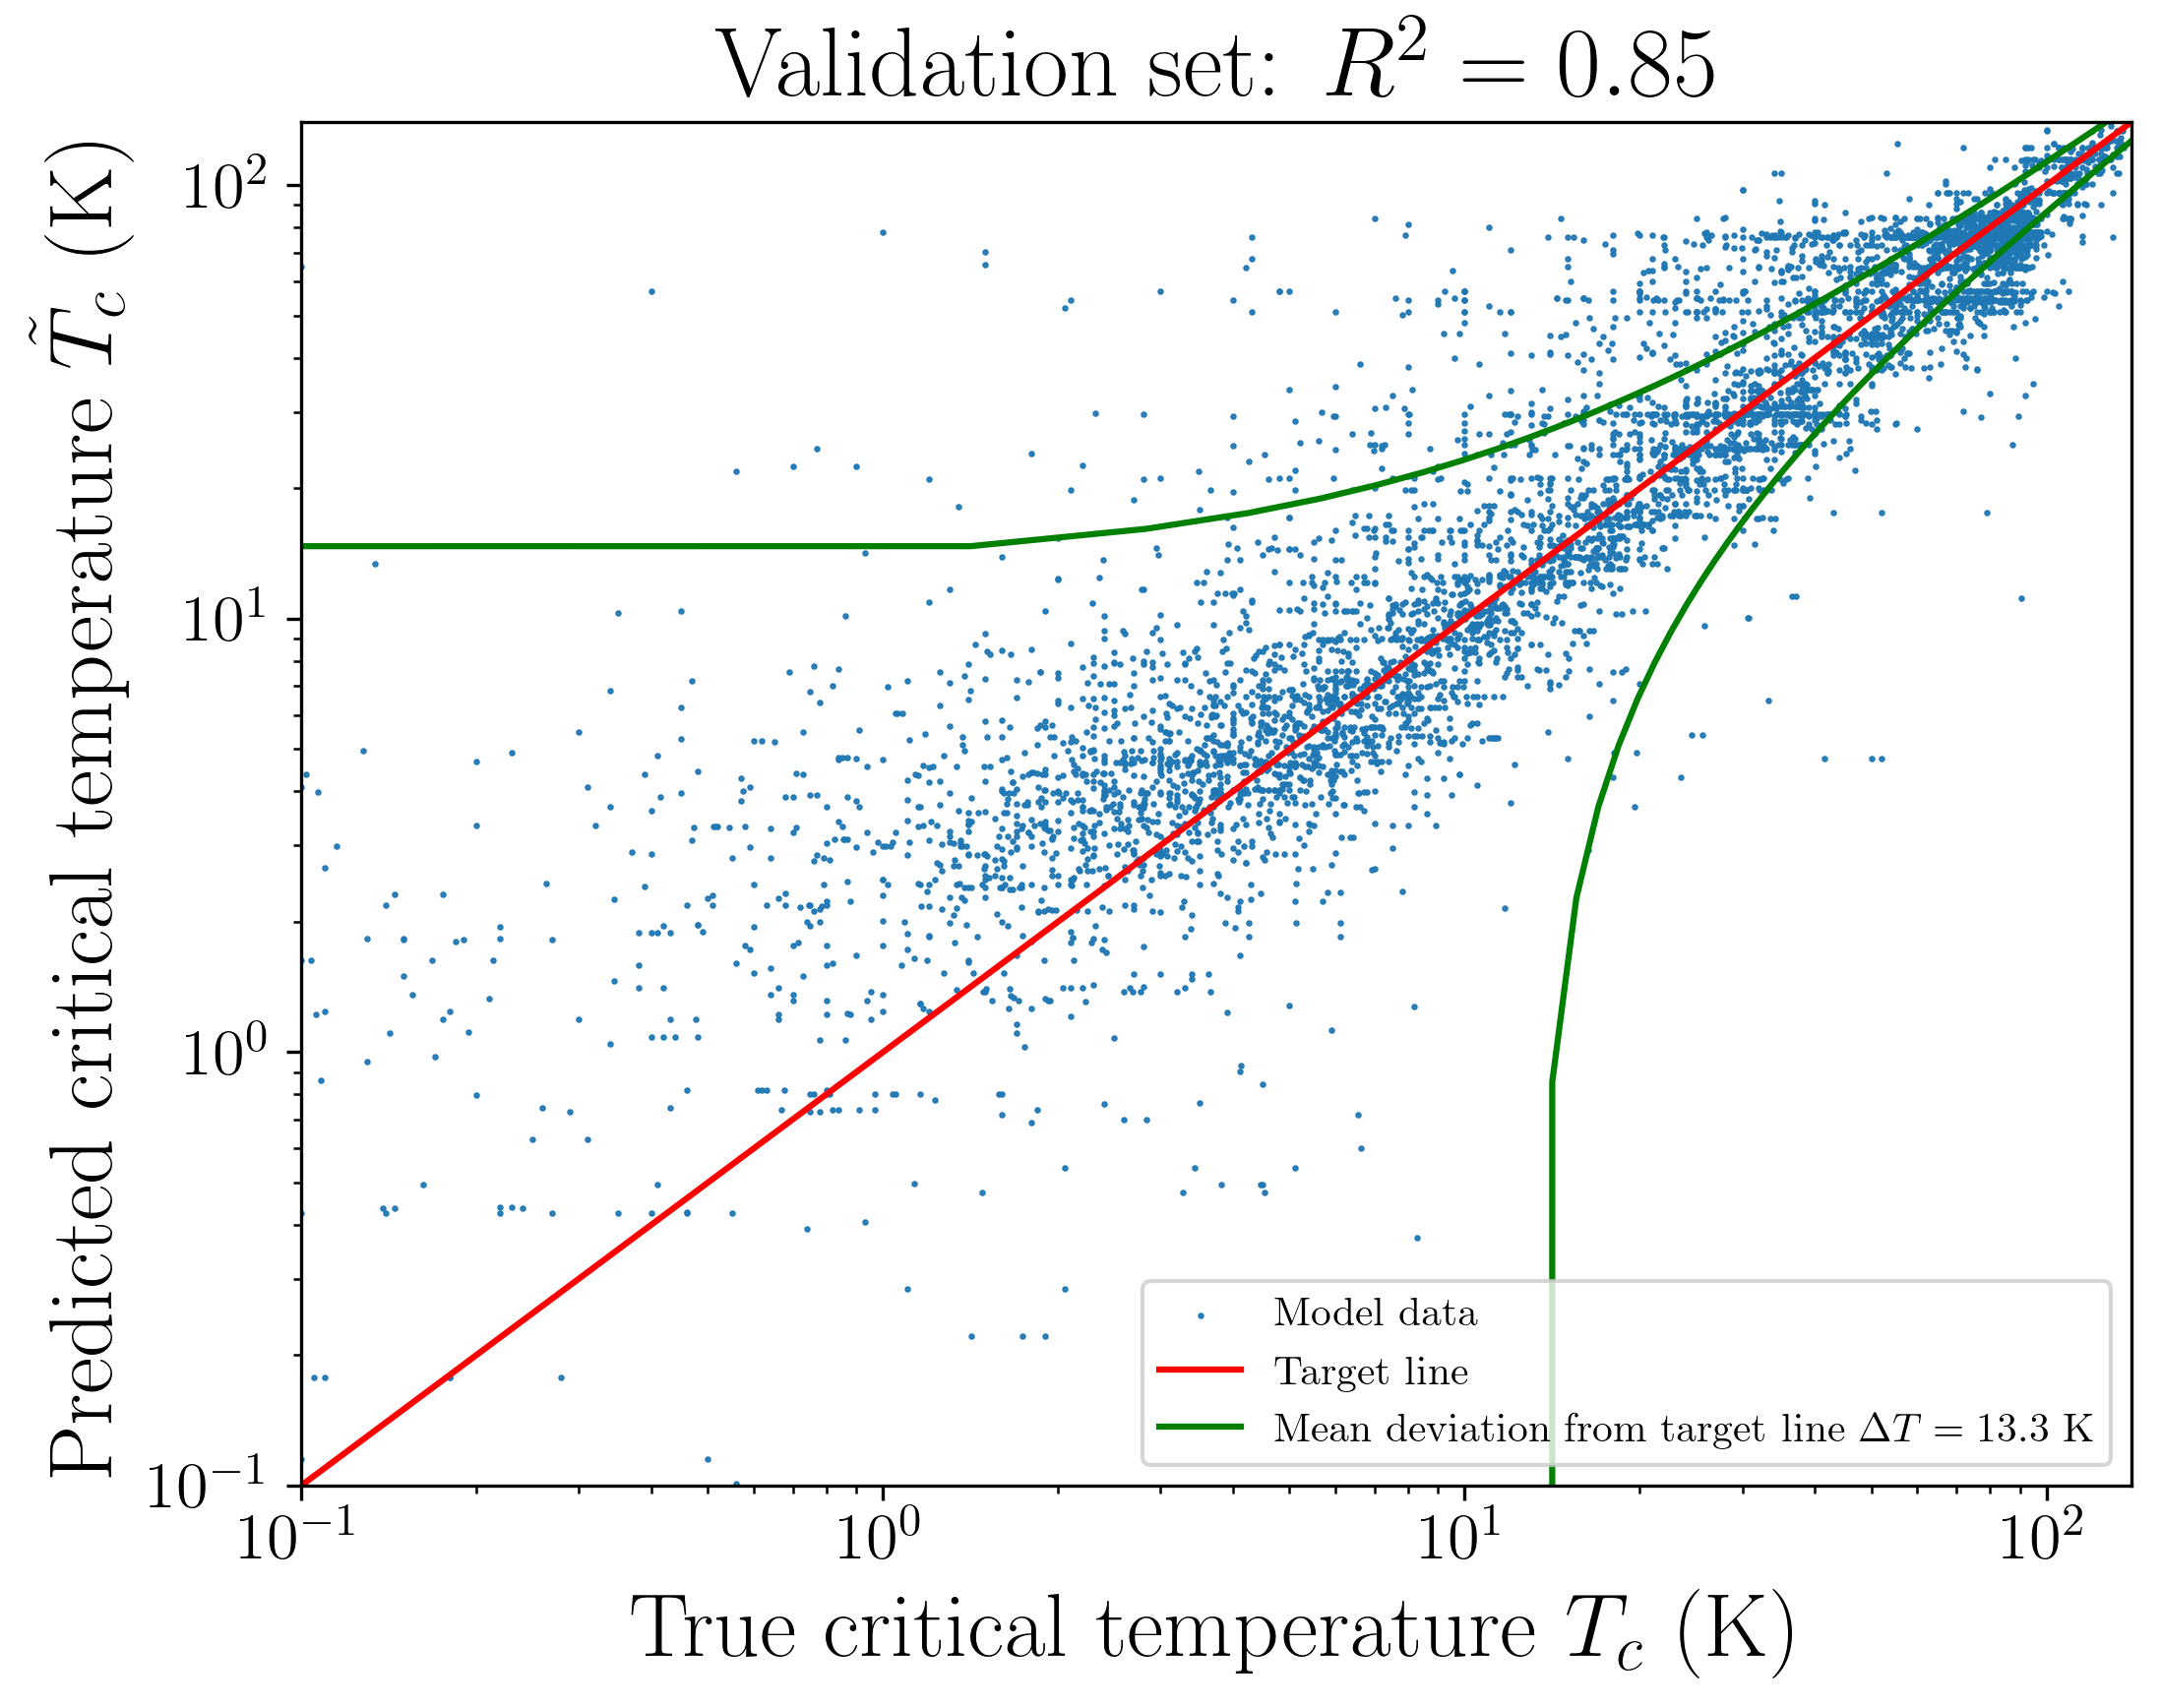

In [206]:
y_pred = best_model.predict(x_test_scaled)
f = meanerr


r2 = r2_score(y_test, y_pred)
print(r2)
plot_prediction(y_test, y_pred, f, r2, val=True, log=False, fname="prediction")
plot_prediction(y_test, y_pred, f, r2, val=True, log=True, fname="prediction_log")

  1/466 [..............................] - ETA: 18s

466/466 [==============================] - 2s 4ms/step - loss: 147.0077
0.8745968915303024


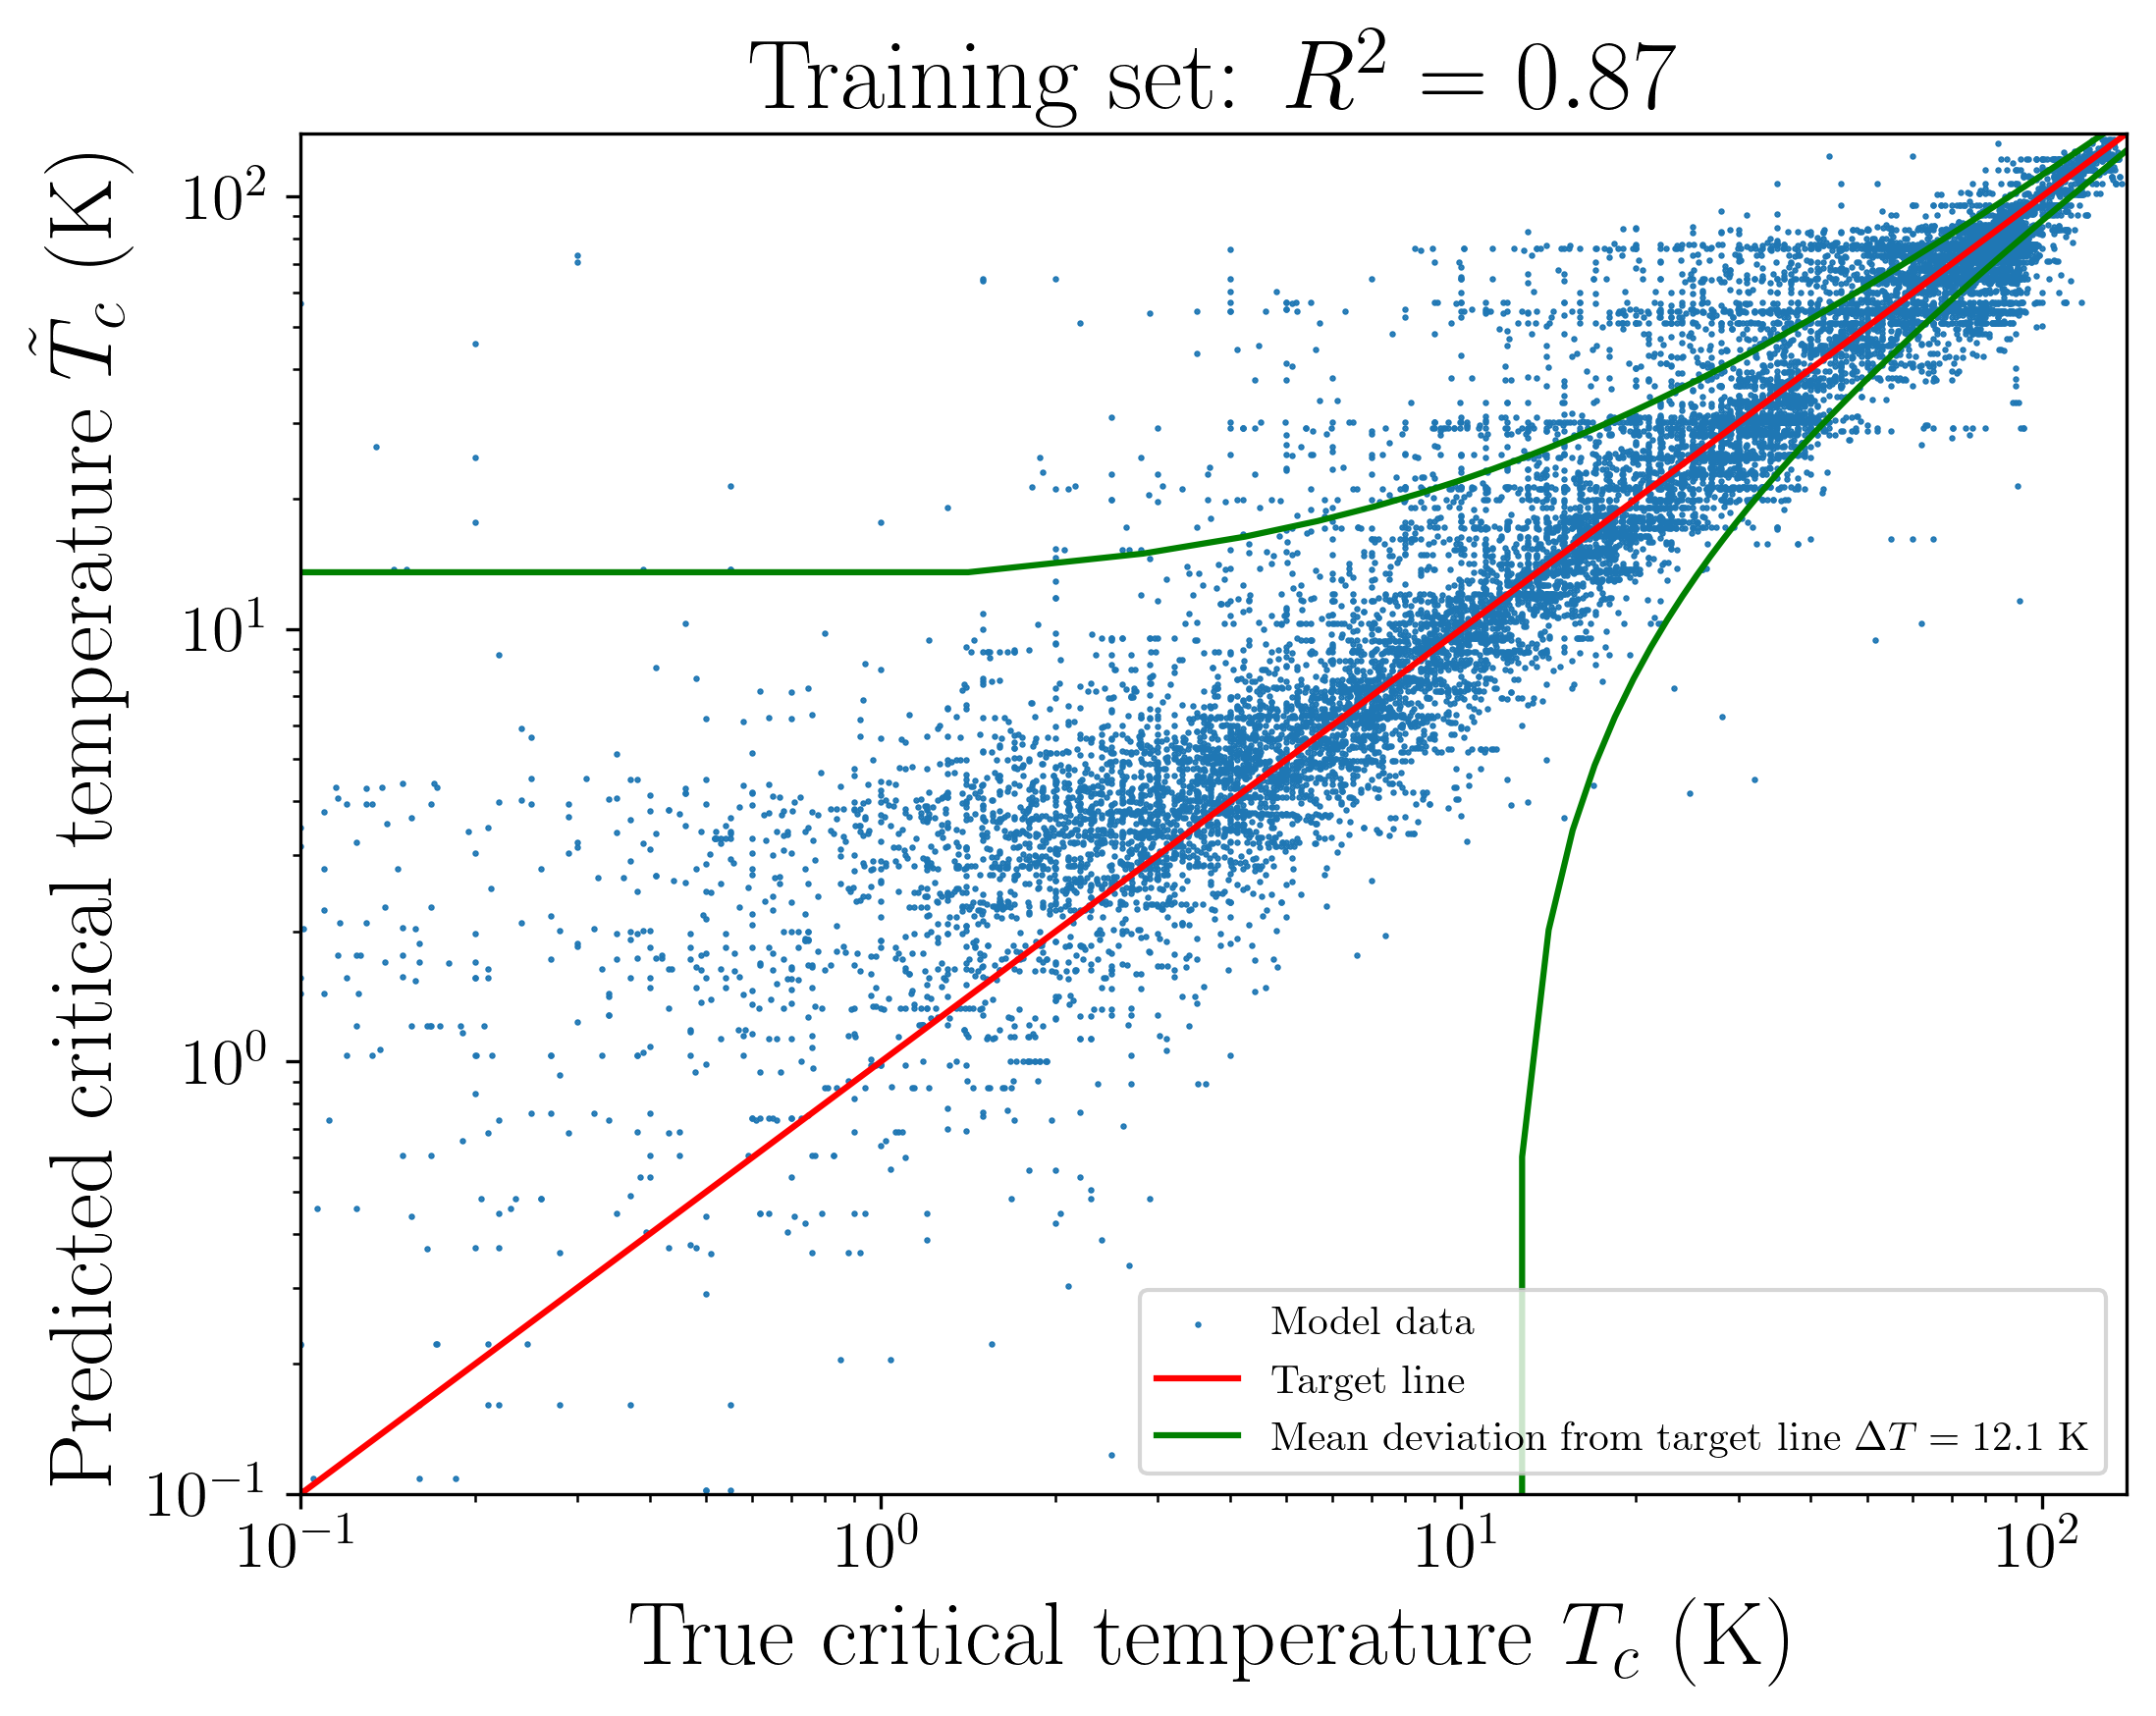

In [207]:
y_pred = best_model.predict(x_train_scaled)
f = np.sqrt(best_model.evaluate(x_train_scaled, y_train))

r2 = r2_score(y_train, y_pred)
print(r2)

plot_prediction(y_train, y_pred, f, r2, val=False, log=False, fname="prediction_training")
plot_prediction(y_train, y_pred, f, r2, val=False, log=True, fname="prediction_training_log")

# Linreg

34.32244212409269


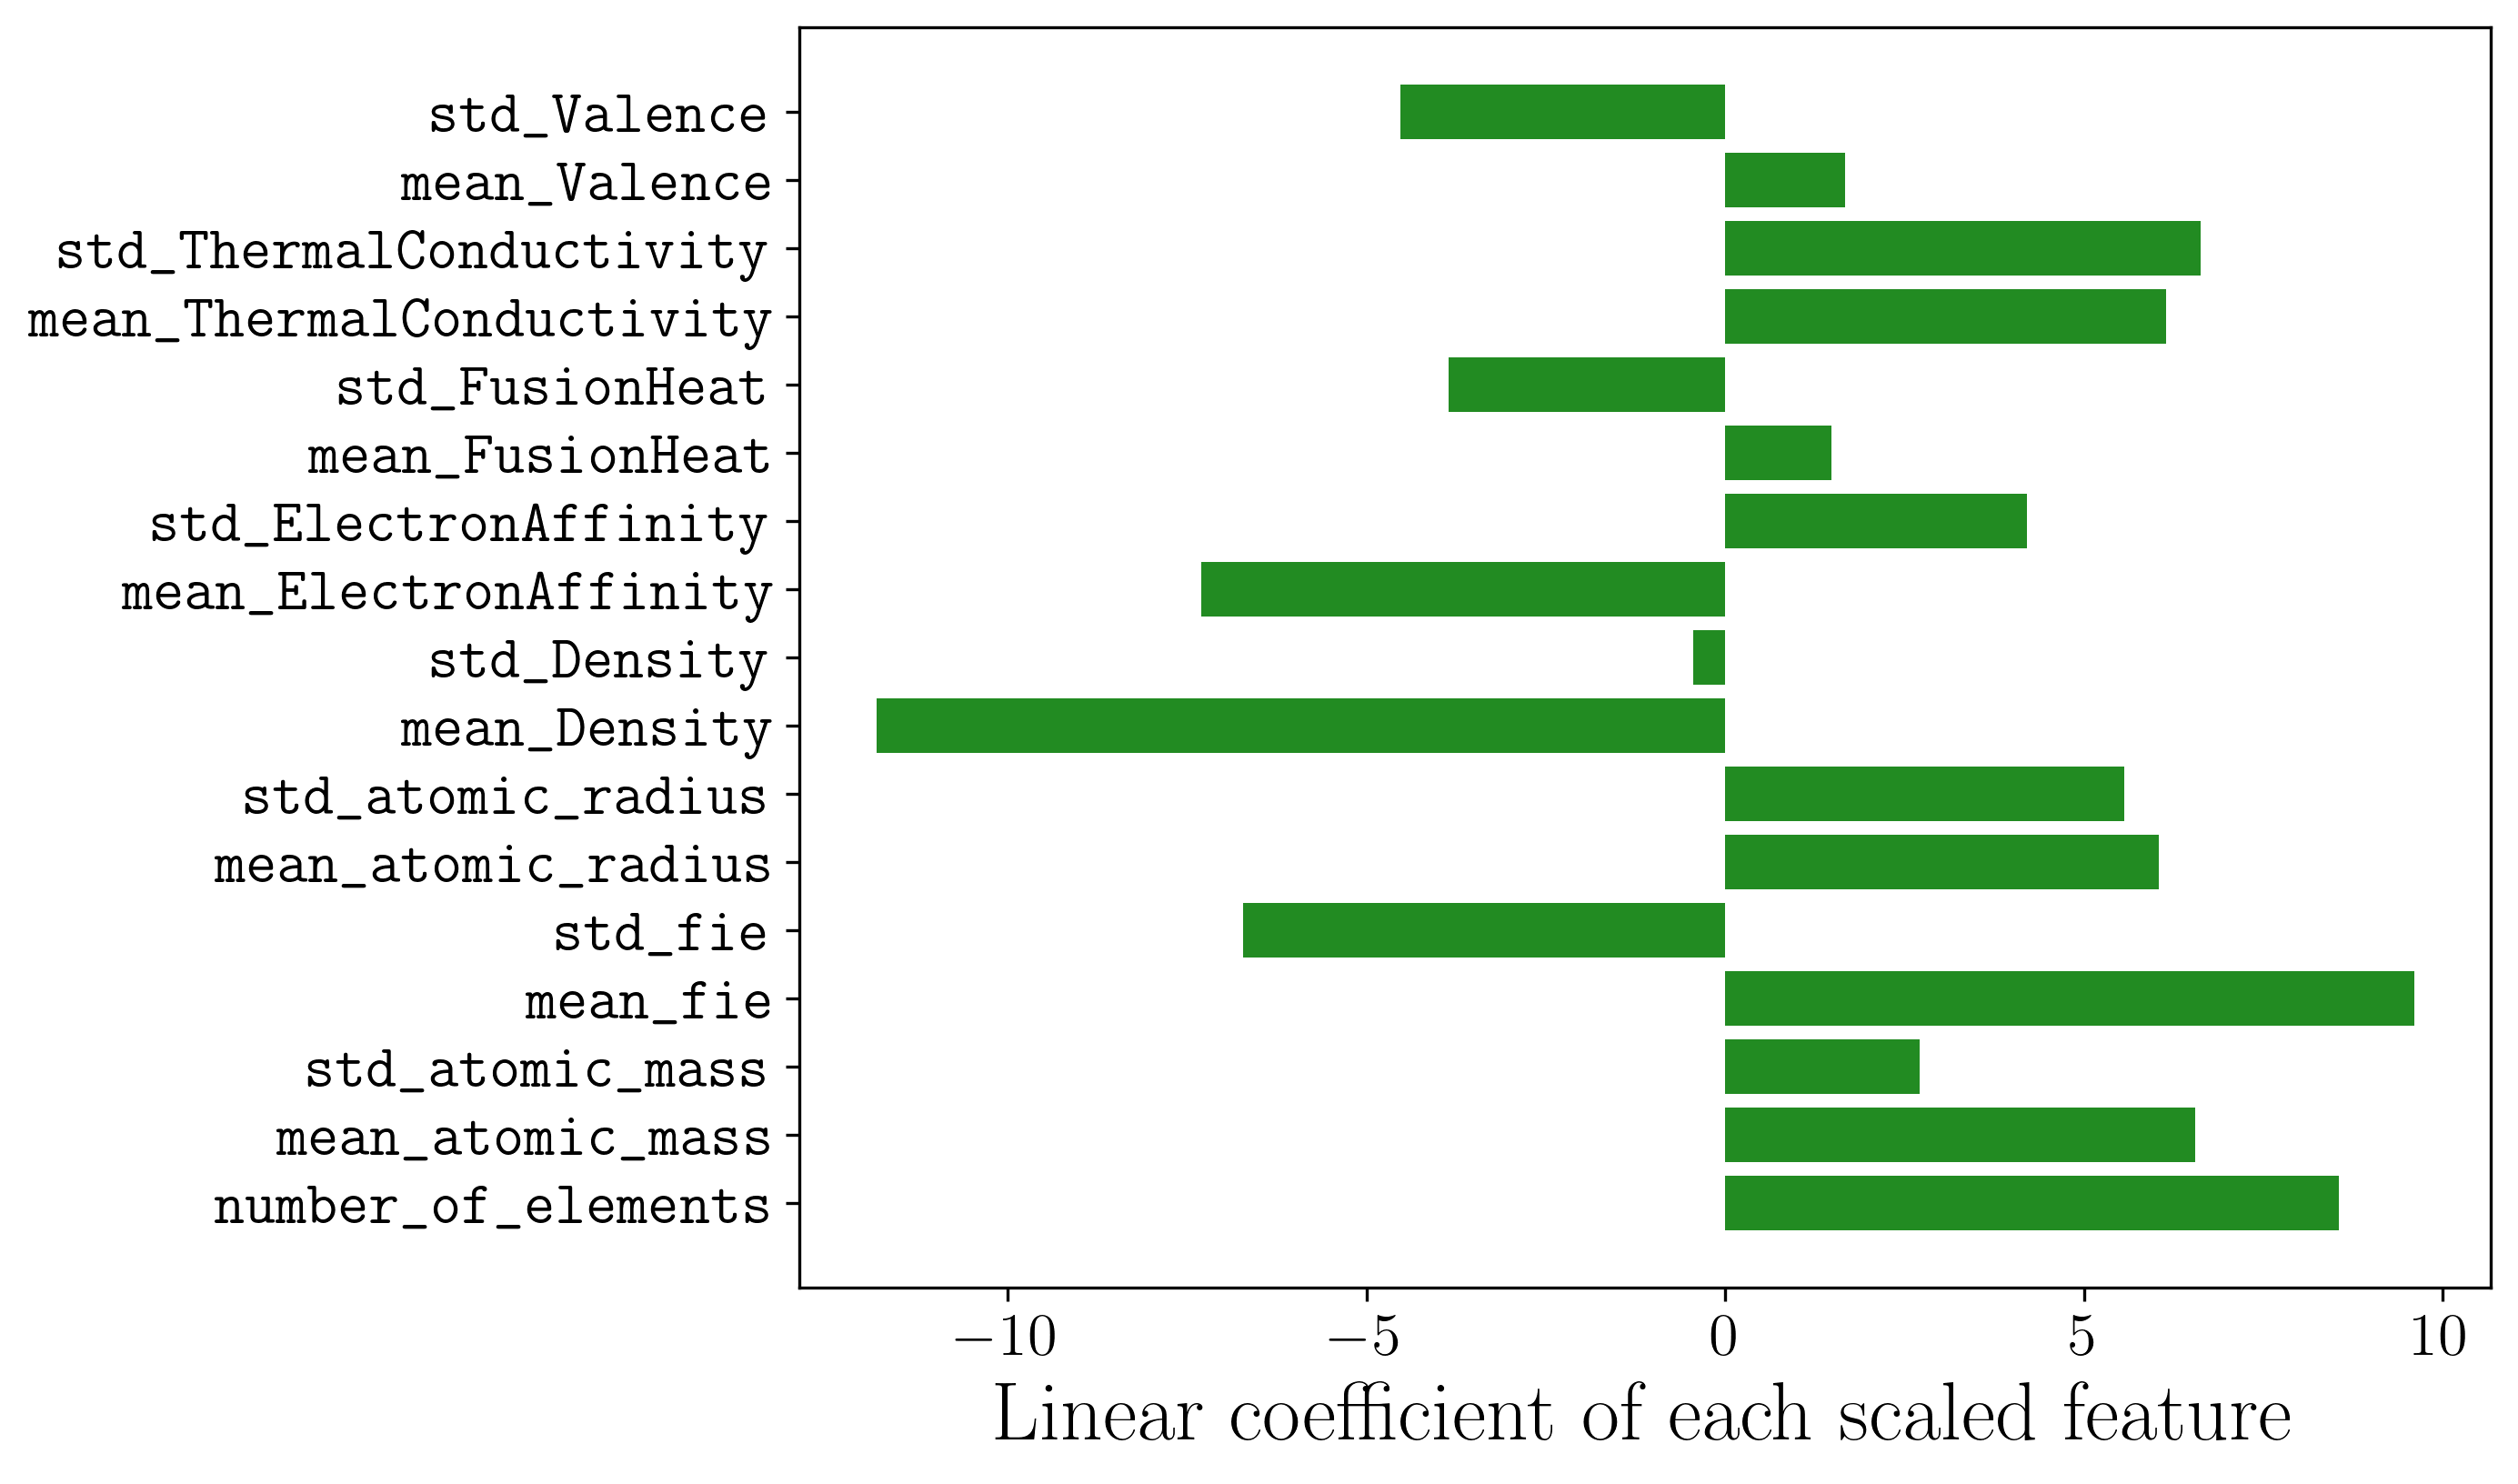

In [28]:
# try linreg again
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)
y_pred = linear_model.predict(x_test_scaled)

slopes = linear_model.coef_

selected_features_print = [f"\\texttt{{{feature}}}" for feature in selected_features]
plt.barh(selected_features_print, slopes, color="forestgreen")
plt.xlabel("Linear coefficient of each scaled feature")
plt.savefig("./plots/linearcoeffs.png")
plt.savefig("./nice_plots/linearcoeffs.pdf")
plt.show()

In [ ]:

err = np.abs(y_pred.flatten() - y_test.flatten())
meanerr = np.mean(err)
perc_val = np.percentile(err, 90)
plot_residuals(err, 90, "linreg_res")

r2 = r2_score(y_test, y_pred)
print(r2)
plot_prediction(y_test, y_pred, meanerr, r2, val=True, log=False, fname="linreg", perc=90, perc_val=perc_val)
plot_prediction(y_test, y_pred, meanerr, r2, val=True, log=True, fname="linreg_log", perc=90, perc_val=perc_val)

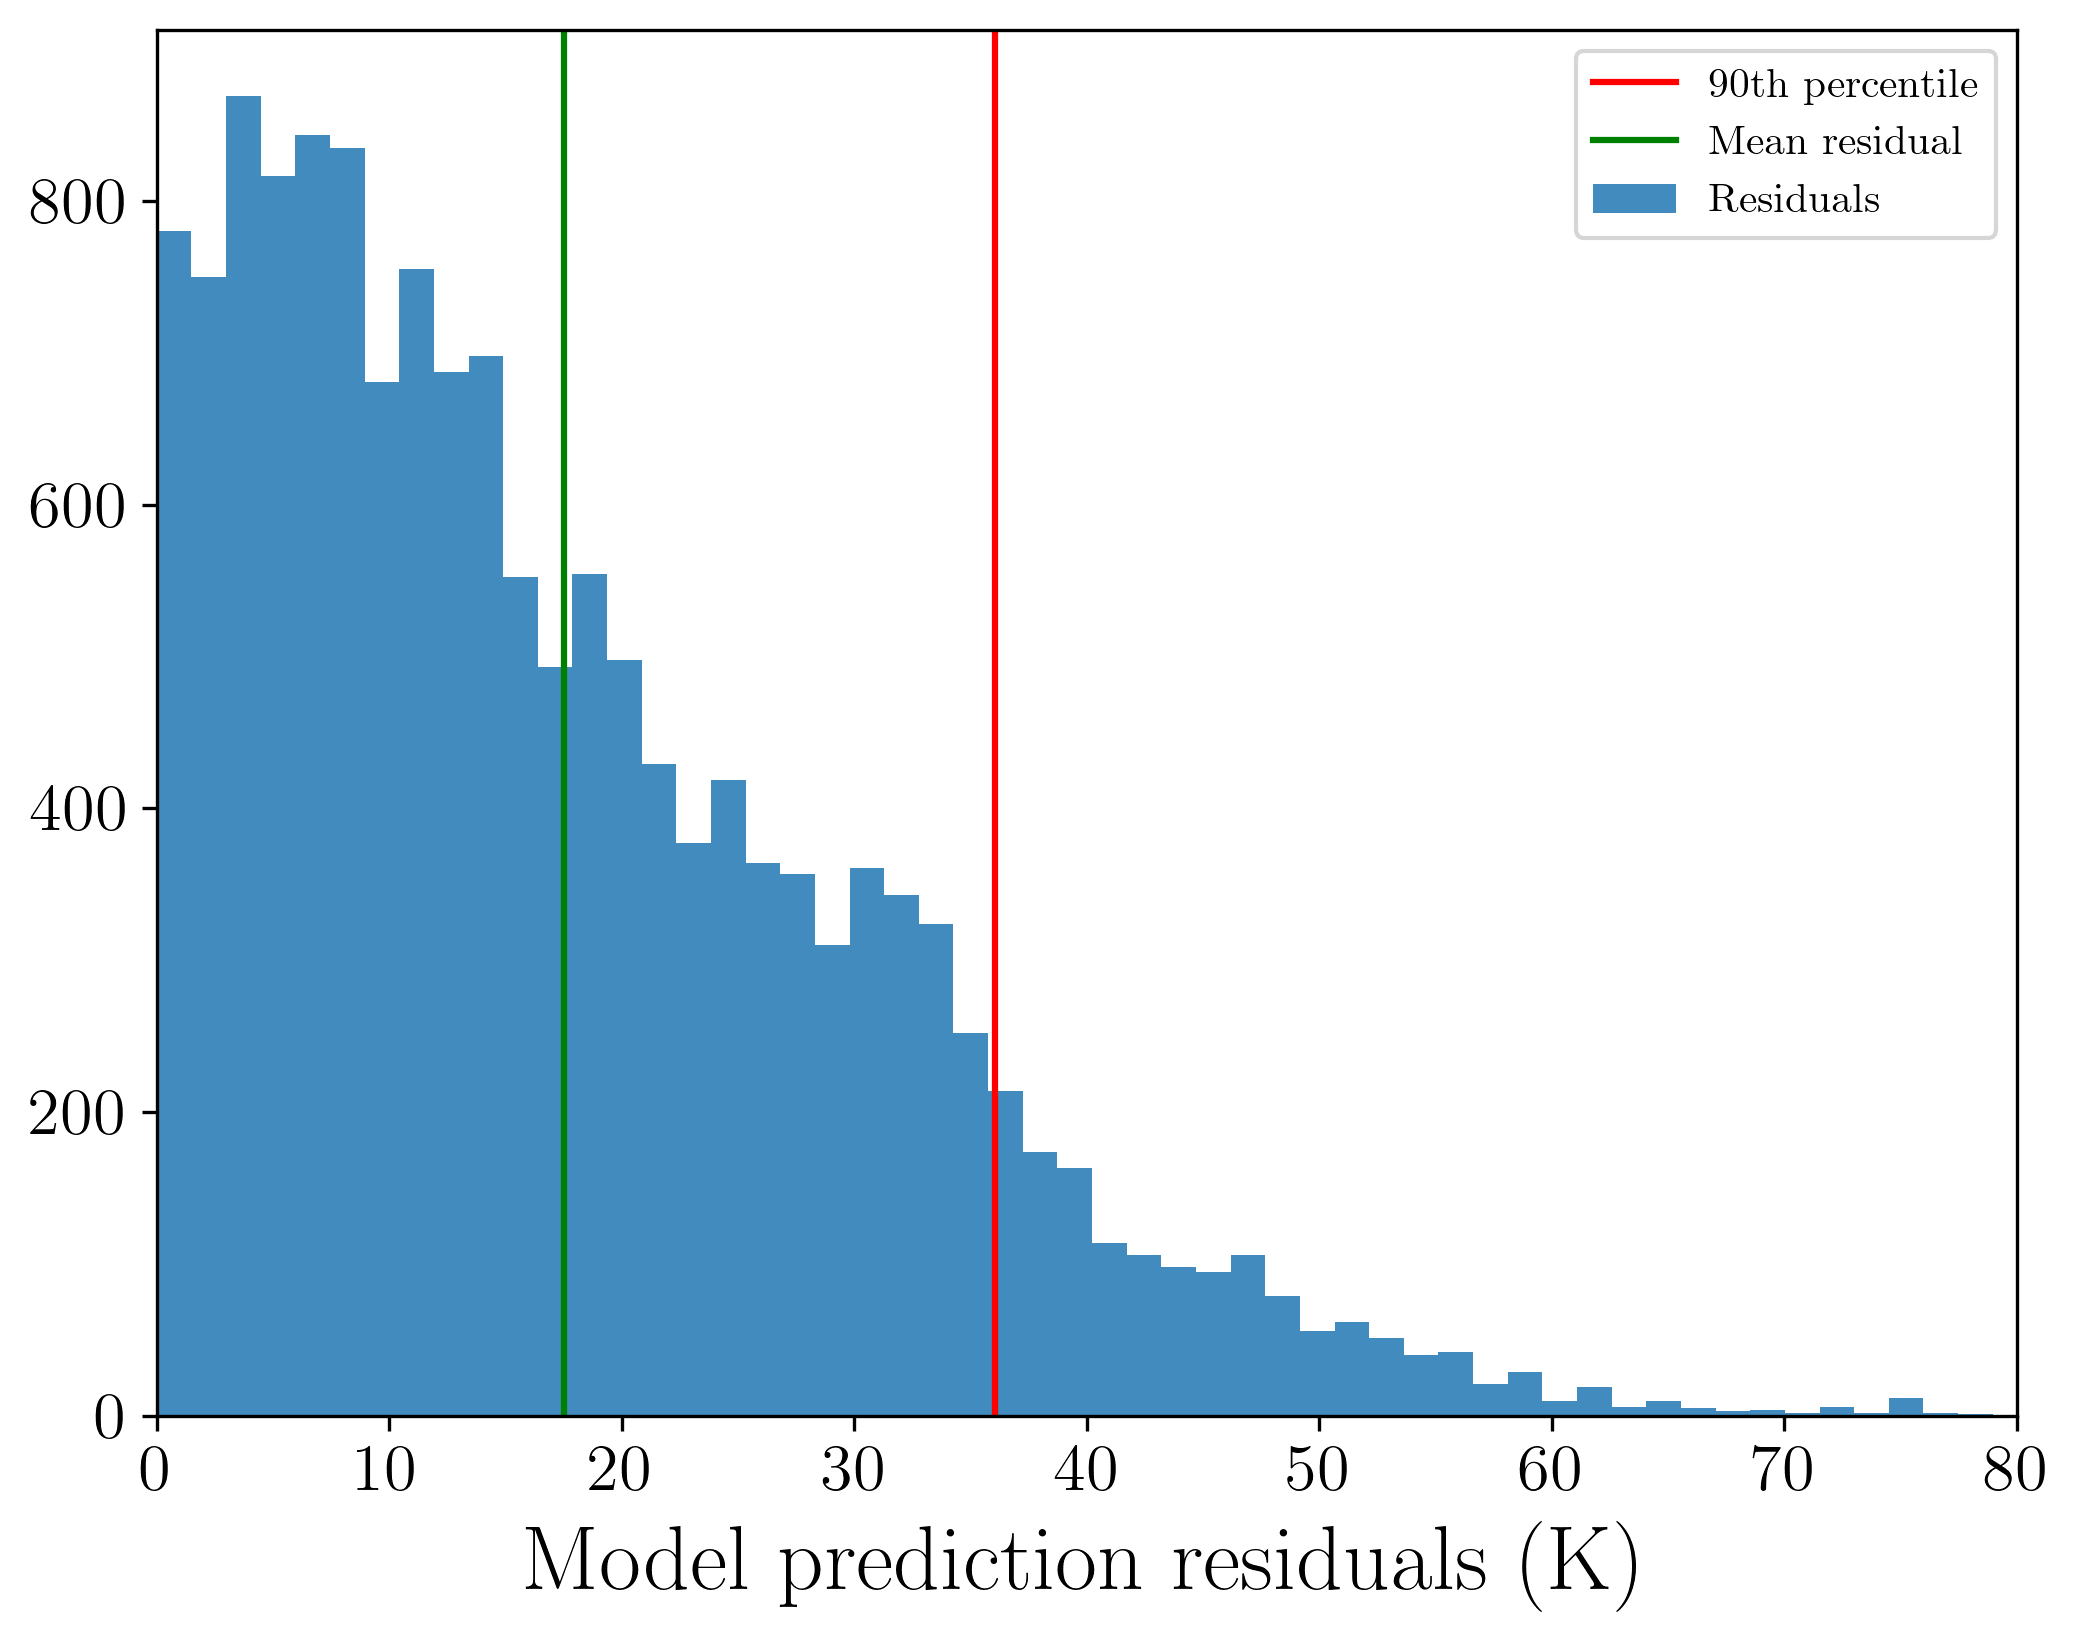

0.5863854680920784


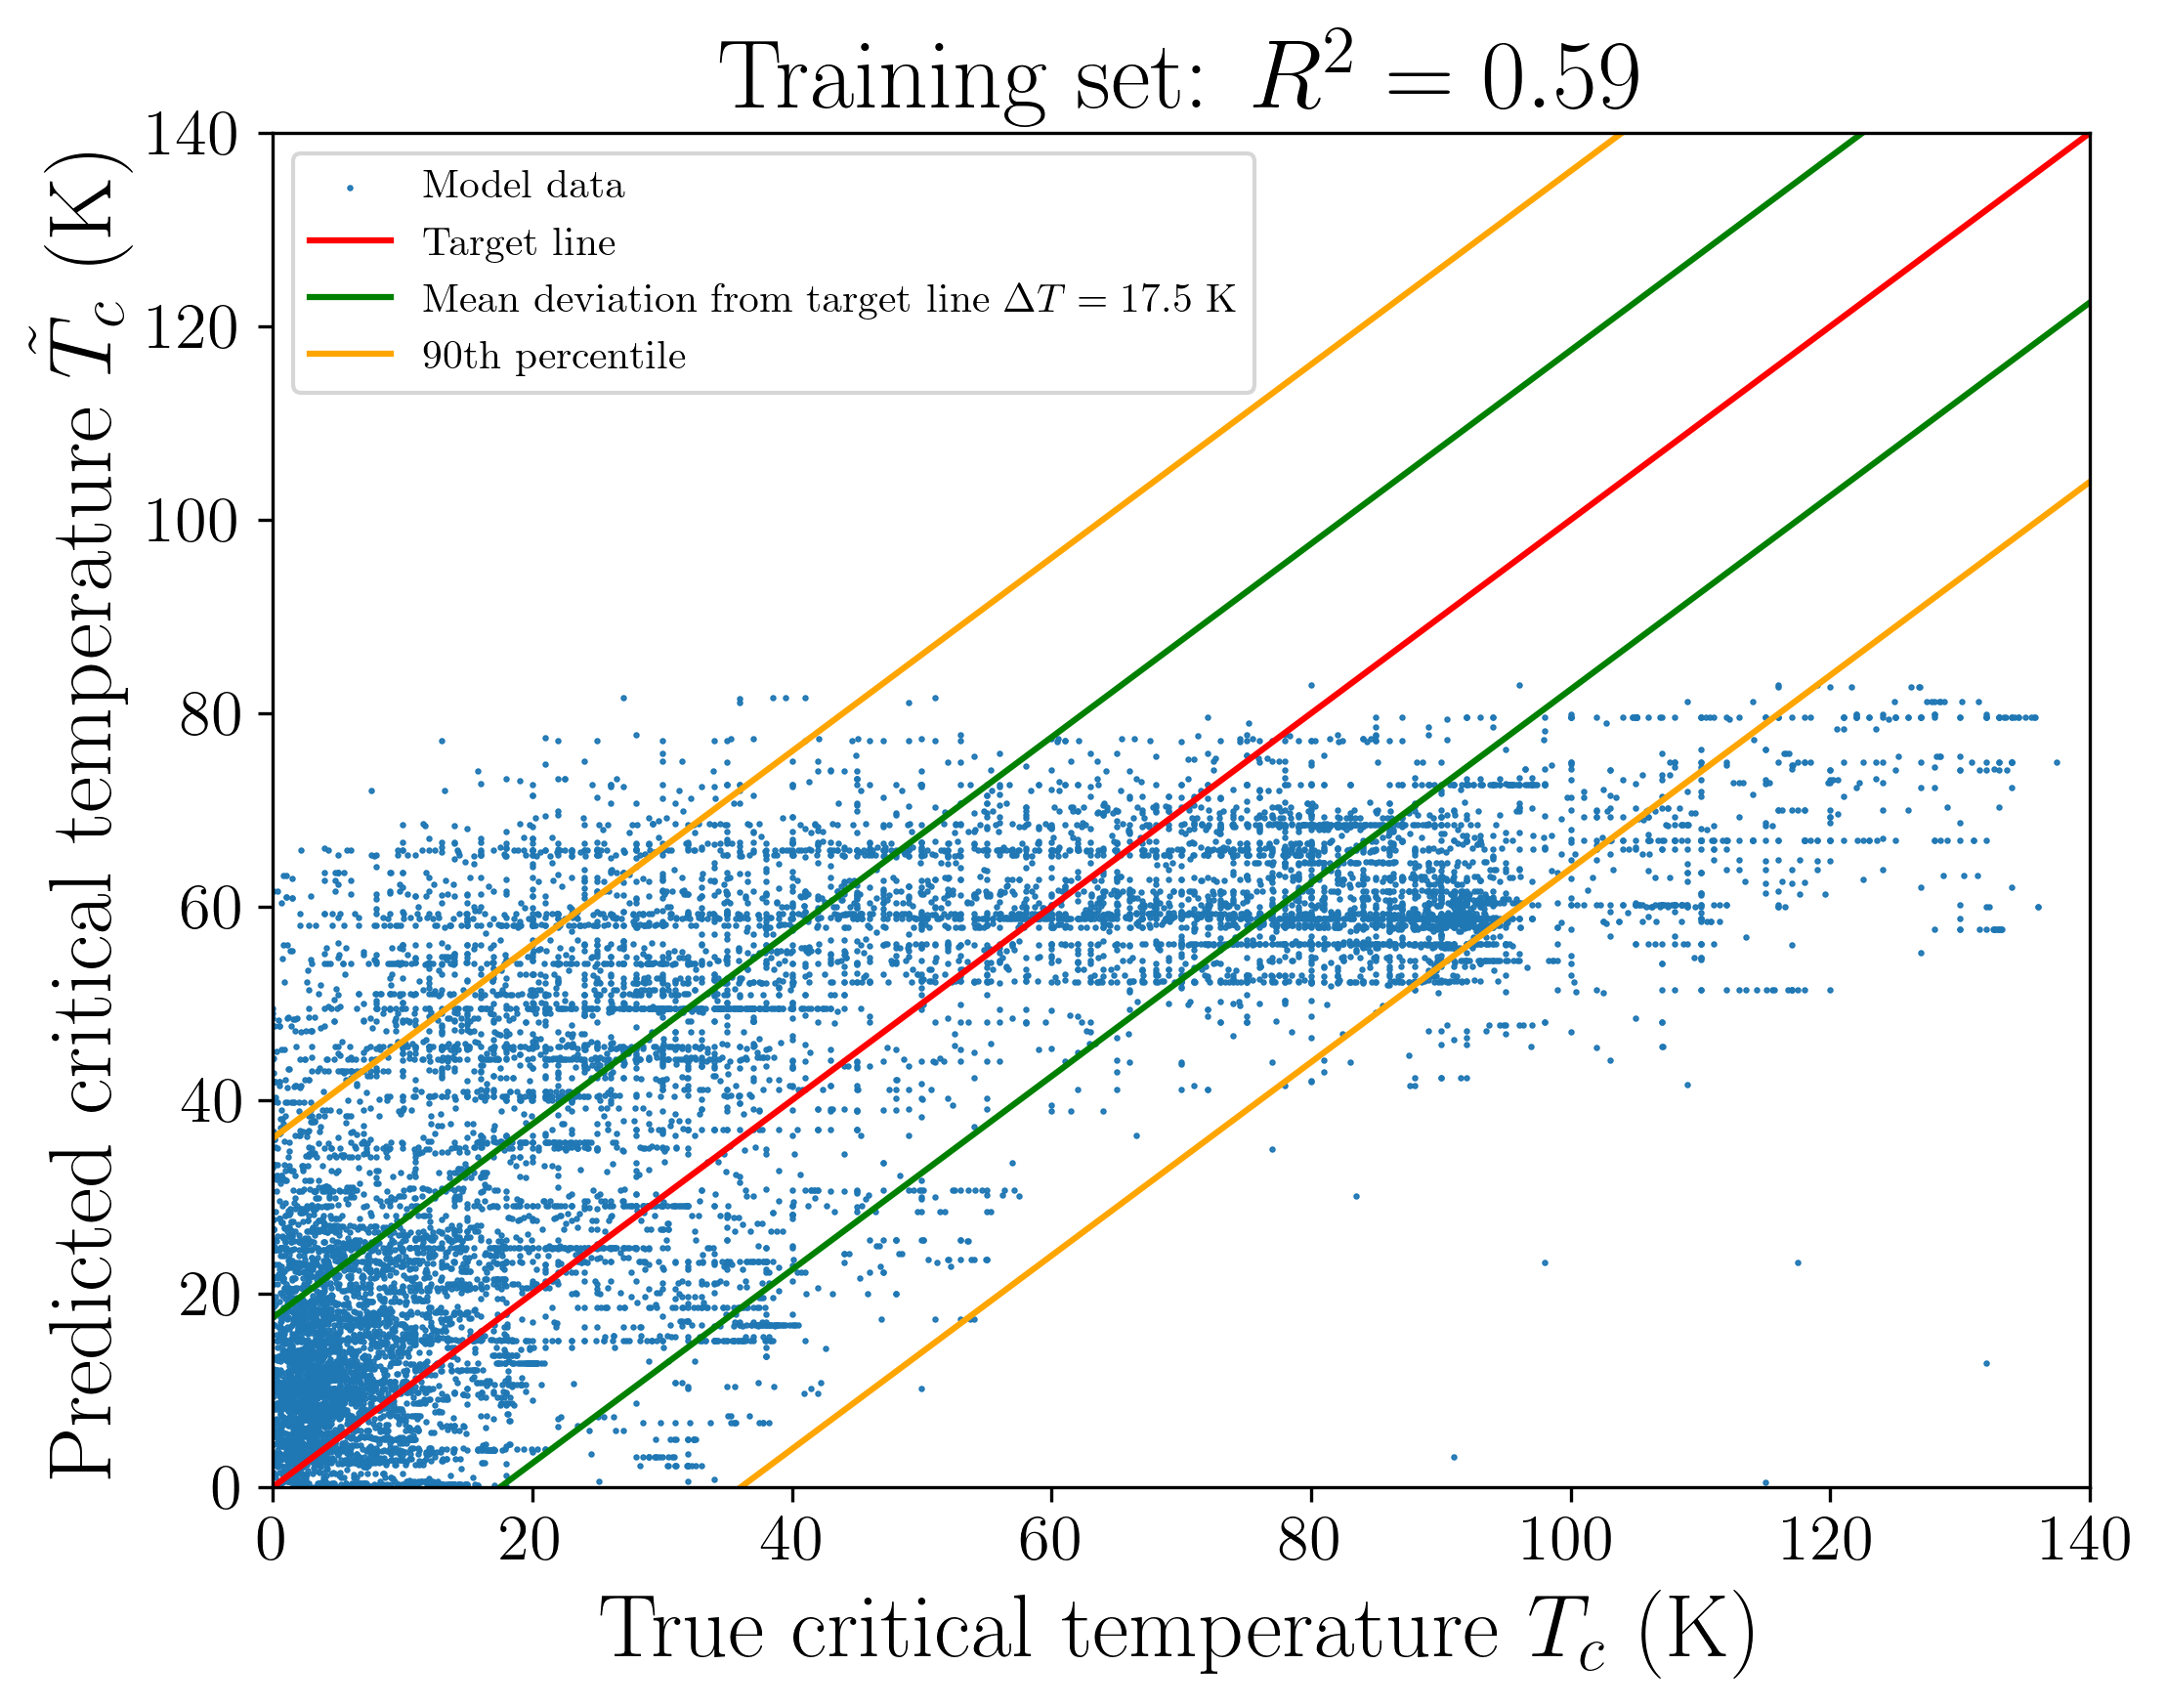

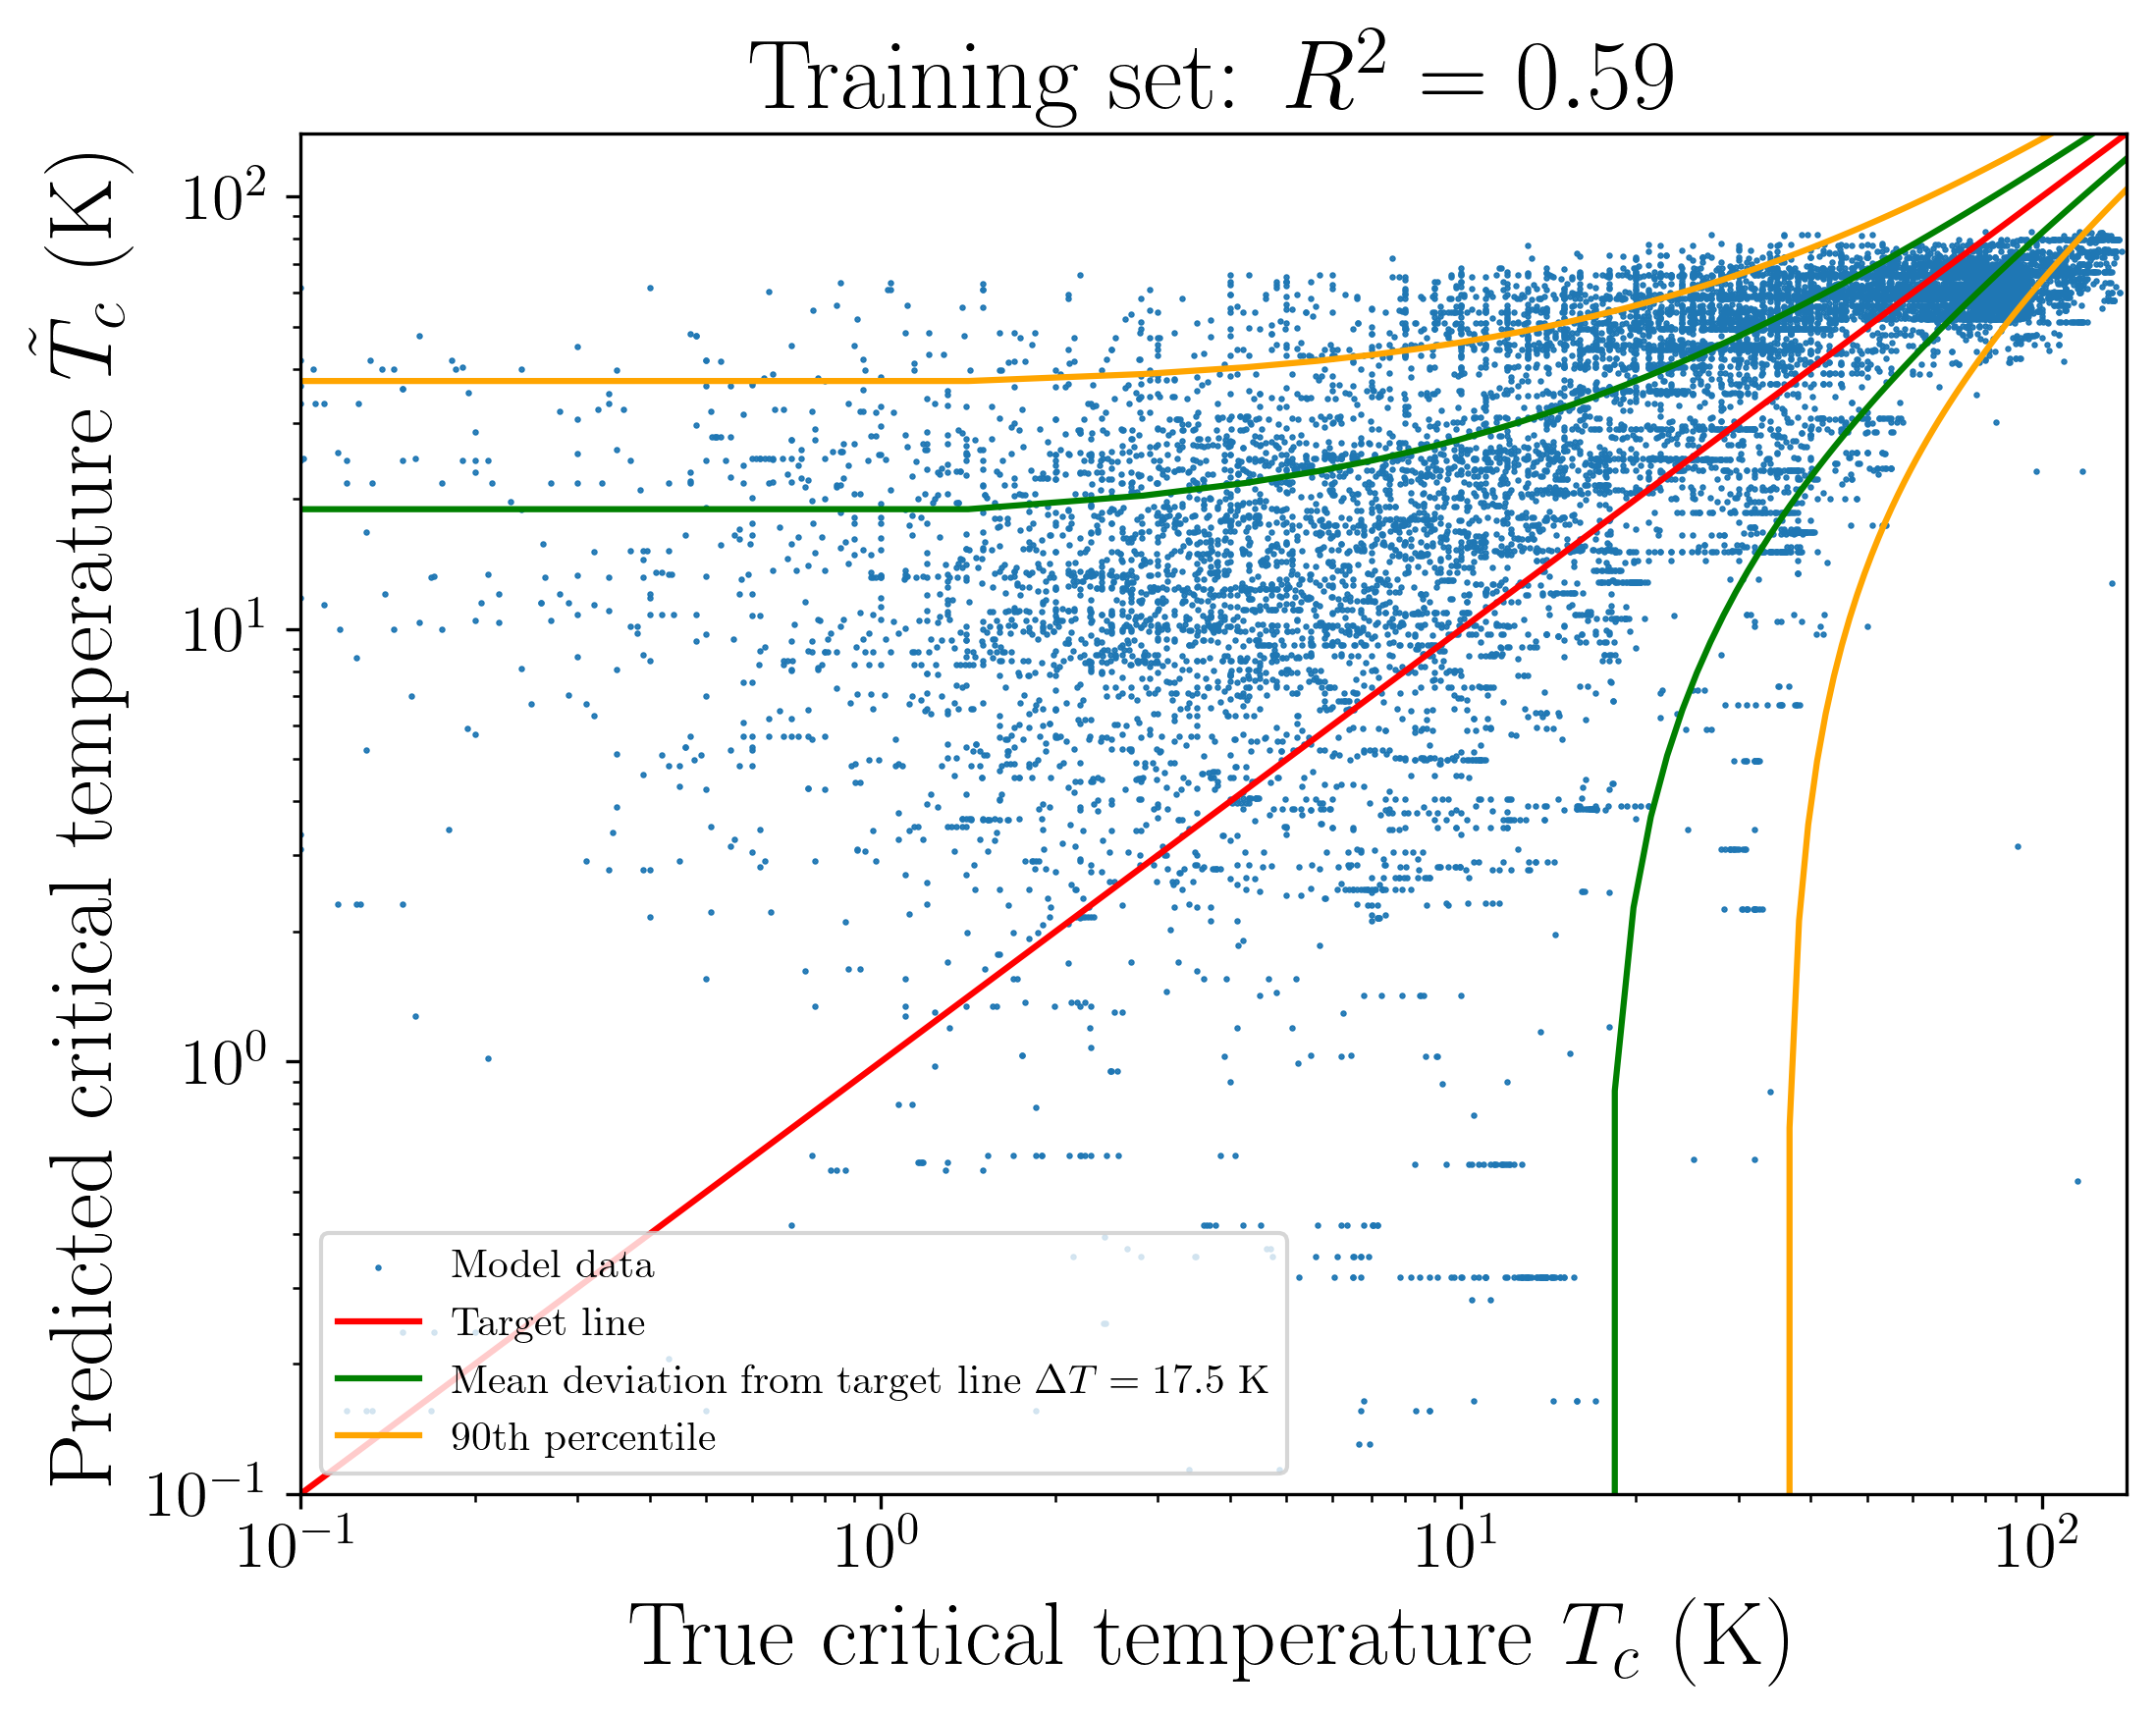

In [37]:
y_pred = linear_model.predict(x_train_scaled)

err = np.abs(y_pred.flatten() - y_train.flatten())
meanerr = np.mean(err)
perc_val = np.percentile(err, 90)
plot_residuals(err, 90, "linreg_res_training")

r2 = r2_score(y_train, y_pred)
print(r2)
plot_prediction(y_train, y_pred, meanerr, r2, val=False, log=False, fname="linreg_training", perc=90, perc_val=perc_val)
plot_prediction(y_train, y_pred, meanerr, r2, val=False, log=True, fname="linreg_training_log", perc=90, perc_val=perc_val)

# Keras tuner

In [29]:
def model_builder(hp, opt=True):
    model = tf.keras.Sequential()

    if opt:
        hp_neurons = hp.Int("neurons", min_value=32, max_value=512)
        hp_layers = hp.Int("layers", min_value=1, max_value=5)
        hp_eta = hp.Float("eta", min_value=1e-6, max_value=5e-3)
    else:
        hp_neurons = hp[0]
        hp_layers = hp[1]
        hp_eta = hp[2]

    model.add(tf.keras.layers.Dense(hp_neurons, activation=tf.nn.relu, input_shape=(17,)))
    for i in range(hp_layers):
        model.add(tf.keras.layers.Dense(hp_neurons, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1,))

    opt = tf.keras.optimizers.SGD(learning_rate=hp_eta)
    model.compile(loss='mean_squared_error', optimizer=opt, )

    return model

In [27]:
tuner = kt.BayesianOptimization(model_builder,
                     objective='val_loss',
                     max_trials = 100,
                     directory='tuner_test',
                     project_name='kt_test',
                     max_consecutive_failed_trials=100,            
                     overwrite=True)

In [28]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

tuner.search(x_train_scaled, y_train, epochs=40, validation_split=0.2, callbacks=[stop_early])



Trial 100 Complete [00h 00m 16s]
val_loss: nan

Best val_loss So Far: 196.24227905273438
Total elapsed time: 00h 36m 33s


In [32]:
best_model=tuner.get_best_models()[0]
best_model.summary()
tuner.results_summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               2250      
                                                                 
 dense_1 (Dense)             (None, 125)               15750     
                                                                 
 dense_2 (Dense)             (None, 125)               15750     
                                                                 
 dense_3 (Dense)             (None, 125)               15750     
                                                                 
 dense_4 (Dense)             (None, 1)                 126       
                                                                 
Total params: 49626 (193.85 KB)
Trainable params: 49626 (193.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Results summary
Re

In [30]:
best_params_model = model_builder([125, 3, 1e-4], opt=False)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history = best_params_model.fit(x_train_scaled, y_train, epochs=200, batch_size=16, verbose=1, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/200
728/745 [============================>.] - ETA: 0s - loss: 539.2183
Epoch 1: val_loss improved from inf to 290.58286, saving model to best_model.h5
745/745 [==============================] - 2s 3ms/step - loss: 536.1614 - val_loss: 290.5829
Epoch 2/200
 38/745 [>.............................] - ETA: 2s - loss: 320.7203

/home/max/miniconda3/envs/ML1/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


724/745 [============================>.] - ETA: 0s - loss: 307.4814
Epoch 2: val_loss improved from 290.58286 to 255.19220, saving model to best_model.h5
745/745 [==============================] - 2s 3ms/step - loss: 306.5637 - val_loss: 255.1922
Epoch 3/200
737/745 [============================>.] - ETA: 0s - loss: 288.0875
Epoch 3: val_loss improved from 255.19220 to 249.52815, saving model to best_model.h5
745/745 [==============================] - 2s 3ms/step - loss: 288.1895 - val_loss: 249.5282
Epoch 4/200
744/745 [============================>.] - ETA: 0s - loss: 273.0630
Epoch 4: val_loss did not improve from 249.52815
745/745 [==============================] - 2s 3ms/step - loss: 273.0541 - val_loss: 259.7122
Epoch 5/200
724/745 [============================>.] - ETA: 0s - loss: 260.1274
Epoch 5: val_loss did not improve from 249.52815
745/745 [==============================] - 2s 3ms/step - loss: 260.0618 - val_loss: 319.6951
Epoch 6/200
745/745 [=============================

# KerasTuner model performance

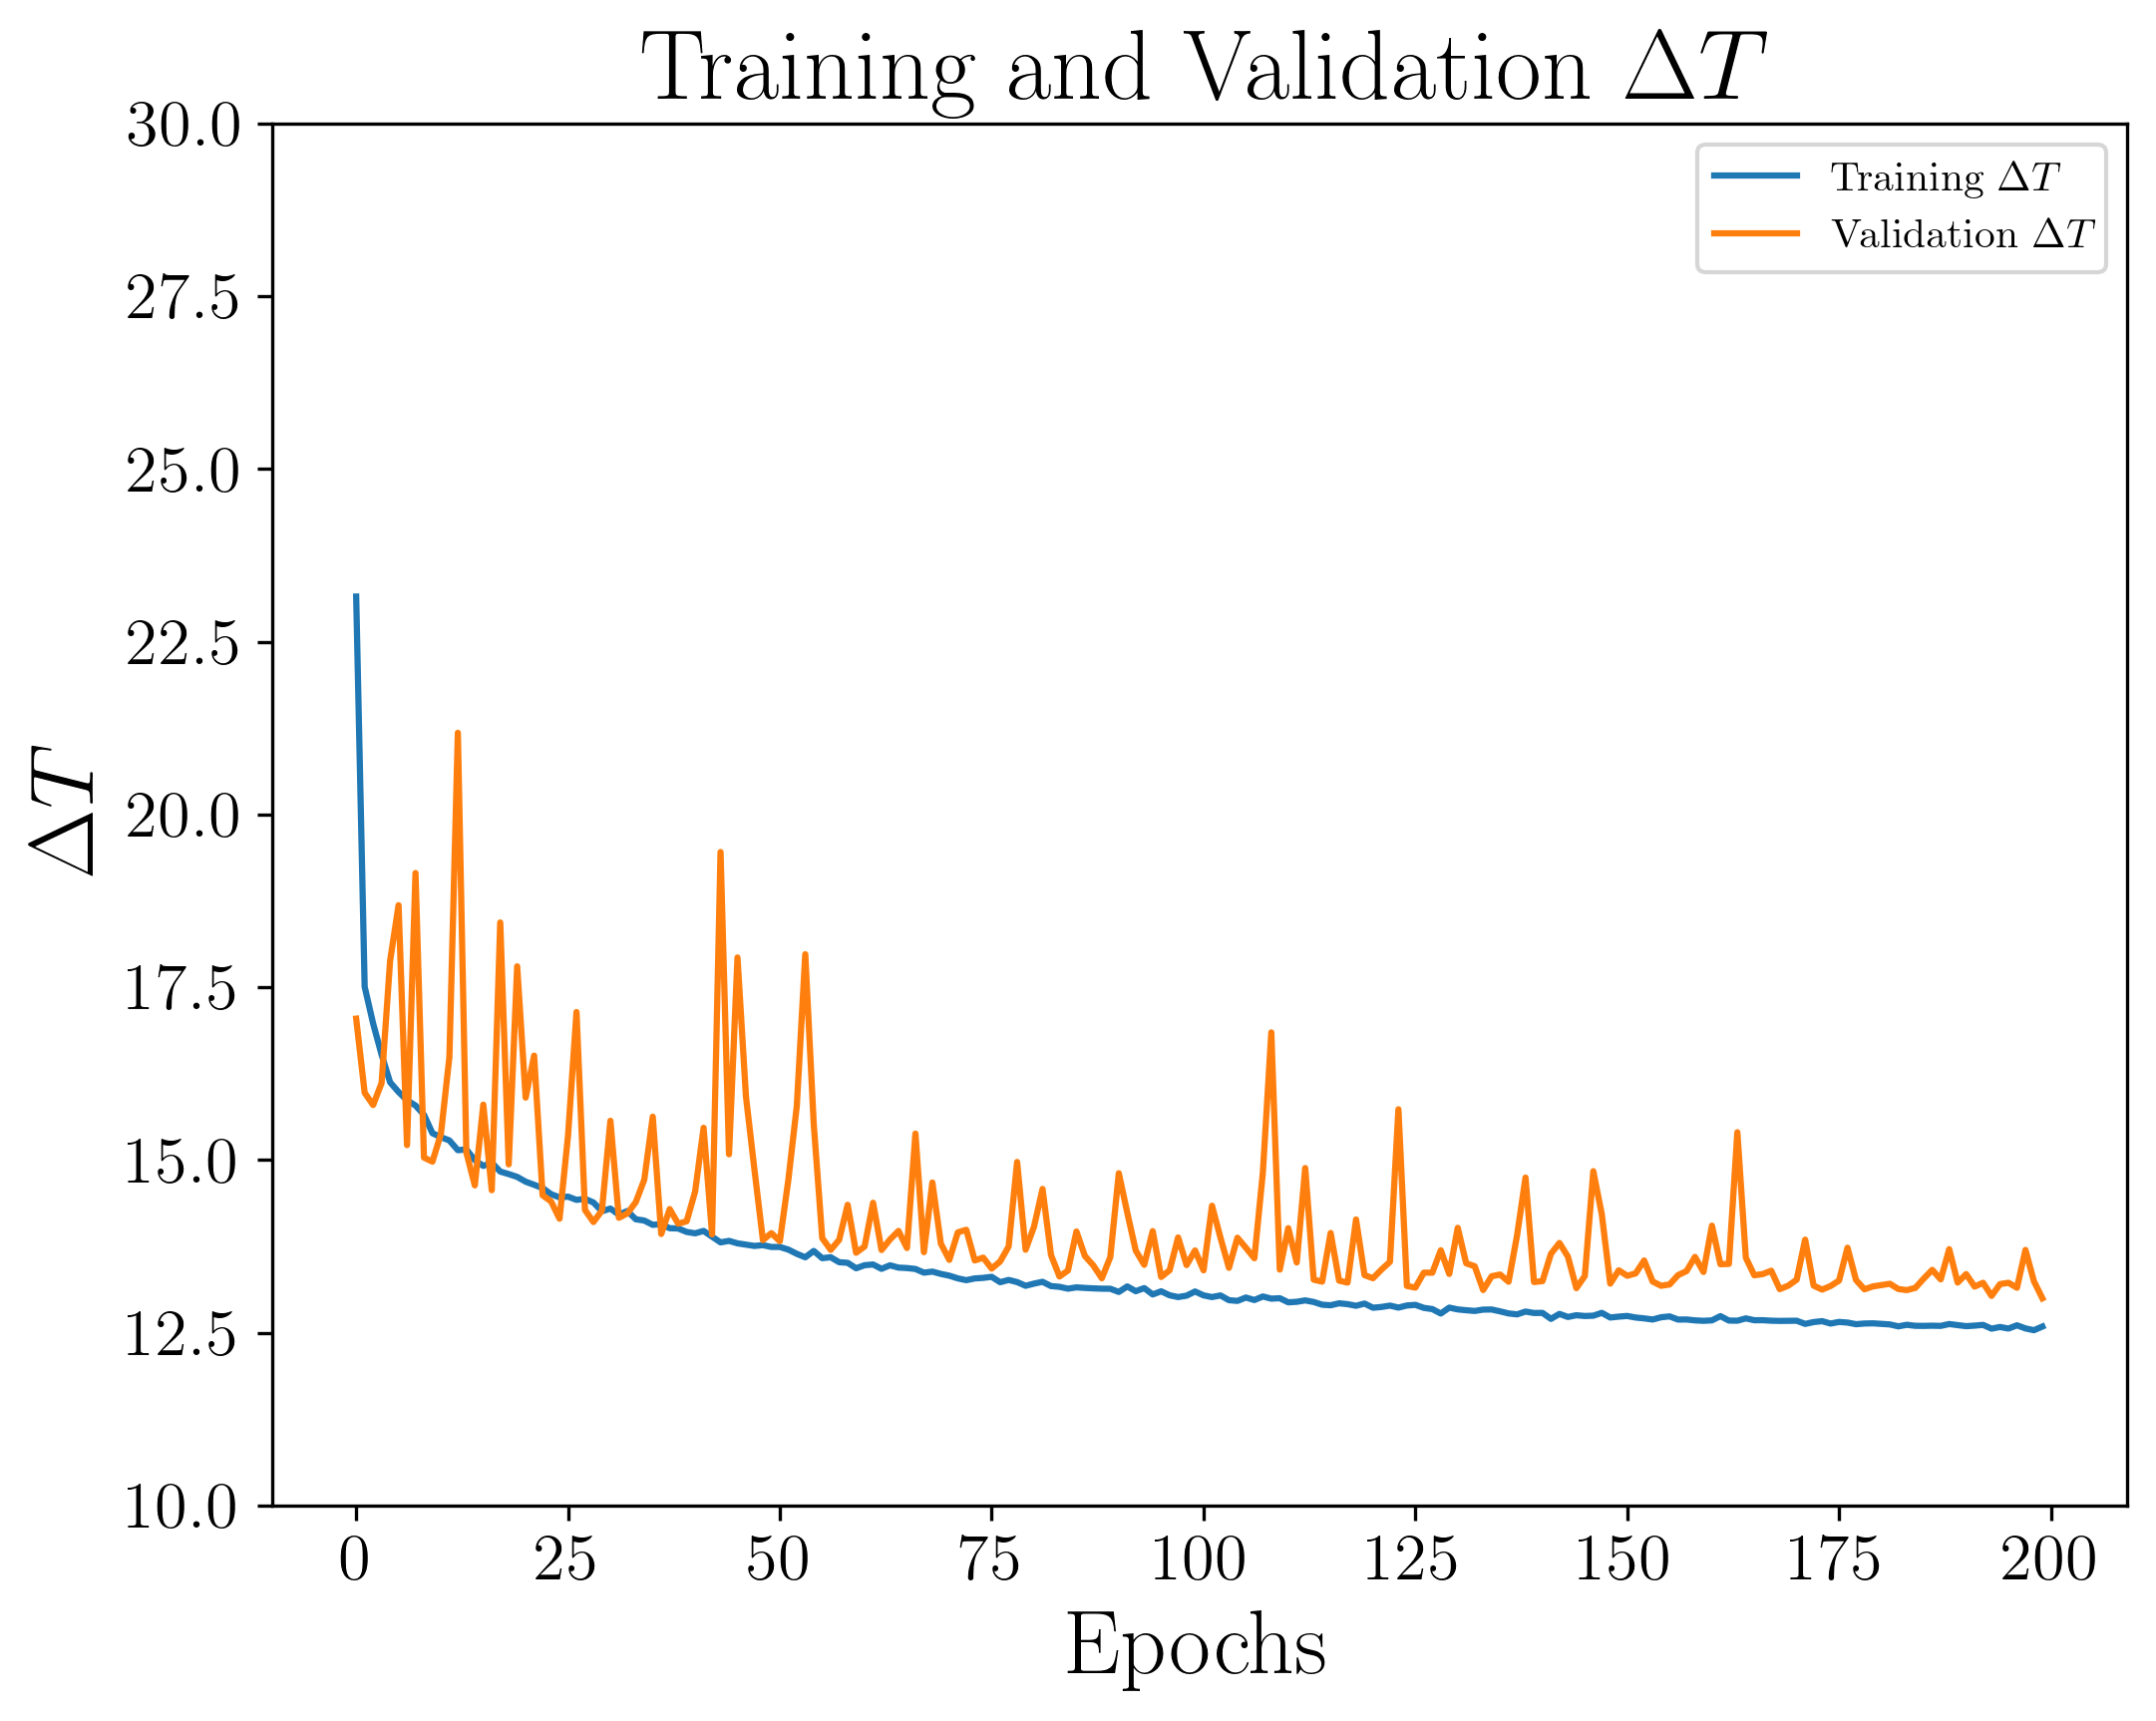

In [31]:
plot_history(history, "best_kt_model_history")

200/200 [==============================] - 0s 2ms/step - loss: 184.7170
13.591063065090156


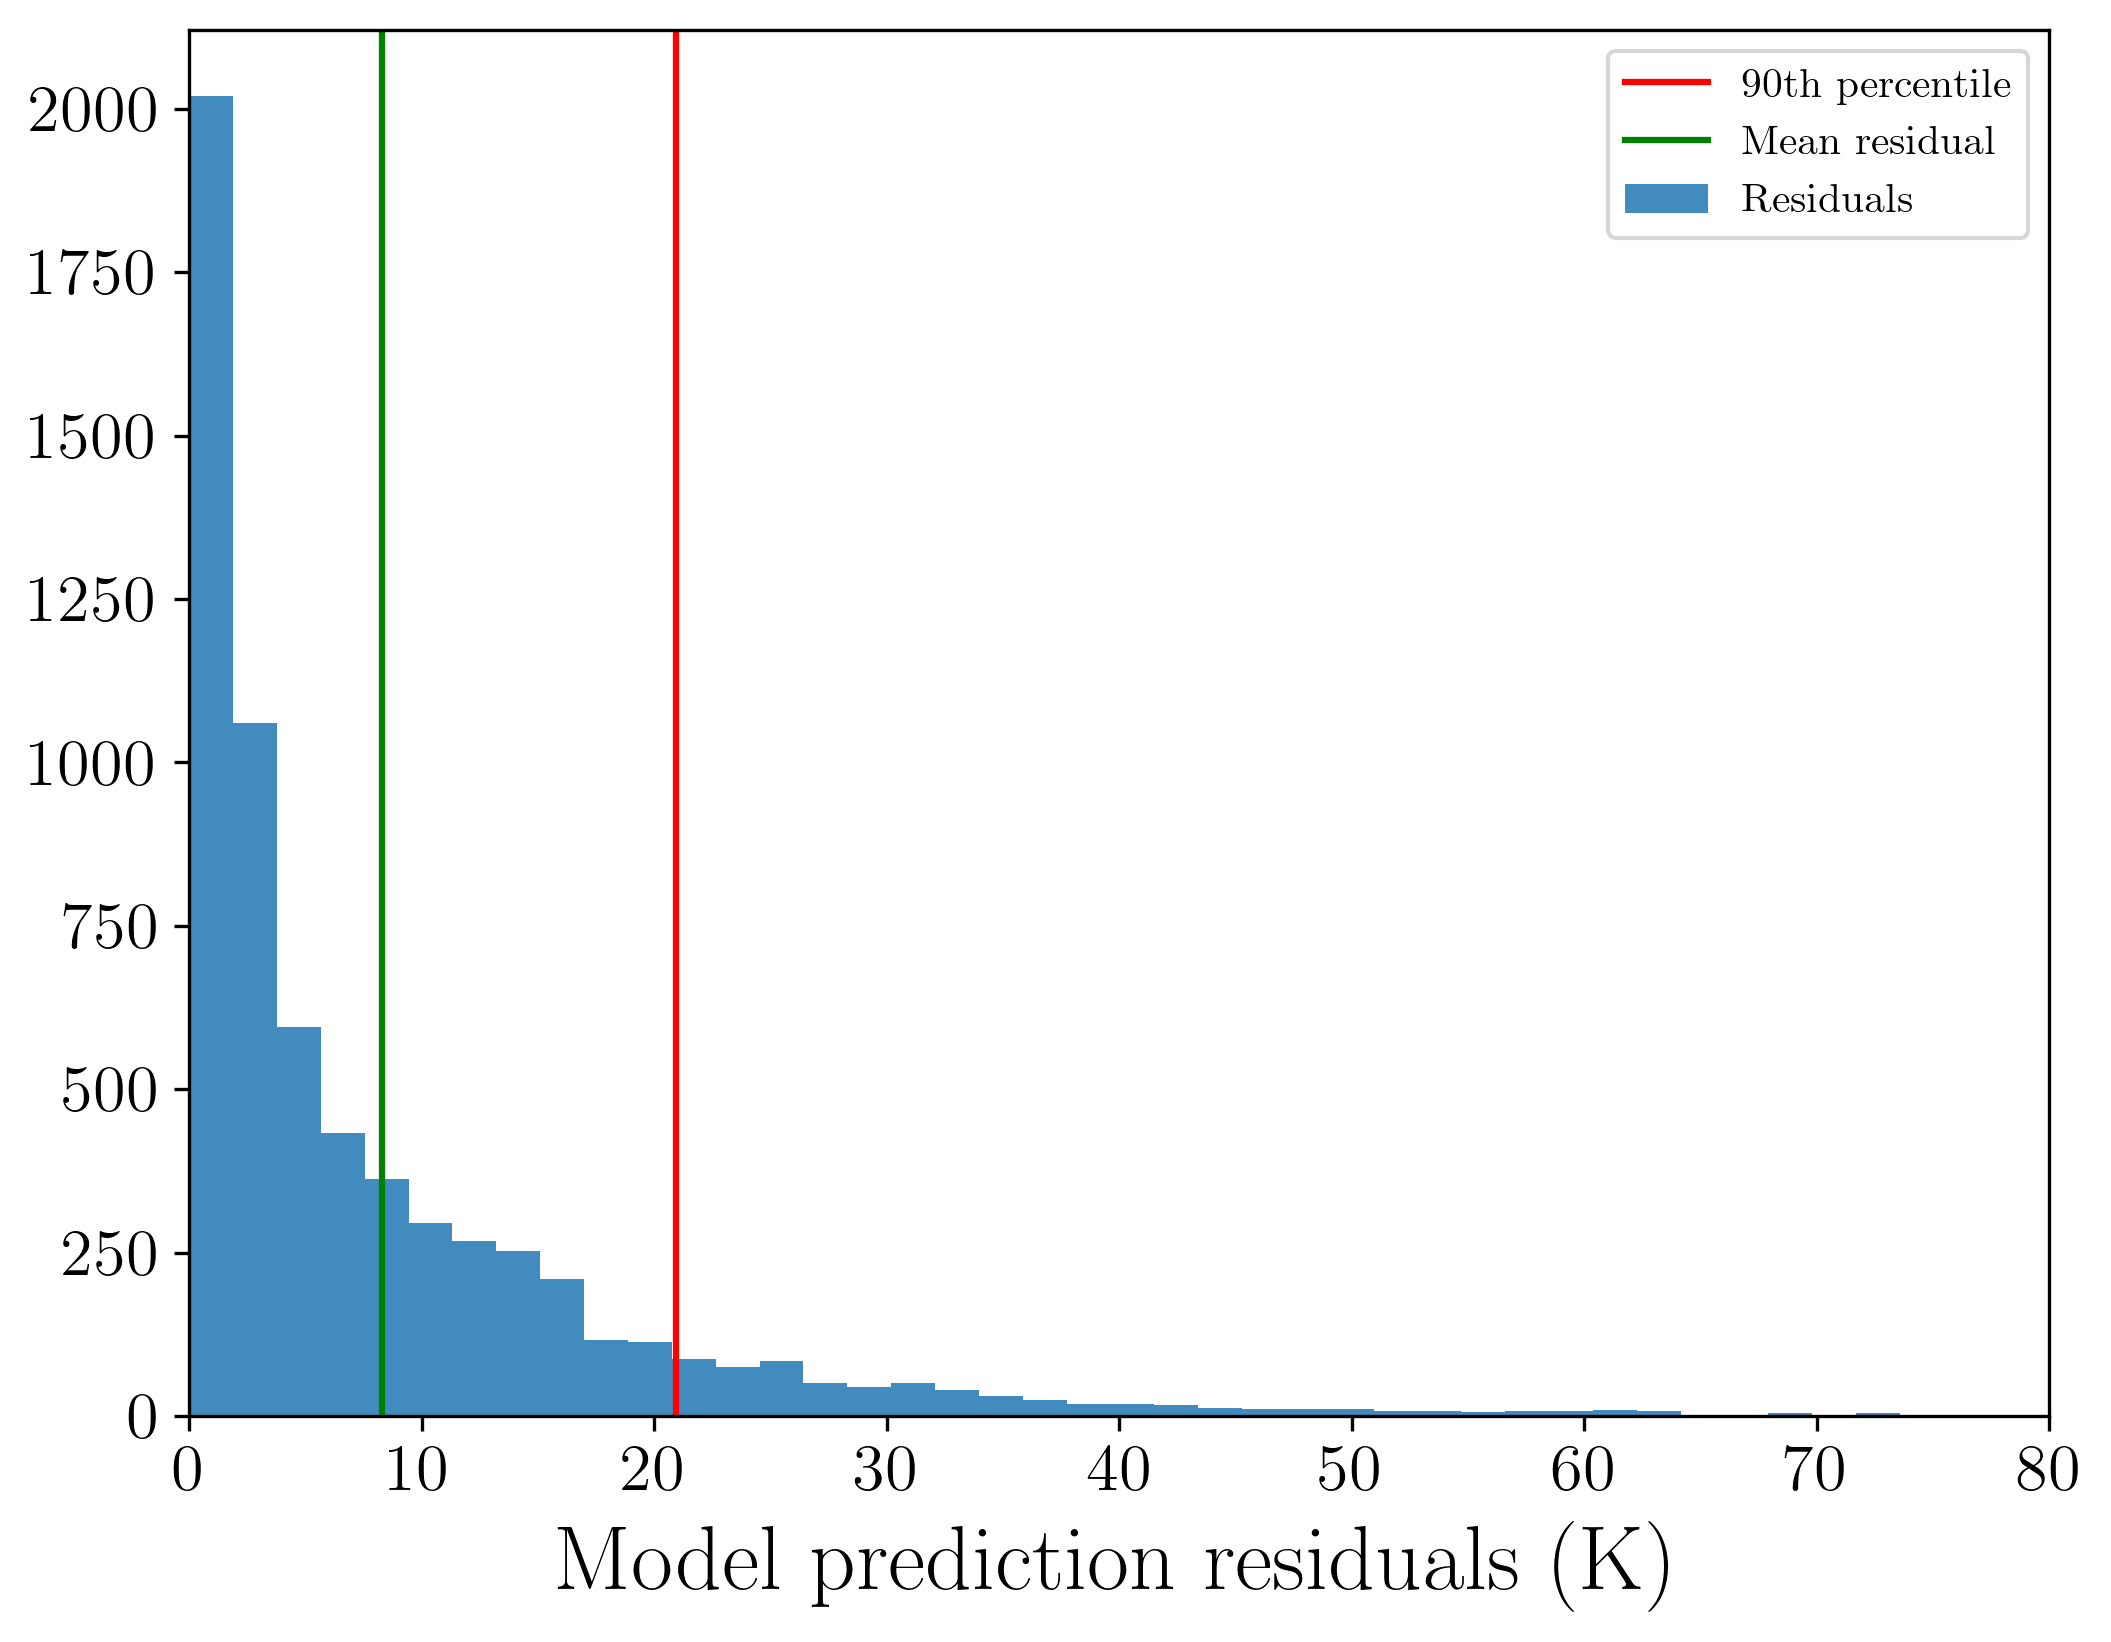

0.8405102532578662


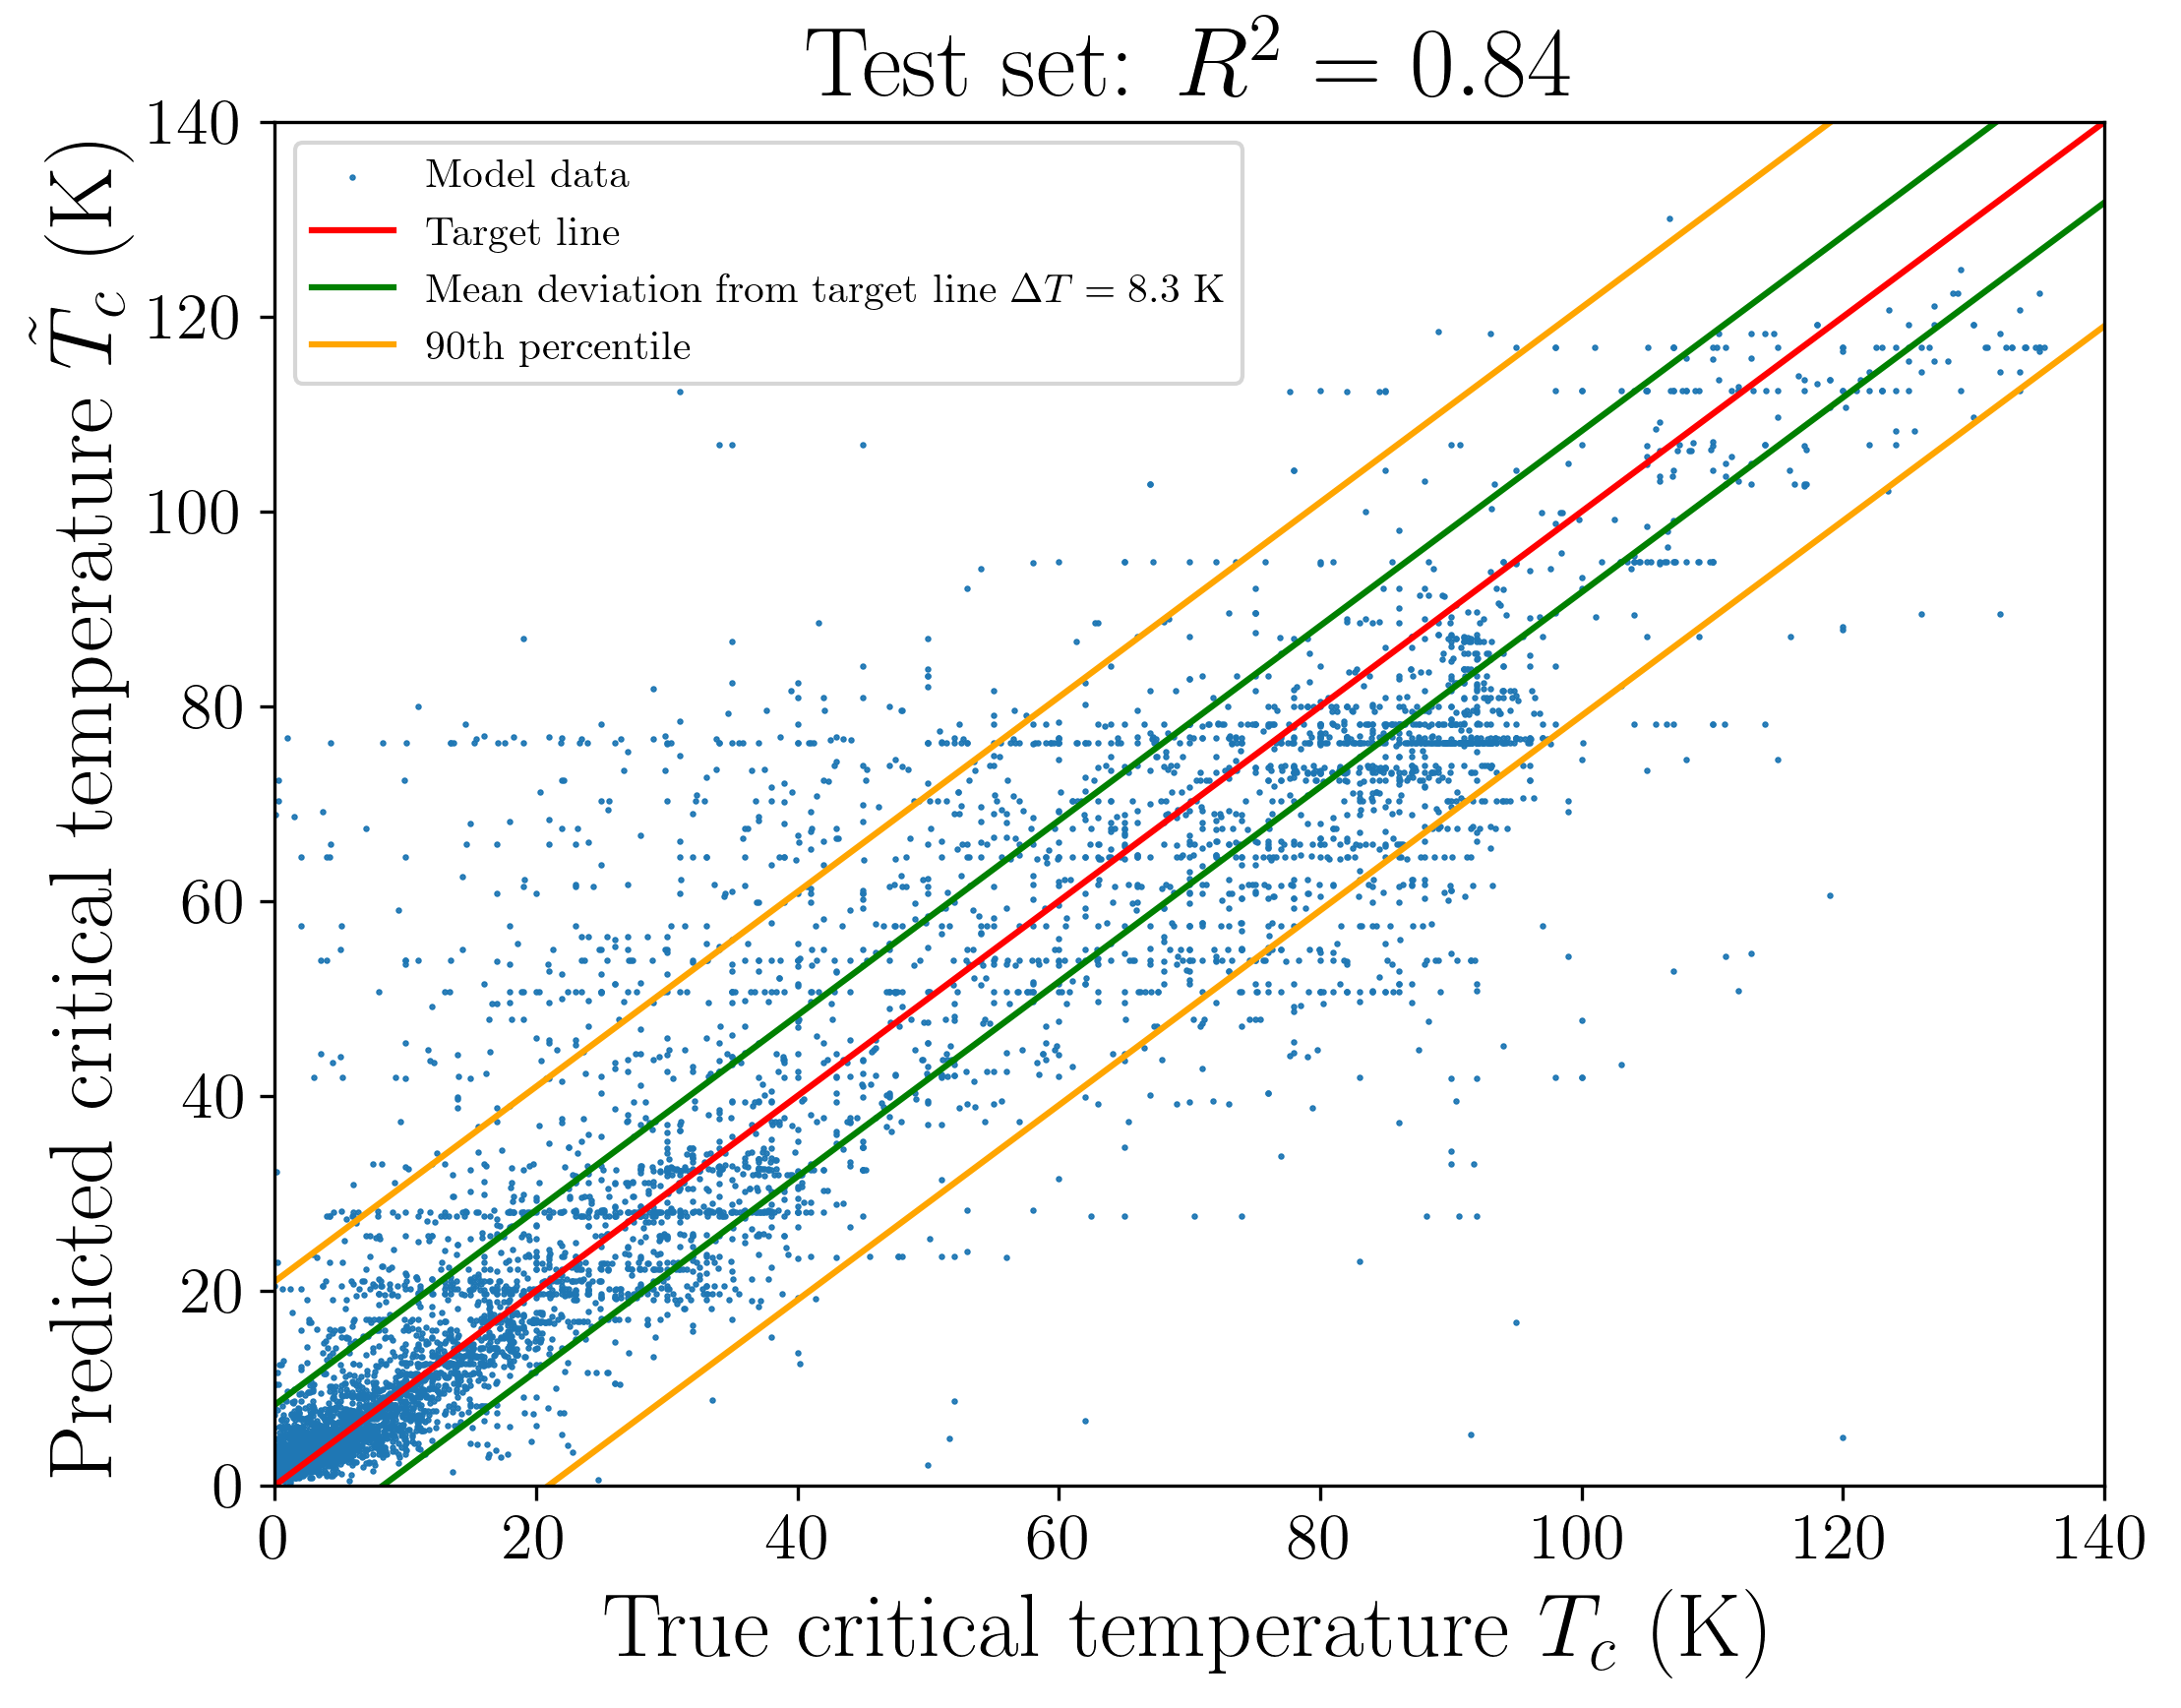

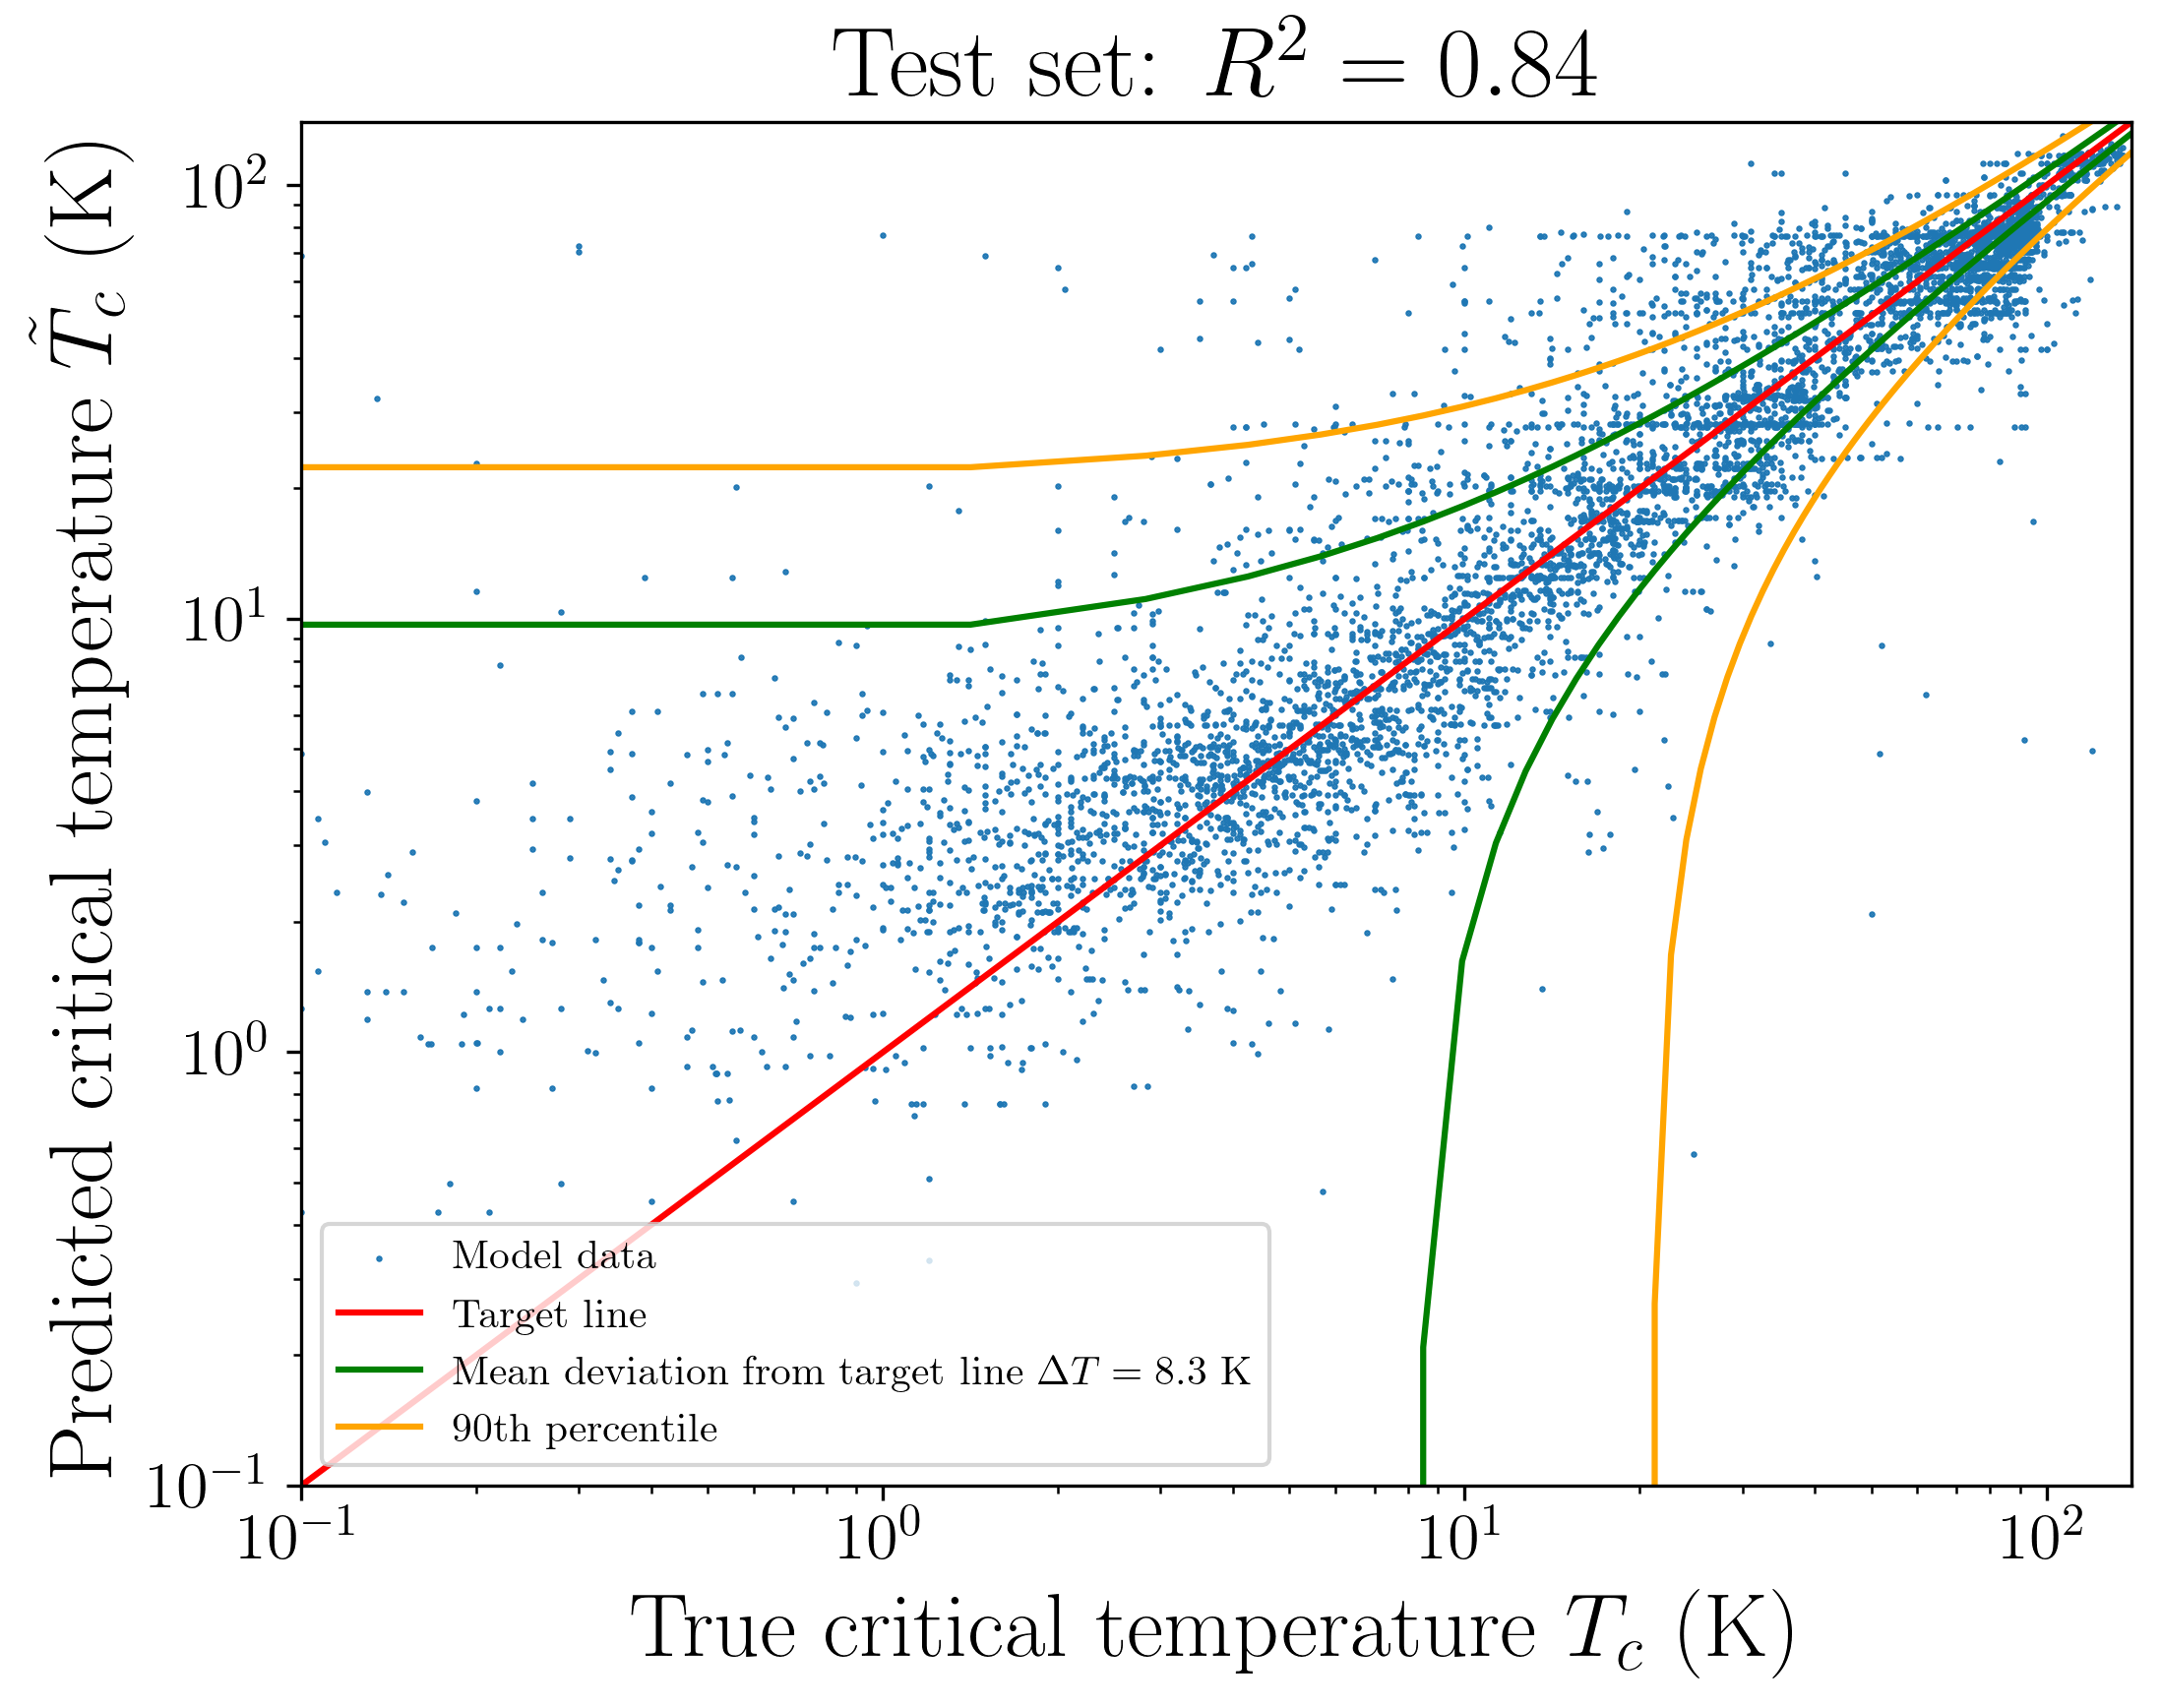

In [32]:
best_model = load_model('best_model.h5')
y_pred = best_model.predict(x_test_scaled)
f = f = np.sqrt(best_model.evaluate(x_test_scaled, y_test))
print(f)

err = np.abs(y_pred.flatten() - y_test.flatten())
meanerr = np.mean(err)
perc_val = np.percentile(err, 90)
plot_residuals(err, 90, "kt_res")

r2 = r2_score(y_test, y_pred)
print(r2)
plot_prediction(y_test, y_pred, meanerr, r2, val=True, log=False, fname="kt", perc=90, perc_val=perc_val)
plot_prediction(y_test, y_pred, meanerr, r2, val=True, log=True, fname="kt_log", perc=90, perc_val=perc_val)

466/466 [==============================] - 1s 1ms/step - loss: 153.7394
12.399168515784133
7.58363146084928 19.459250259399415


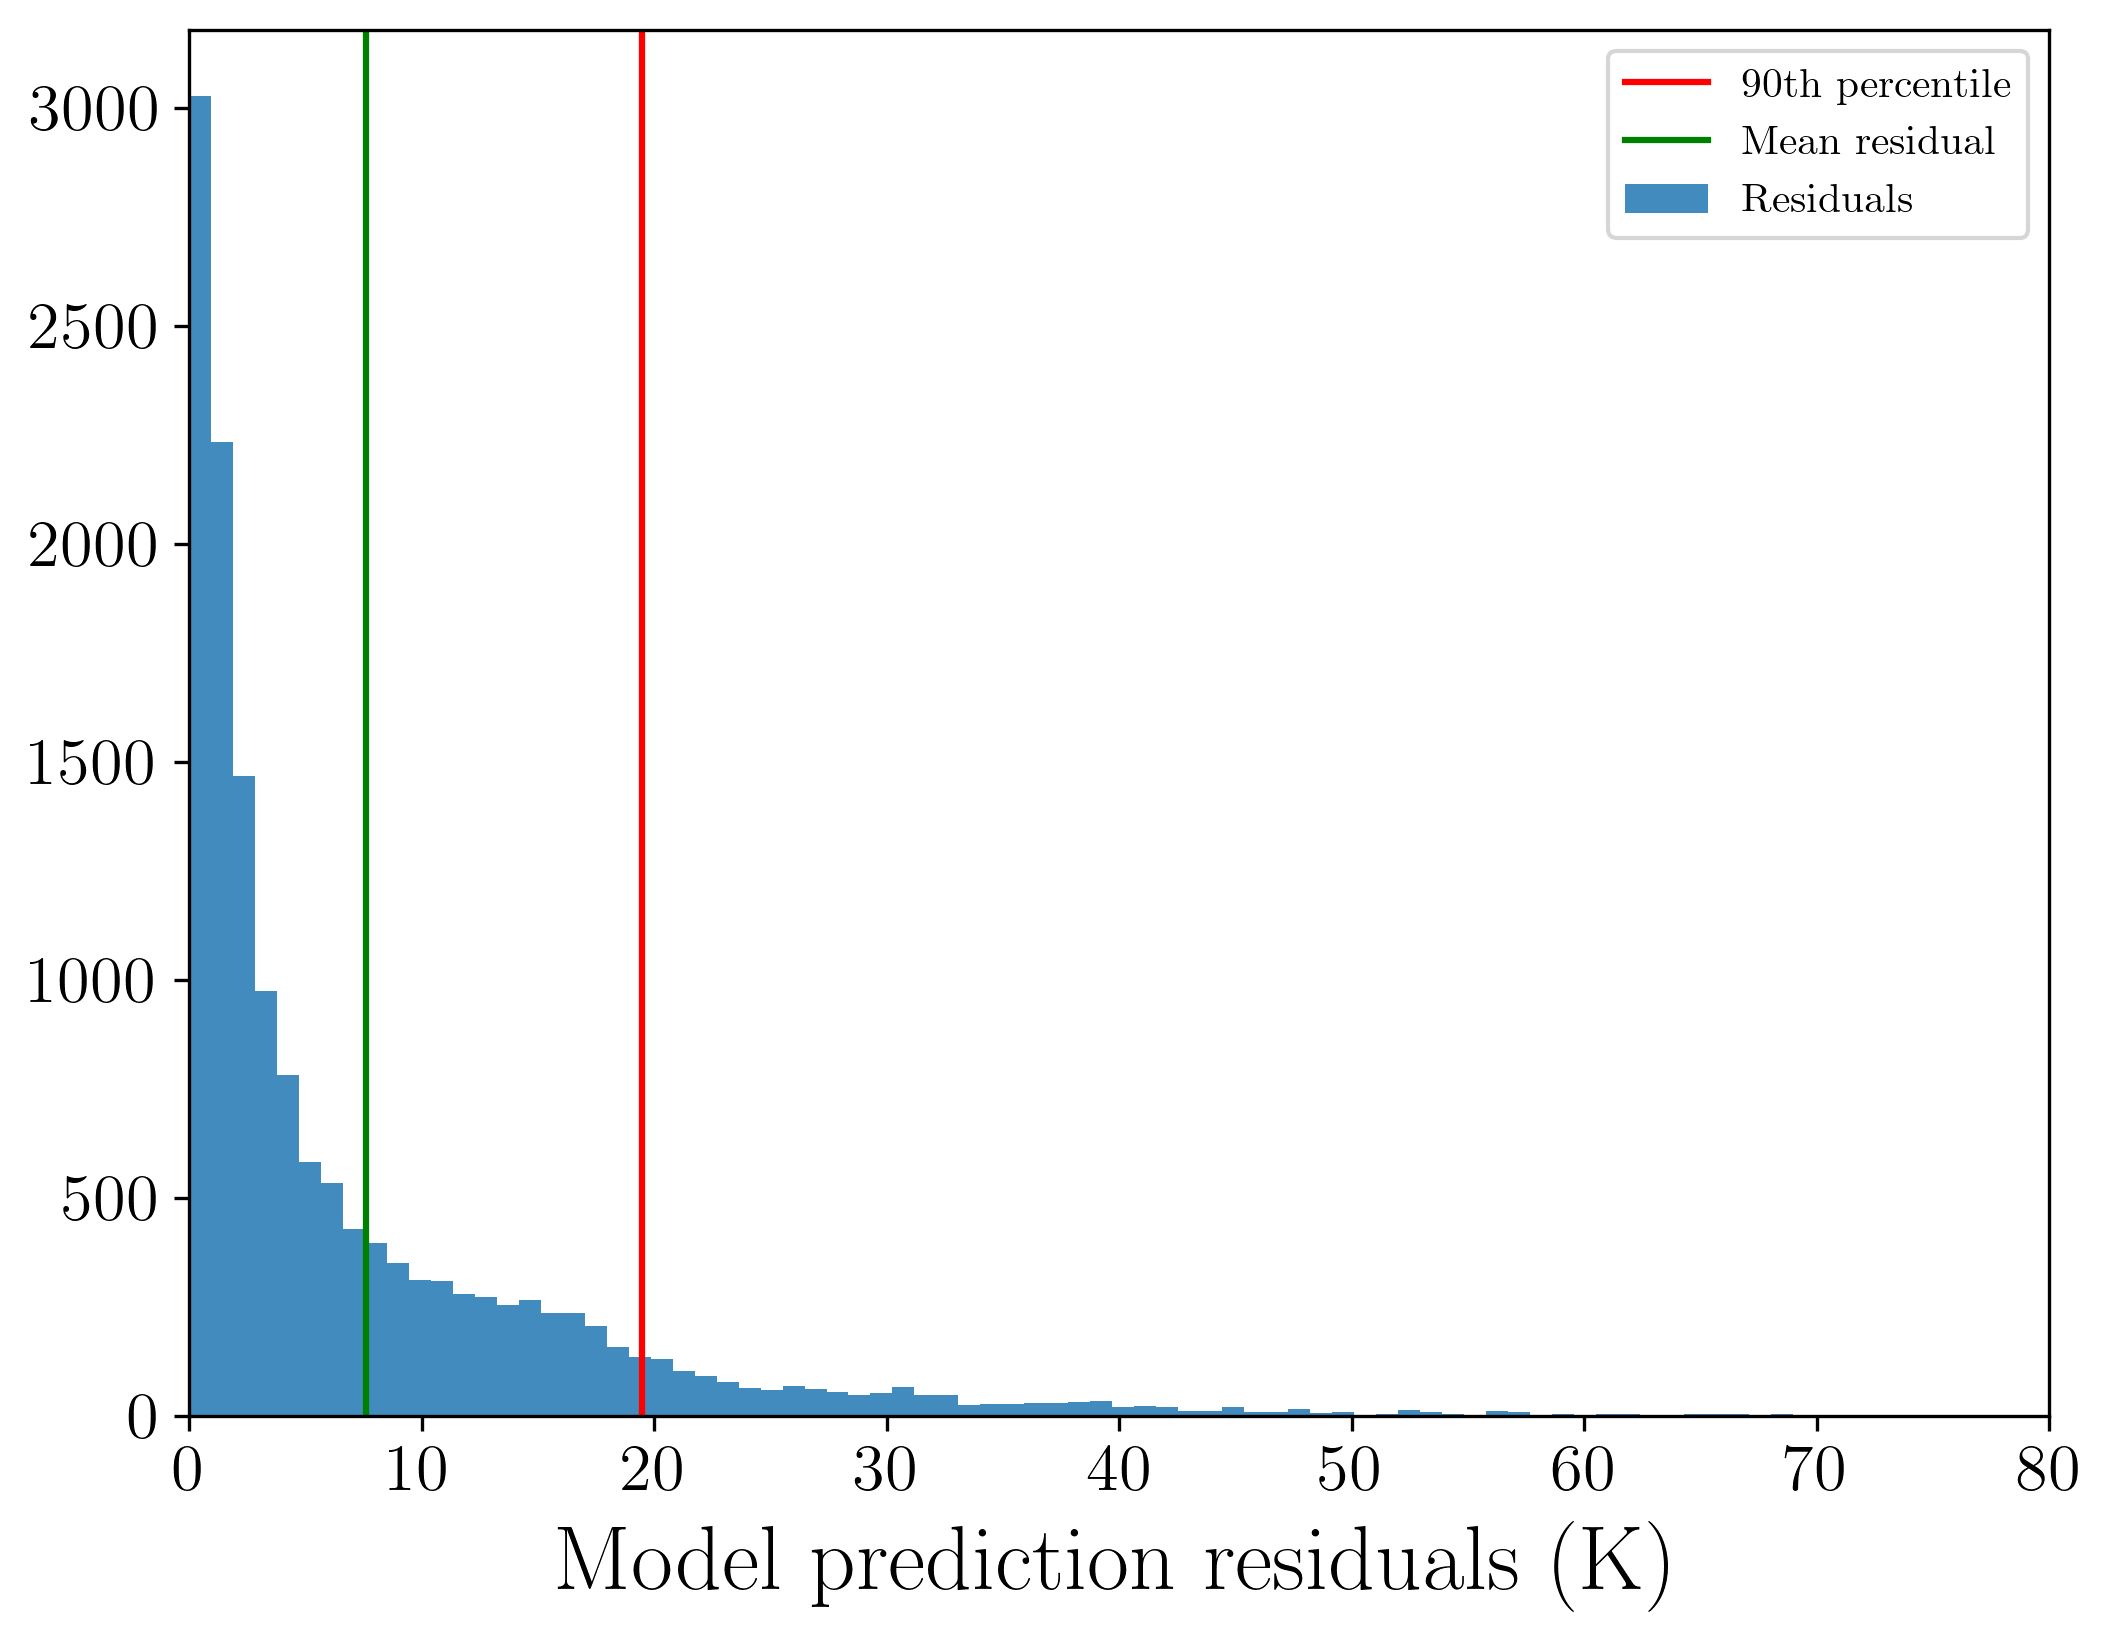

0.8696893184443721


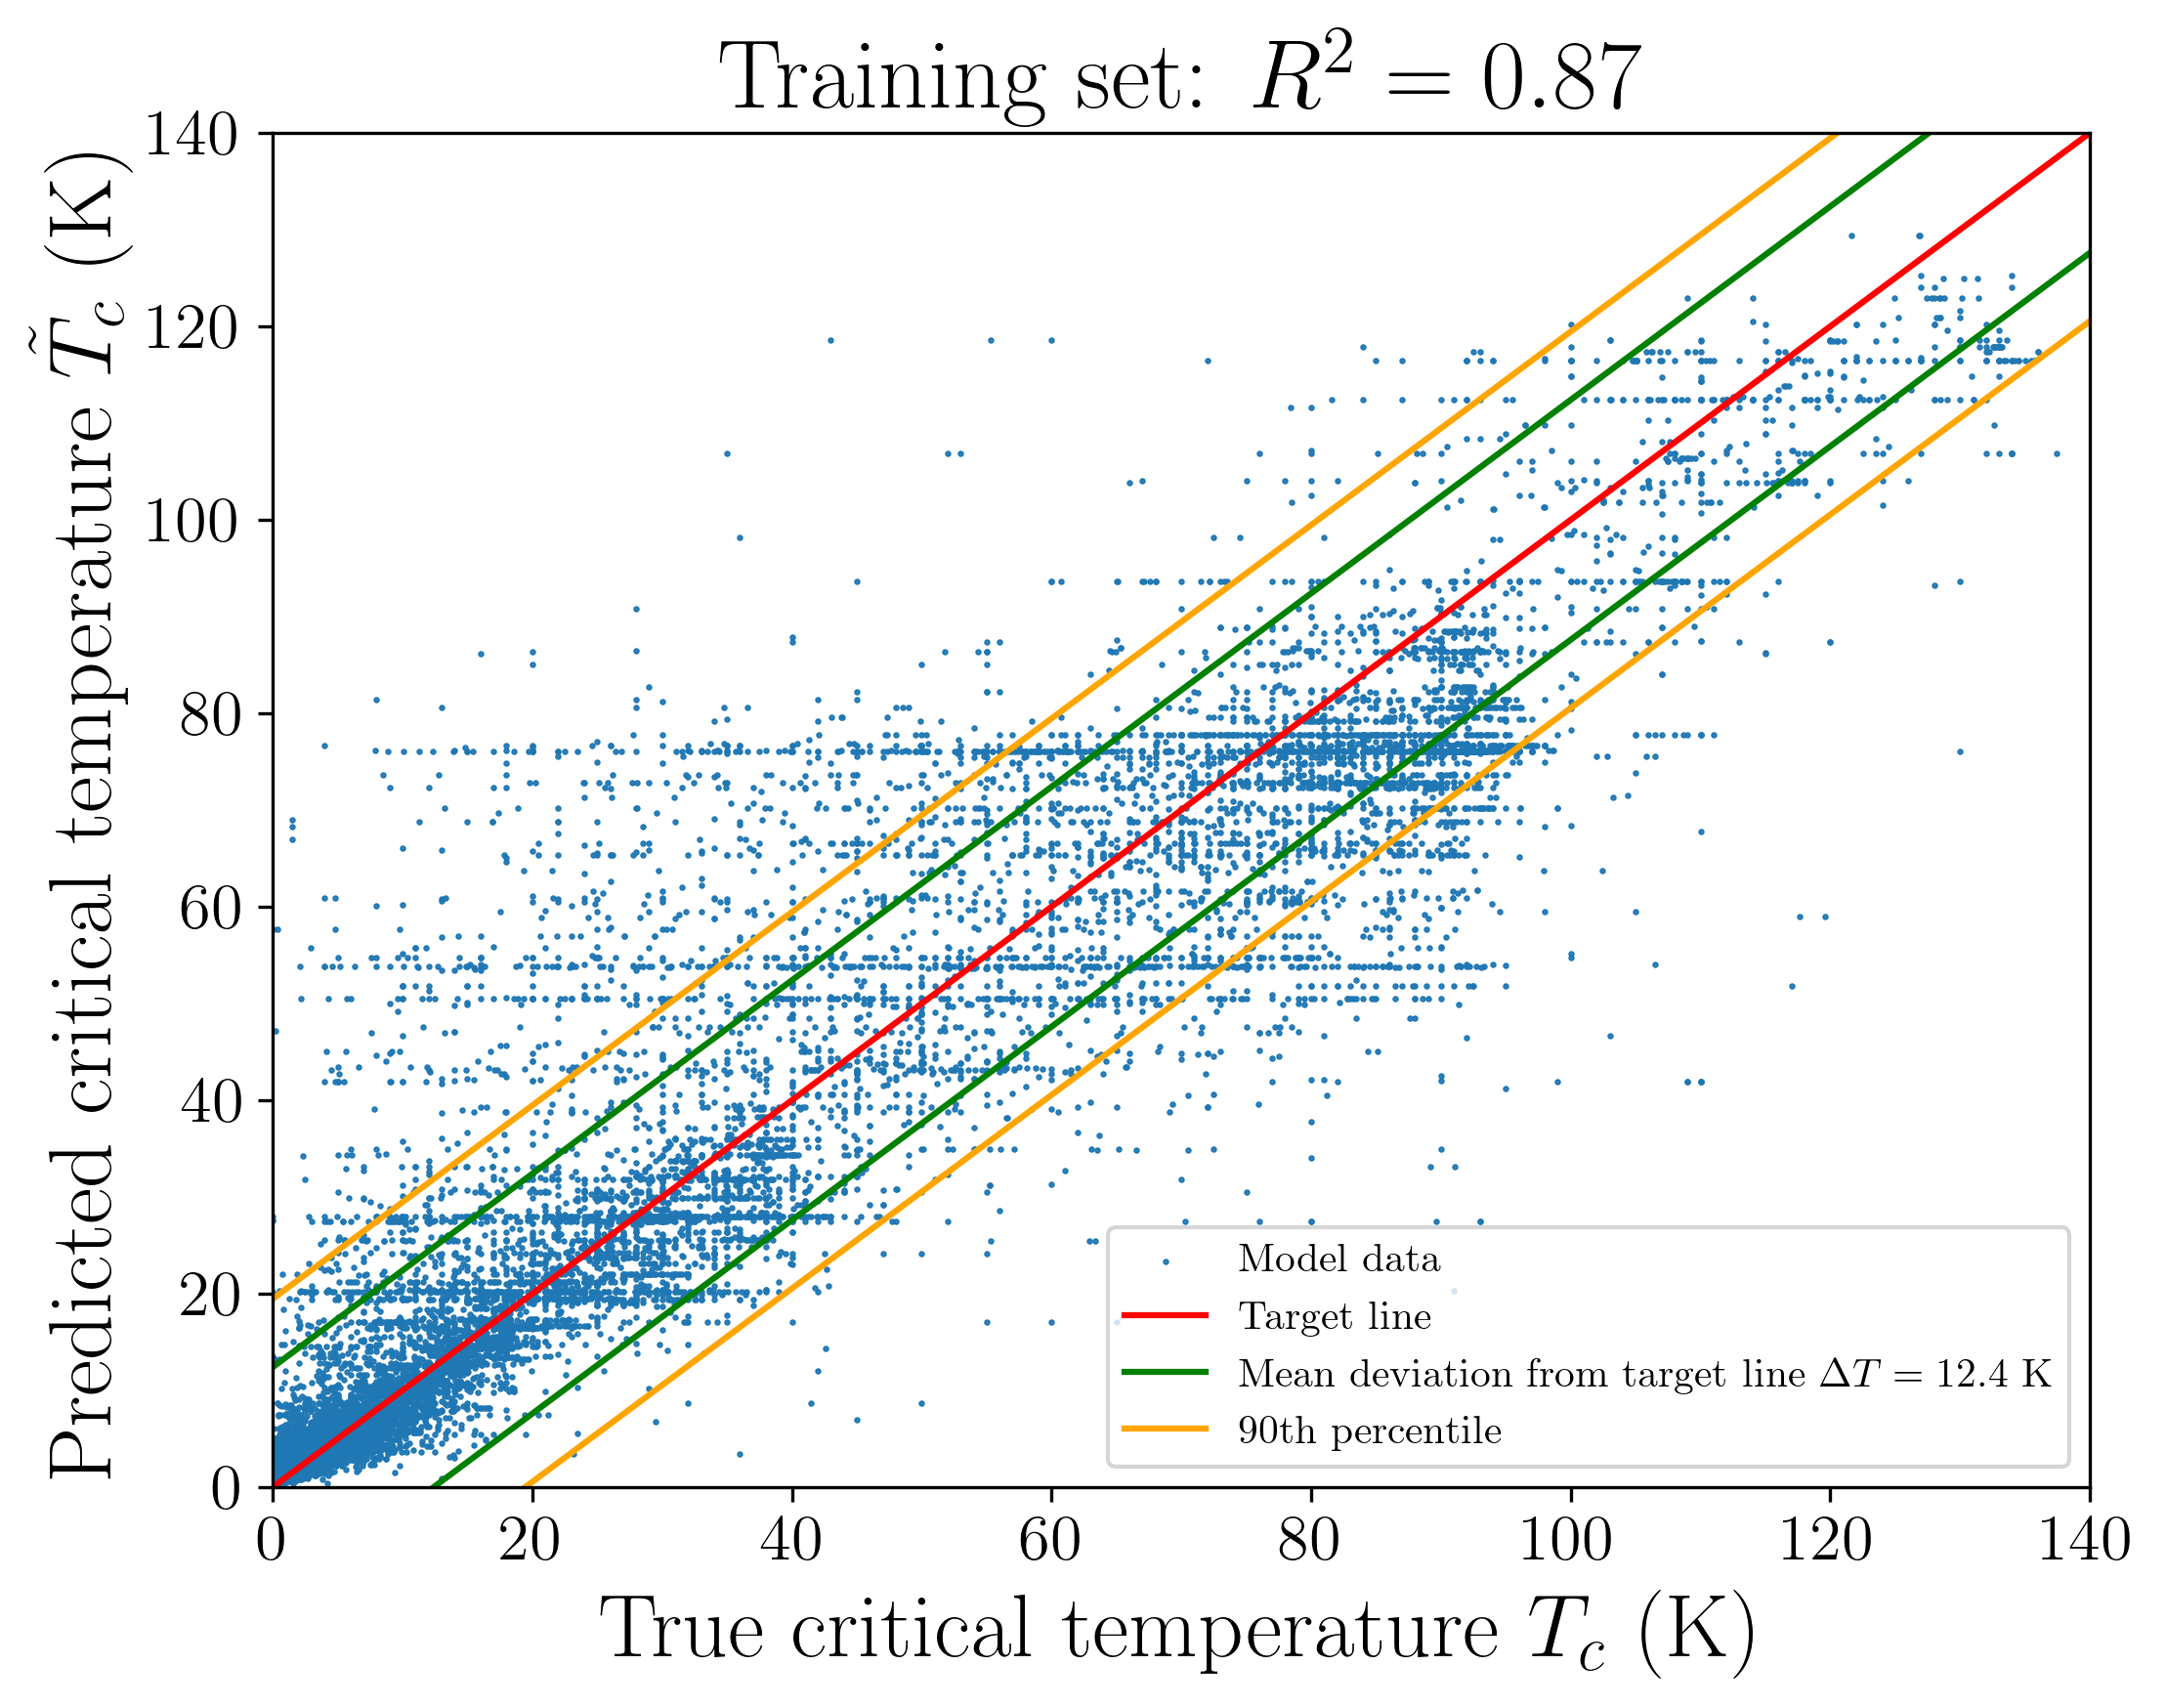

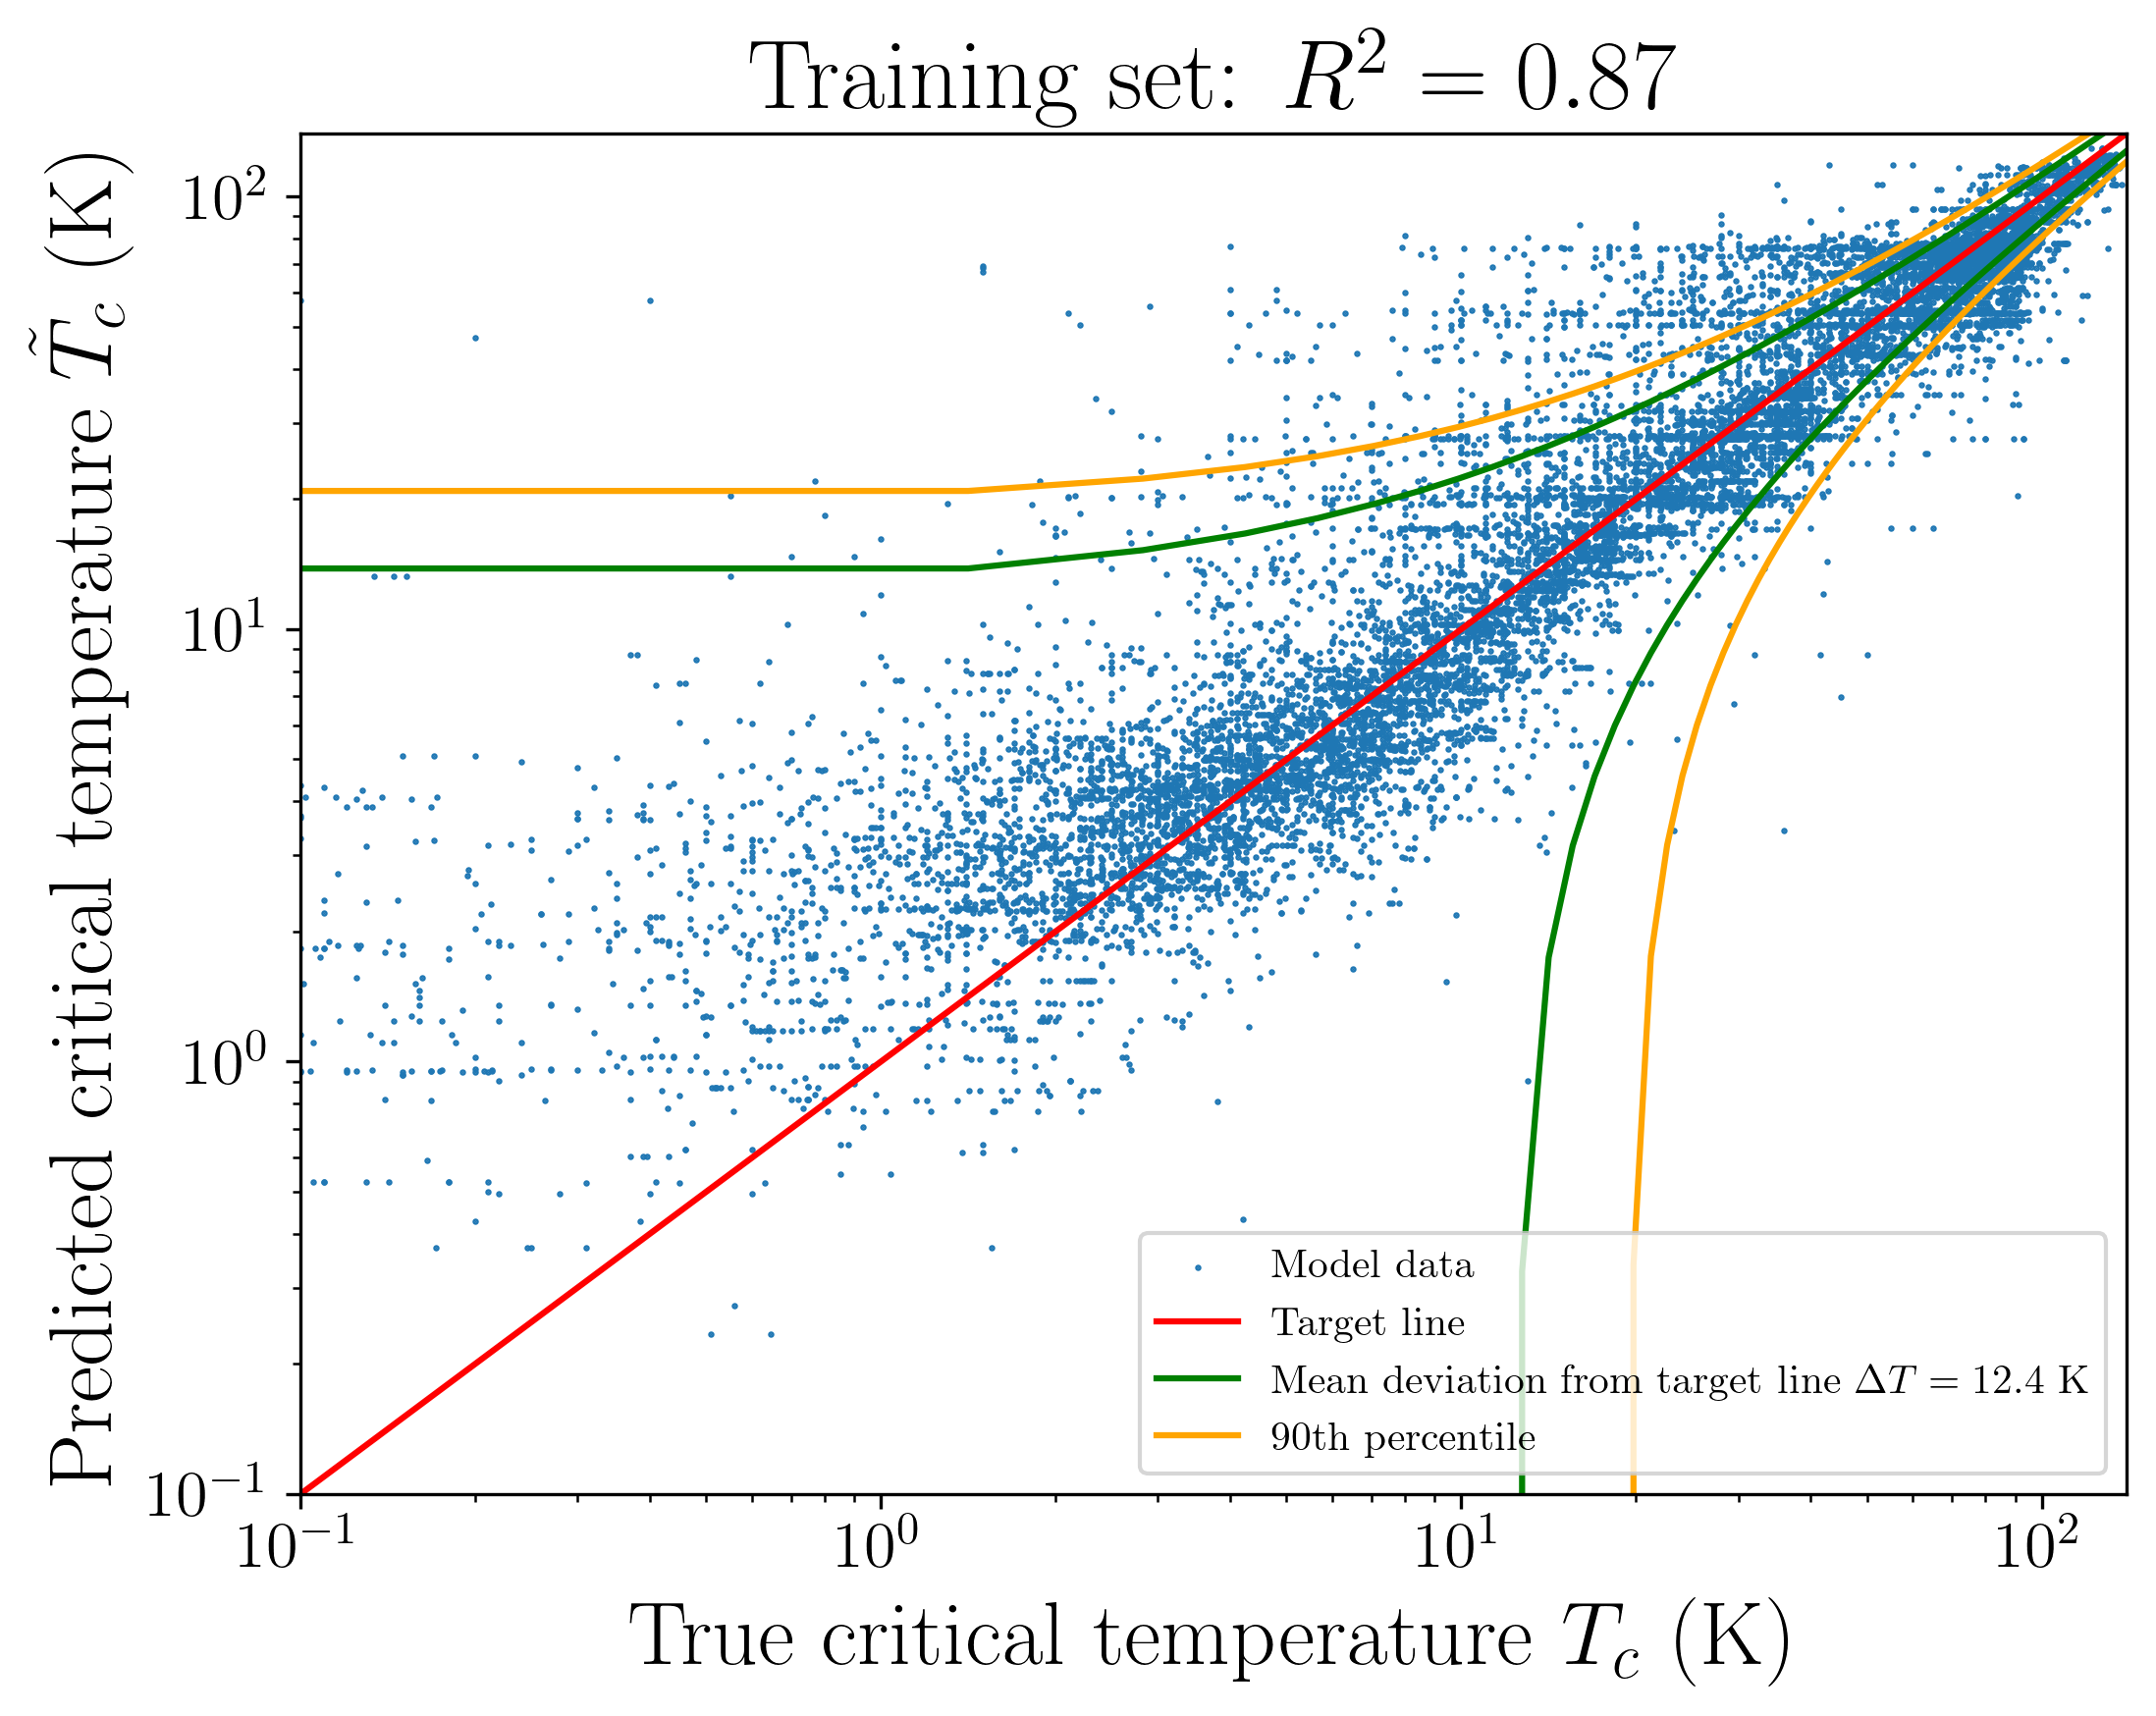

In [35]:
y_pred = best_model.predict(x_train_scaled)
f = np.sqrt(best_model.evaluate(x_train_scaled, y_train))
print(f)

err = np.abs(y_pred.flatten() - y_train.flatten())
meanerr = np.mean(err)
perc_val = np.percentile(err, 90)
print(meanerr, perc_val)
plot_residuals(err, 90, "kt_res_training")

r2 = r2_score(y_train, y_pred)
print(r2)

plot_prediction(y_train, y_pred, f, r2, val=False, log=False, fname="kt_training", perc=90, perc_val=perc_val)
plot_prediction(y_train, y_pred, f, r2, val=False, log=True, fname="kt_training_log", perc=90, perc_val=perc_val)

# Feature importance

In [47]:
# load JS visualization code to notebook
shap.initjs()

background = x_test_scaled[np.random.choice(x_test_scaled.shape[0], 500, replace=False)]
explainer = shap.DeepExplainer(best_model, background)
shap_values = explainer.shap_values(x_test_scaled)

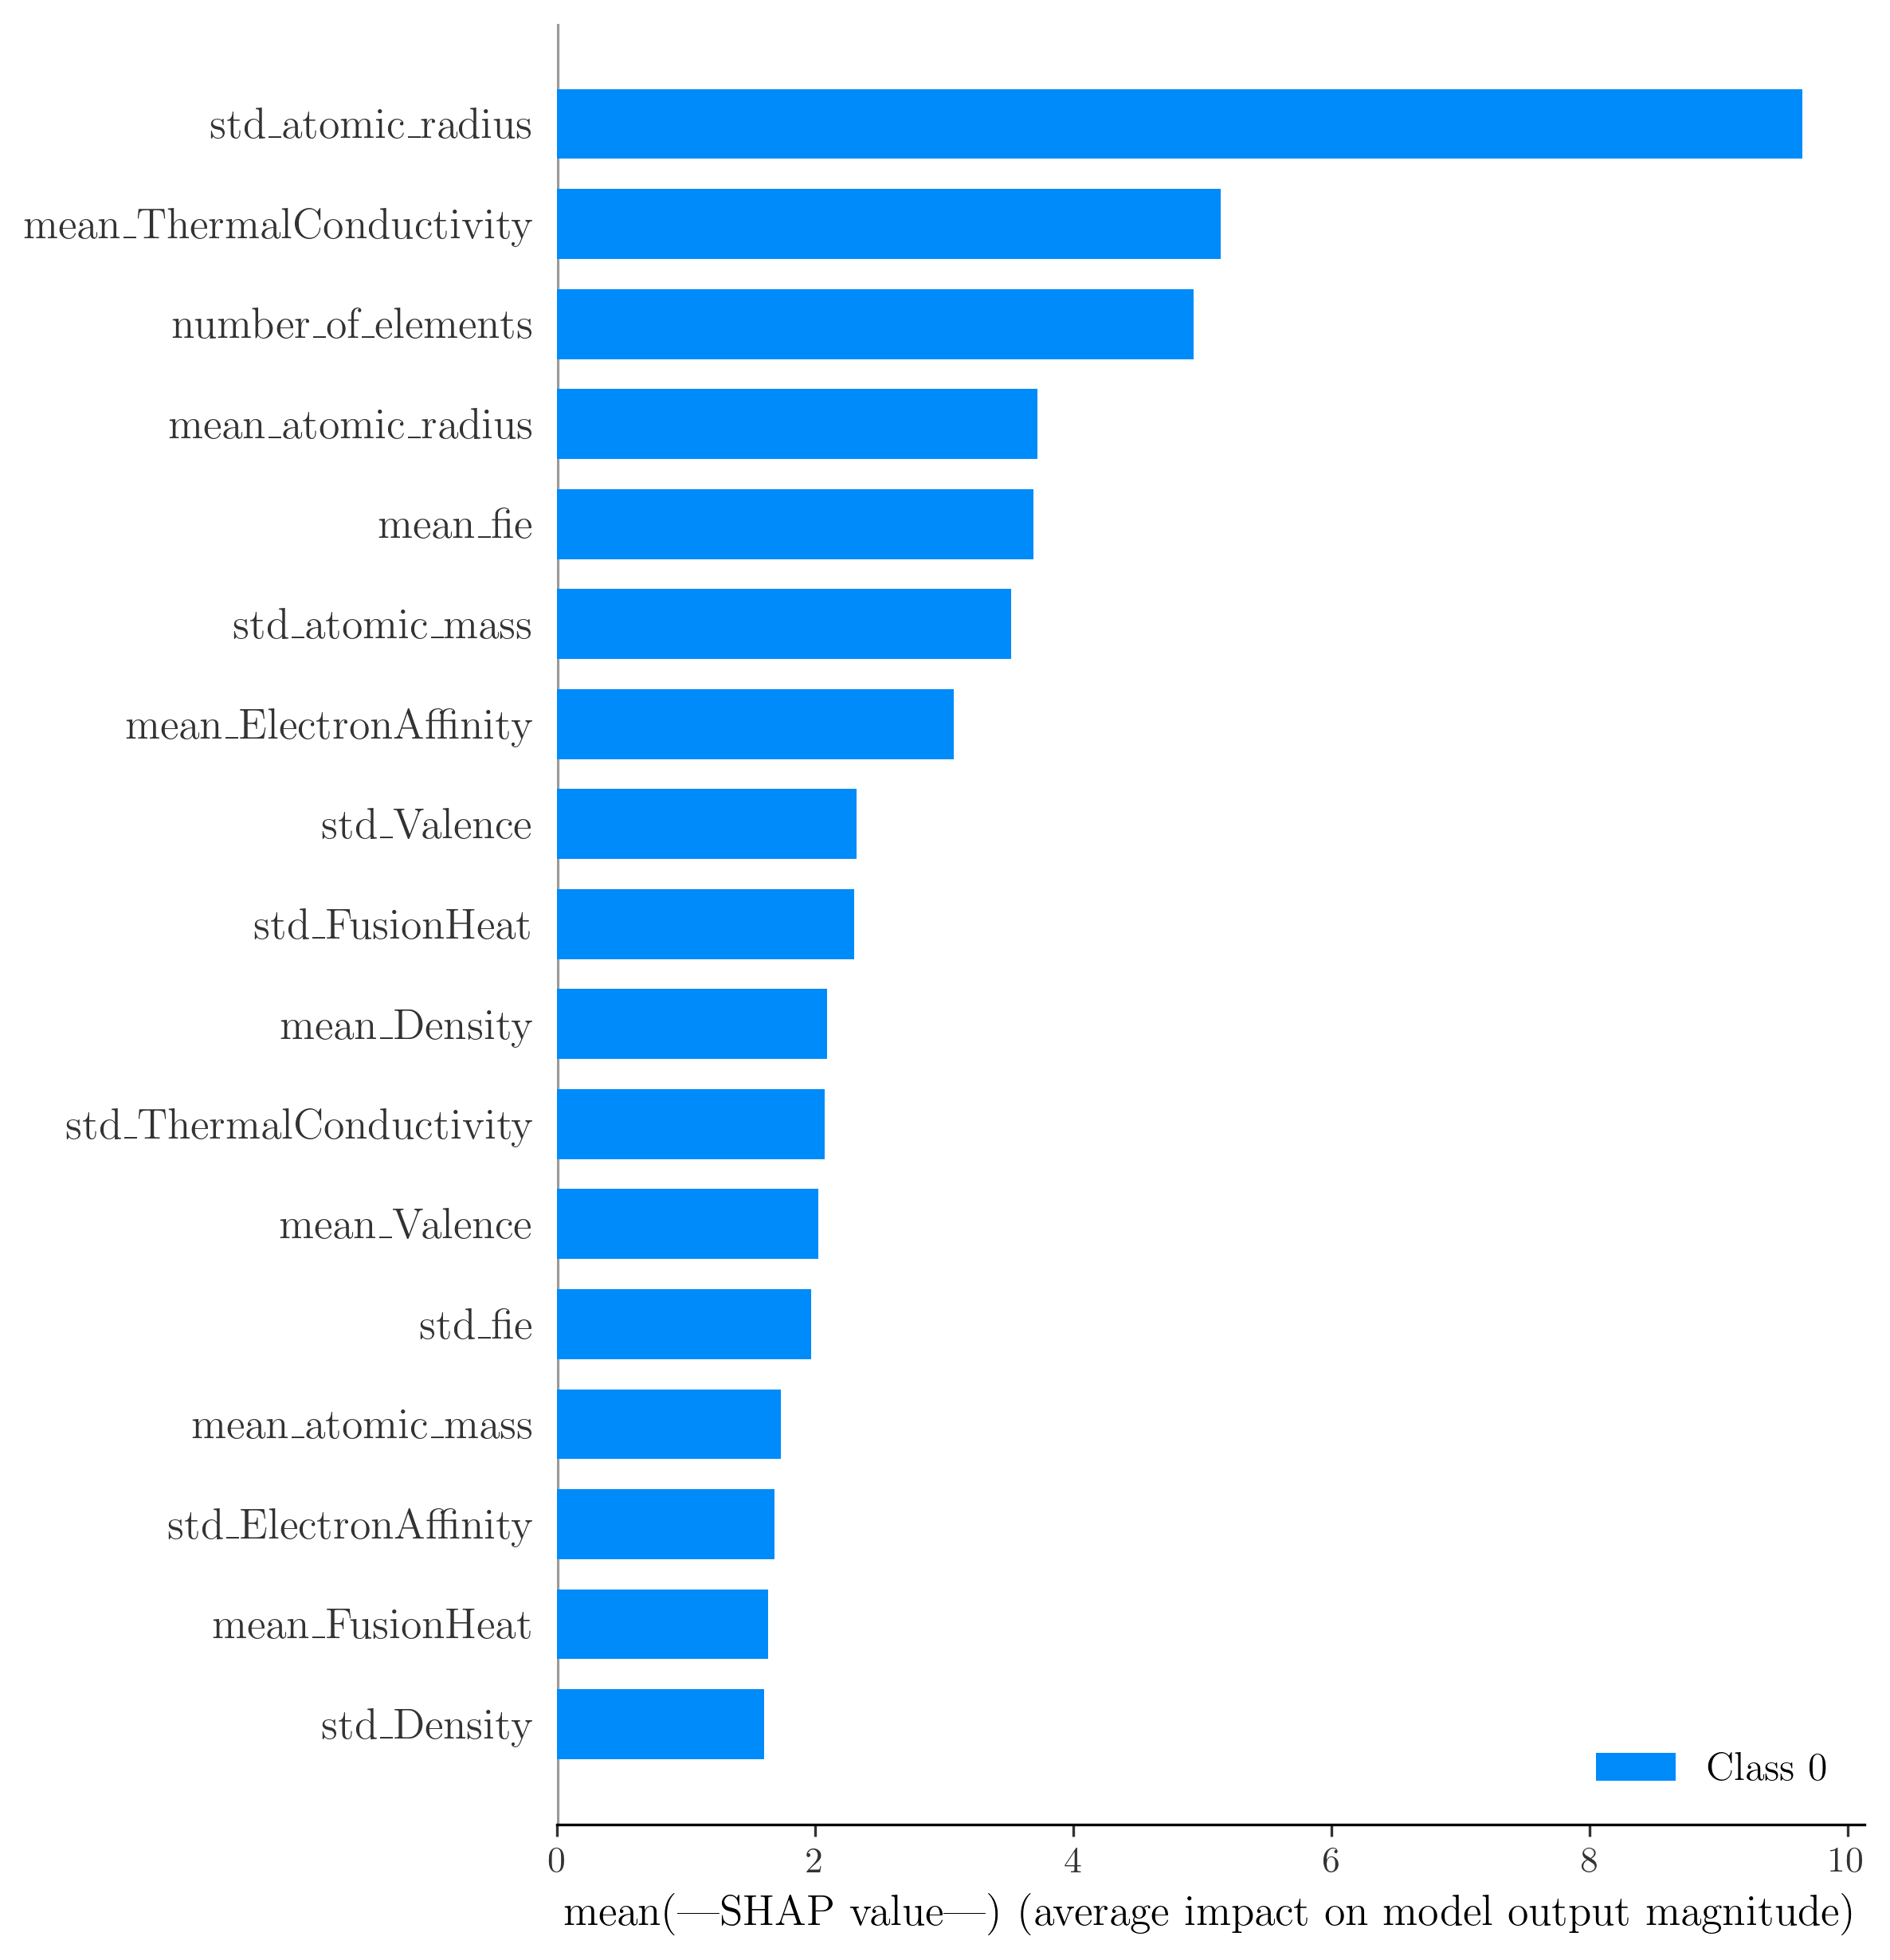

In [48]:

shap.summary_plot(shap_values, x_test_scaled, feature_names=selected_features, plot_type="bar")